# Regression Project - Prediction of Sales Price for a given House

## 1. Reading Dataset CSV file

In [1]:
from warnings import filterwarnings
filterwarnings ('ignore')

In [2]:
import pandas as pd
df = pd.read_csv('training_set.csv', na_values=[''], keep_default_na=False)
df = df.drop(columns='Id')
df.head()

MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape LandContour  \
0          60       RL          65     8450   Pave    NA      Reg         Lvl   
1          20       RL          80     9600   Pave    NA      Reg         Lvl   
2          60       RL          68    11250   Pave    NA      IR1         Lvl   
3          70       RL          60     9550   Pave    NA      IR1         Lvl   
4          60       RL          84    14260   Pave    NA      IR1         Lvl   

  Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0    AllPub    Inside  ...        0     NA    NA          NA       0      2   
1    AllPub       FR2  ...        0     NA    NA          NA       0      5   
2    AllPub    Inside  ...        0     NA    NA          NA       0      9   
3    AllPub    Corner  ...        0     NA    NA          NA       0      2   
4    AllPub       FR2  ...        0     NA    NA          NA       0     12   

   YrSold  SaleType  SaleCondition  SalePrice  
0    2008        WD         Normal     208500  
1    2007        WD         Normal     181500  
2    2008        WD         Normal     223500  
3    2006        WD        Abnorml     140000  
4    2008        WD         Normal     250000  

[5 rows x 80 columns]

## 4. Exploratory Data Analysis - Univariate & Bivariate

### Separate Categorical & Continuous features for EDA

In [4]:
catA = list(df.columns[df.dtypes=='object'])
conA = list(df.columns[df.dtypes!='object'])

In [5]:
catA

['MSZoning',
 'LotFrontage',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [6]:
conA

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

### Univariate Analysis

In [7]:
# Descriptive Analysis of Categorical features
df[catA].describe().T


count unique      top  freq
MSZoning       1460      5       RL  1151
LotFrontage    1460    111       NA   259
Street         1460      2     Pave  1454
Alley          1460      3       NA  1369
LotShape       1460      4      Reg   925
LandContour    1460      4      Lvl  1311
Utilities      1460      2   AllPub  1459
LotConfig      1460      5   Inside  1052
LandSlope      1460      3      Gtl  1382
Neighborhood   1460     25    NAmes   225
Condition1     1460      9     Norm  1260
Condition2     1460      8     Norm  1445
BldgType       1460      5     1Fam  1220
HouseStyle     1460      8   1Story   726
RoofStyle      1460      6    Gable  1141
RoofMatl       1460      8  CompShg  1434
Exterior1st    1460     15  VinylSd   515
Exterior2nd    1460     16  VinylSd   504
MasVnrType     1460      5     None   864
MasVnrArea     1460    328        0   861
ExterQual      1460      4       TA   906
ExterCond      1460      5       TA  1282
Foundation     1460      6    PConc   647
BsmtQual       1460      5       TA   649
BsmtCond       1460      5       TA  1311
BsmtExposure   1460      5       No   953
BsmtFinType1   1460      7      Unf   430
BsmtFinType2   1460      7      Unf  1256
Heating        1460      6     GasA  1428
HeatingQC      1460      5       Ex   741
CentralAir     1460      2        Y  1365
Electrical     1460      6    SBrkr  1334
KitchenQual    1460      4       TA   735
Functional     1460      7      Typ  1360
FireplaceQu    1460      6       NA   690
GarageType     1460      7   Attchd   870
GarageYrBlt    1460     98       NA    81
GarageFinish   1460      4      Unf   605
GarageQual     1460      6       TA  1311
GarageCond     1460      6       TA  1326
PavedDrive     1460      3        Y  1340
PoolQC         1460      4       NA  1453
Fence          1460      5       NA  1179
MiscFeature    1460      5       NA  1406
SaleType       1460      9       WD  1267
SaleCondition  1460      6   Normal  1198

In [8]:
# Descriptive Analysis of Continuous features
df[conA].describe().T

count           mean           std      min        25%  \
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
MSSubClass         50.0      70.00     190.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
TotRmsAbvGrd        6.0       7.00      14.0  
Fireplaces          1.0       1.00       3.0  
GarageCars          2.0       2.00       4.0  
GarageArea        480.0     576.00    1418.0  
WoodDeckSF          0.0     168.00     857.0  
OpenPorchSF        25.0      68.00     547.0  
EnclosedPorch       0.0       0.00     552.0  
3SsnPorch           0.0       0.00     508.0  
ScreenPorch         0.0       0.00     480.0  
PoolArea       

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl


In [12]:
string_columns_count = sum(df[col].dtype == 'O' for col in df.columns)
string_columns_count

46

### Plotting Bar Chart/Count Plot for catA


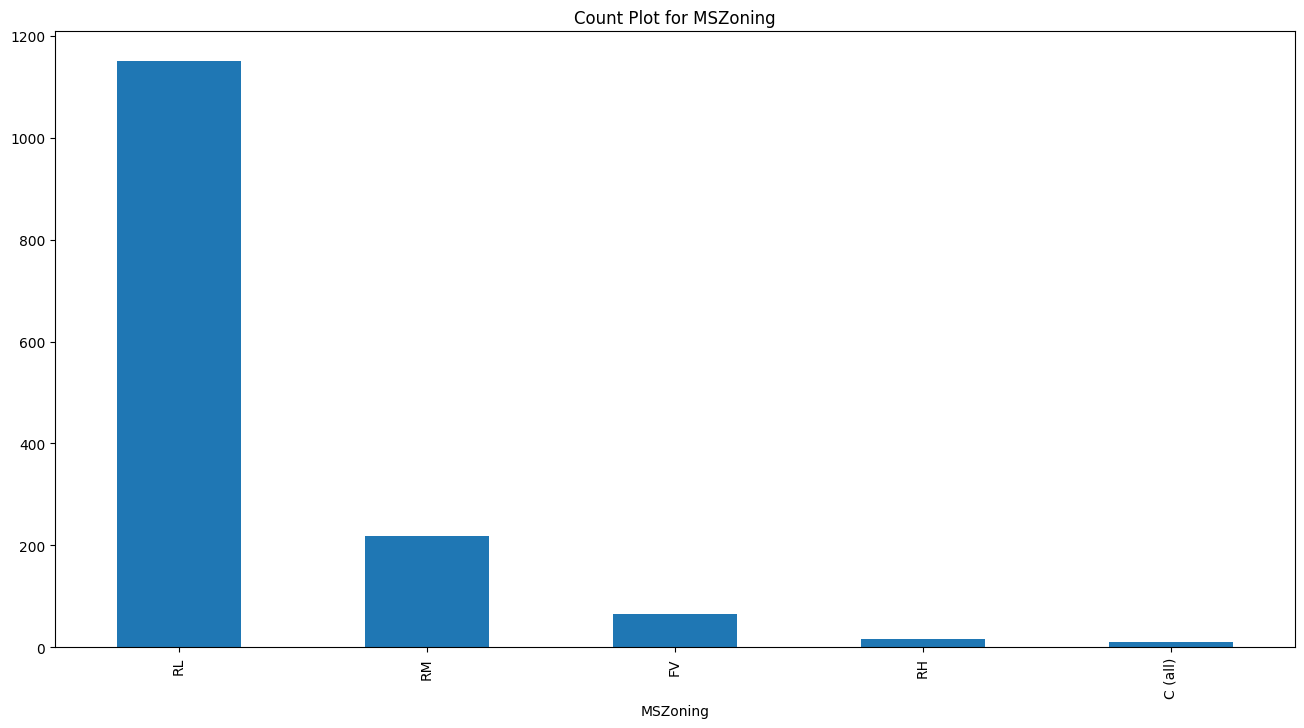

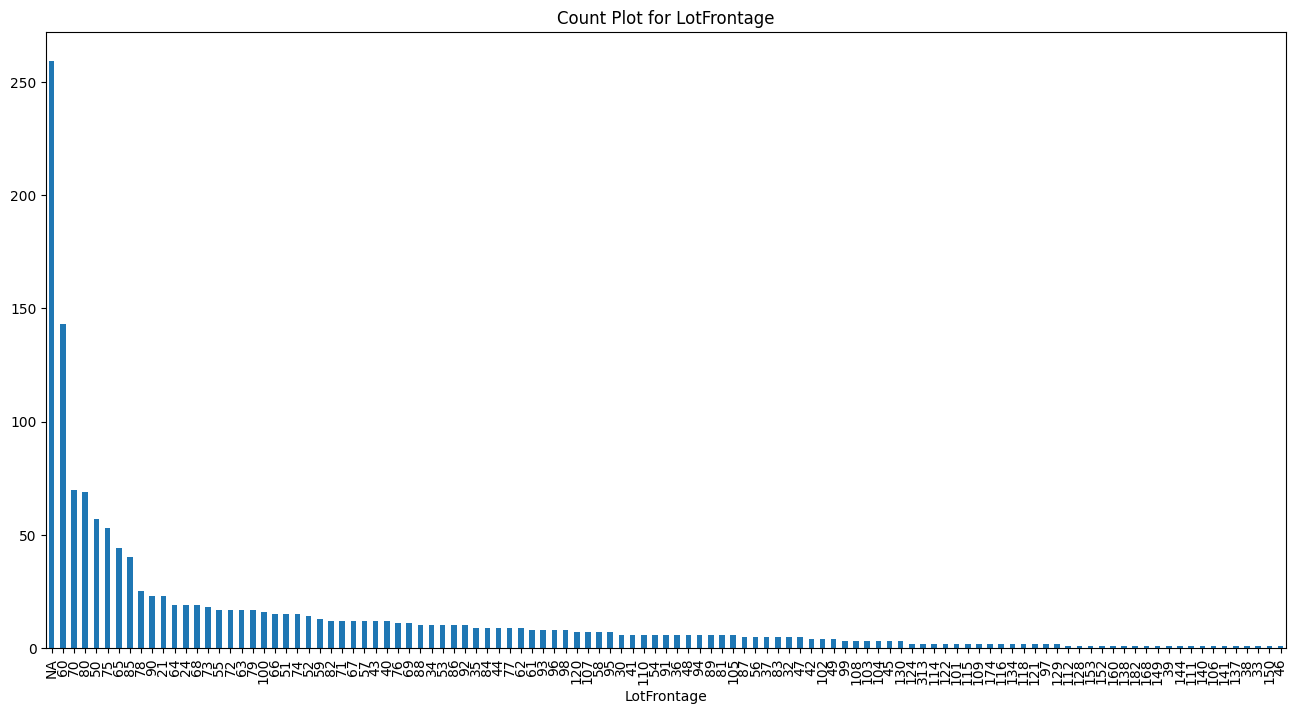

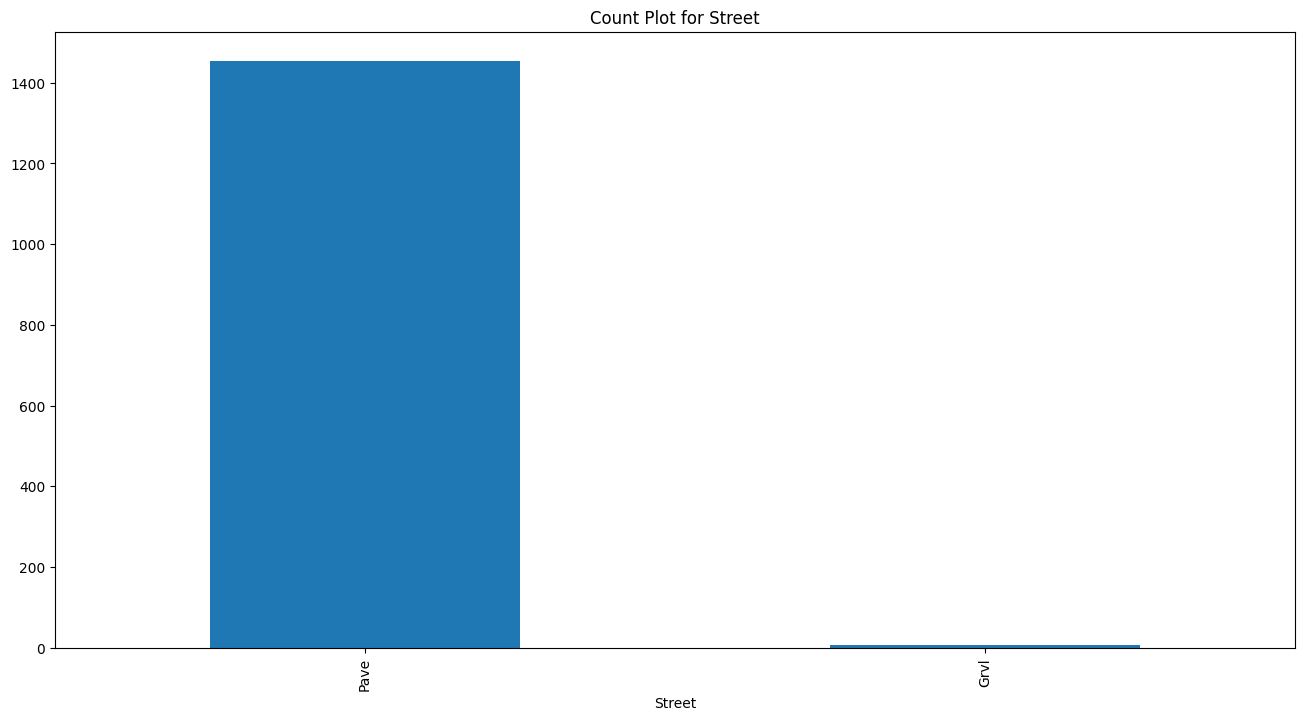

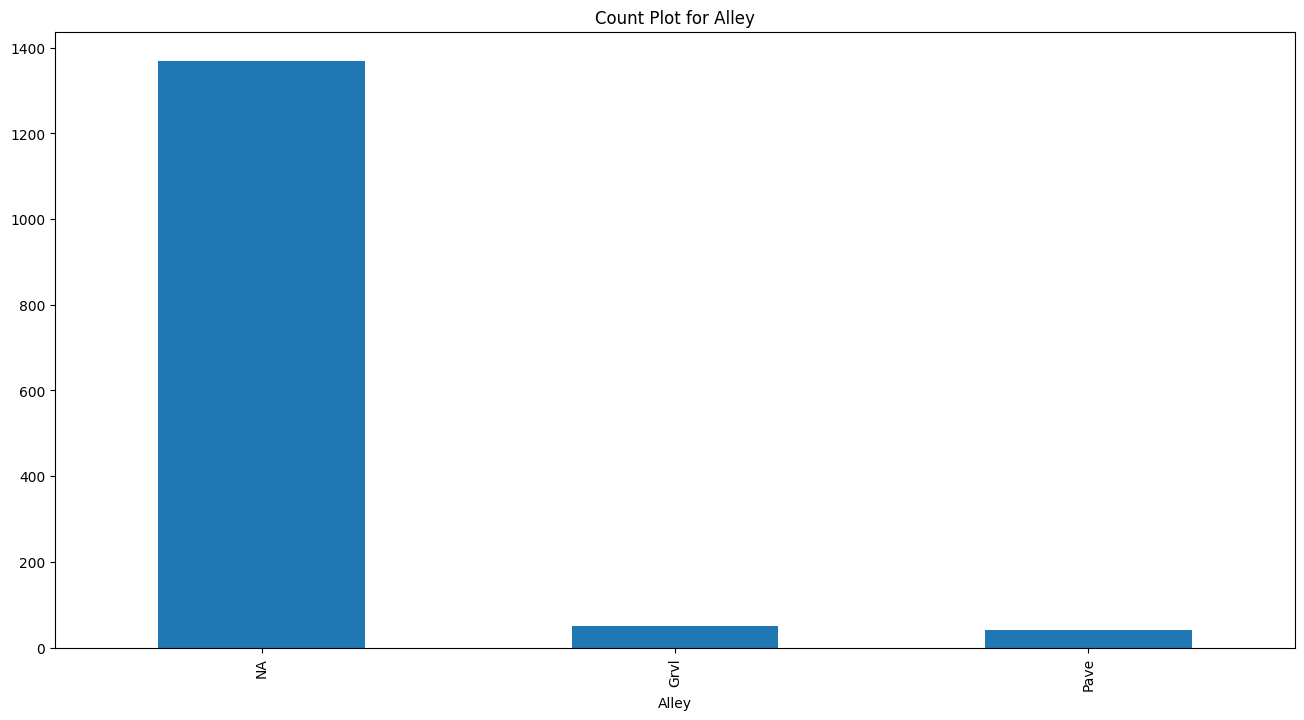

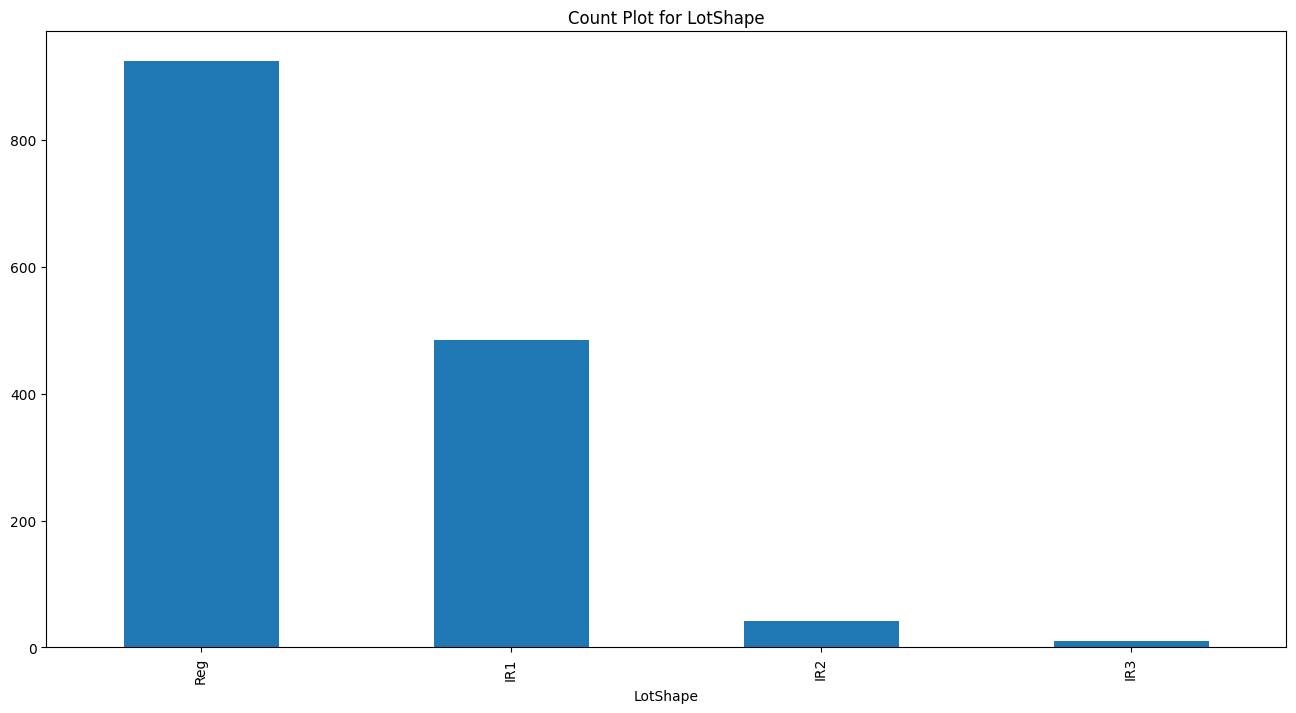

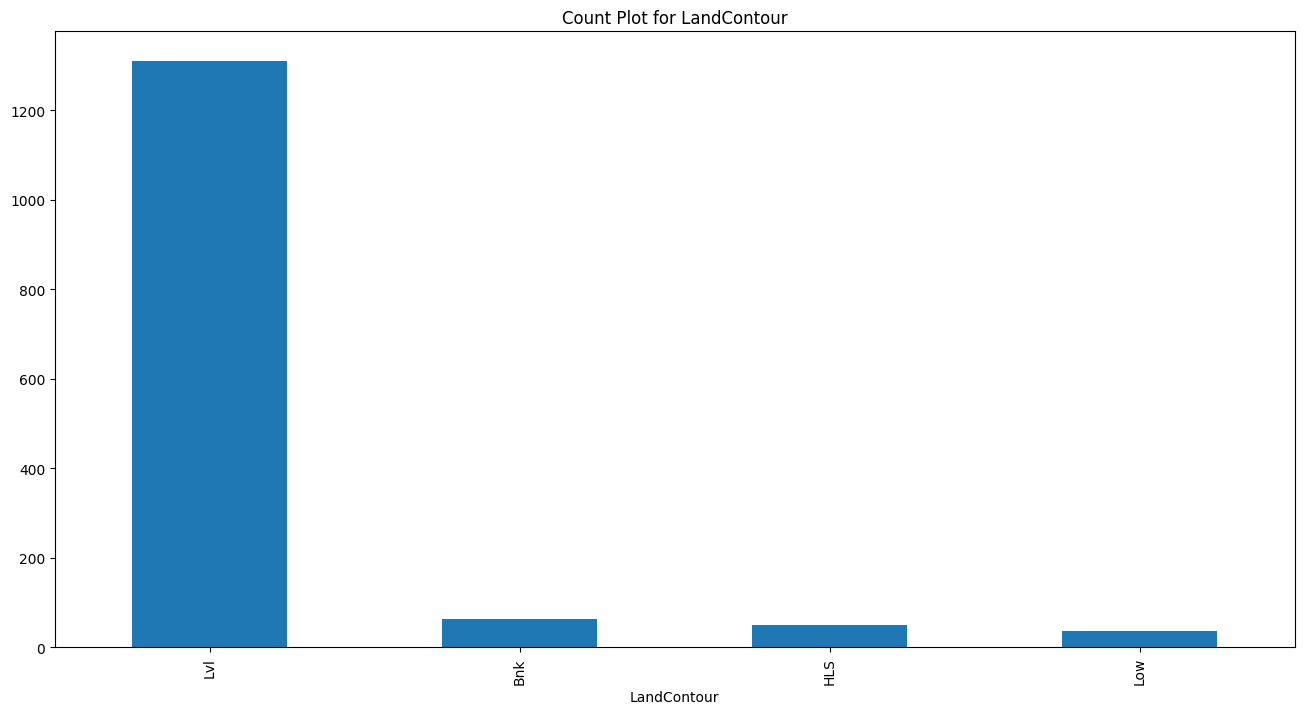

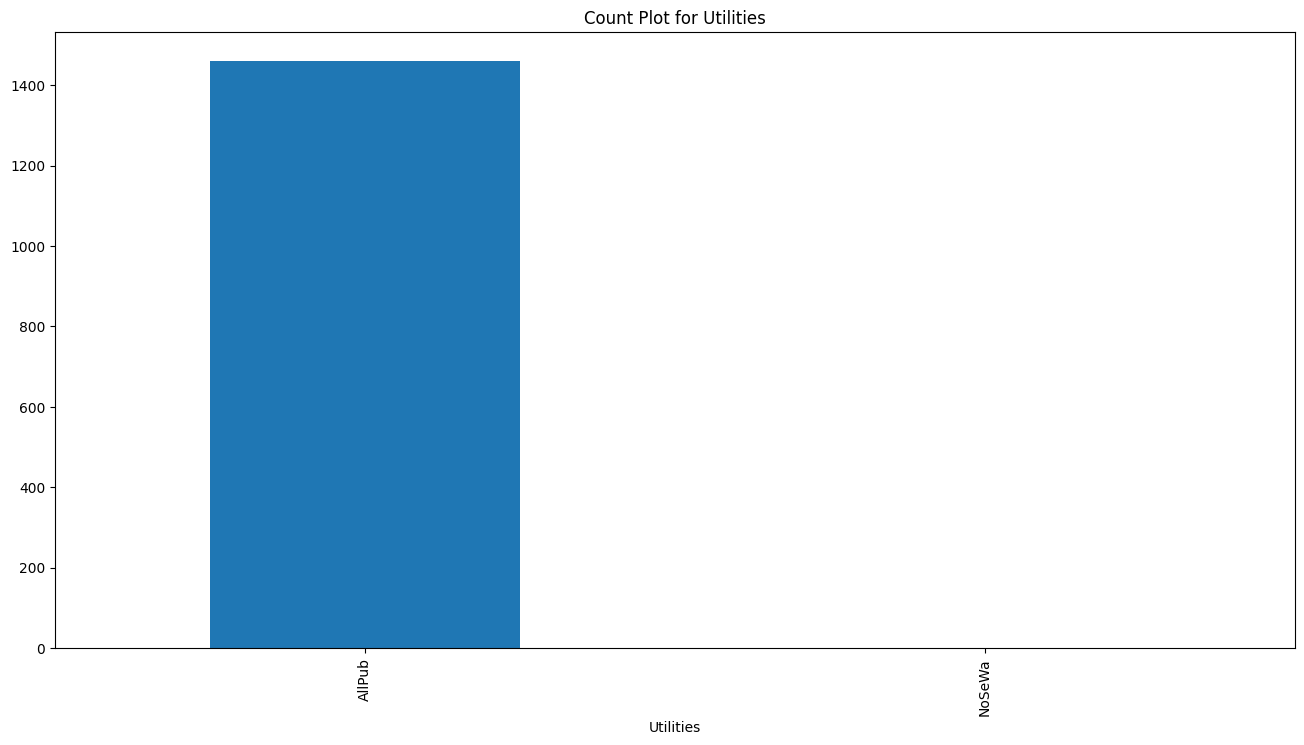

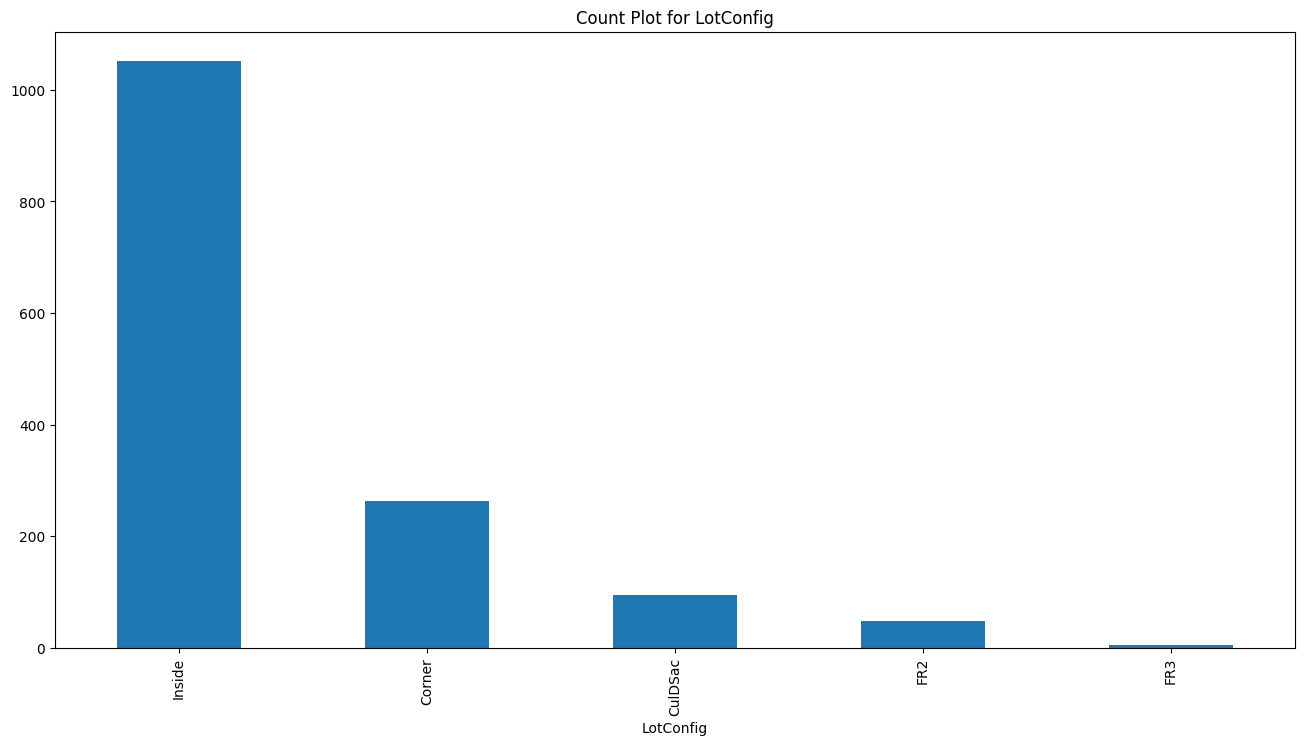

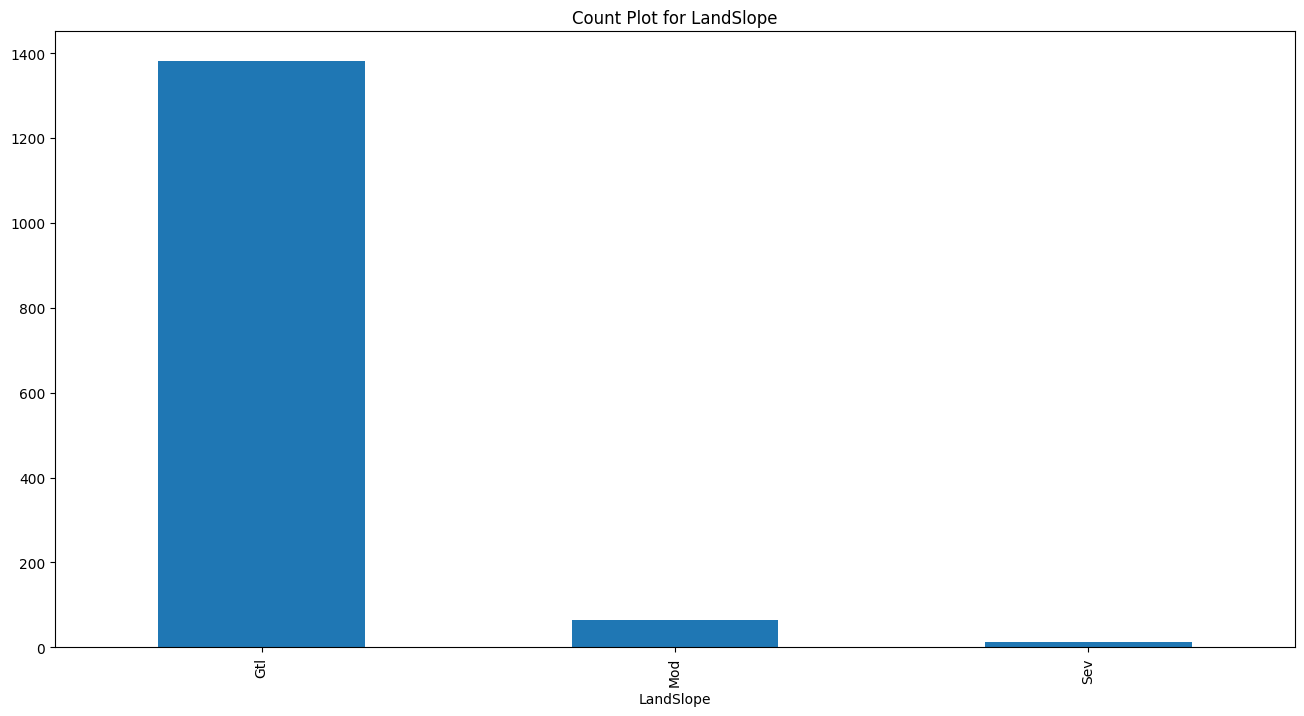

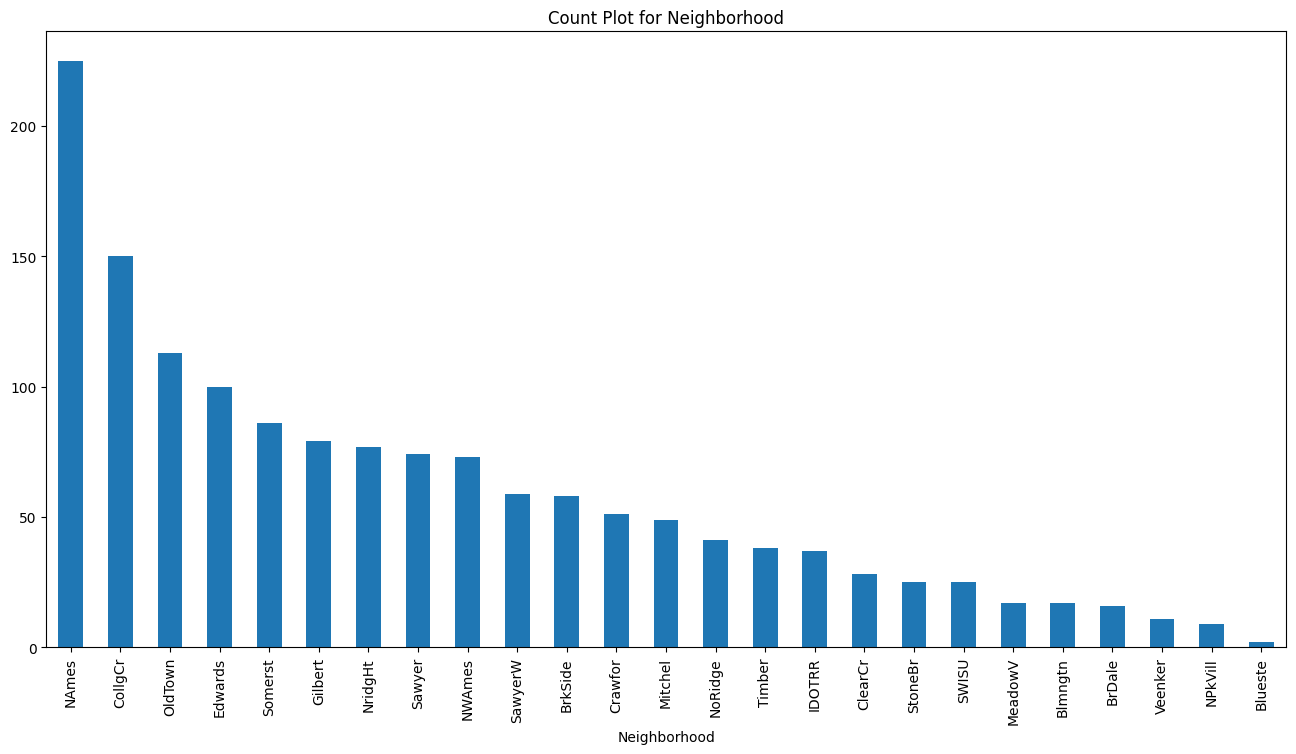

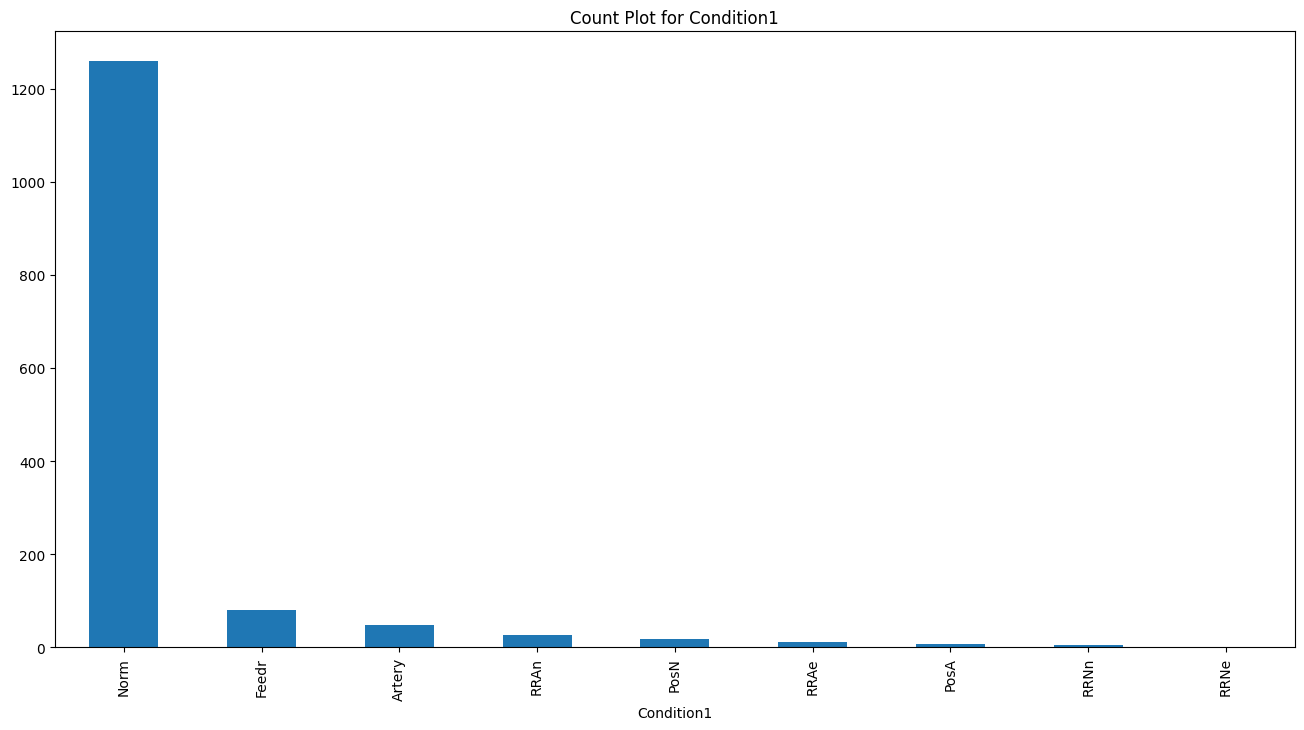

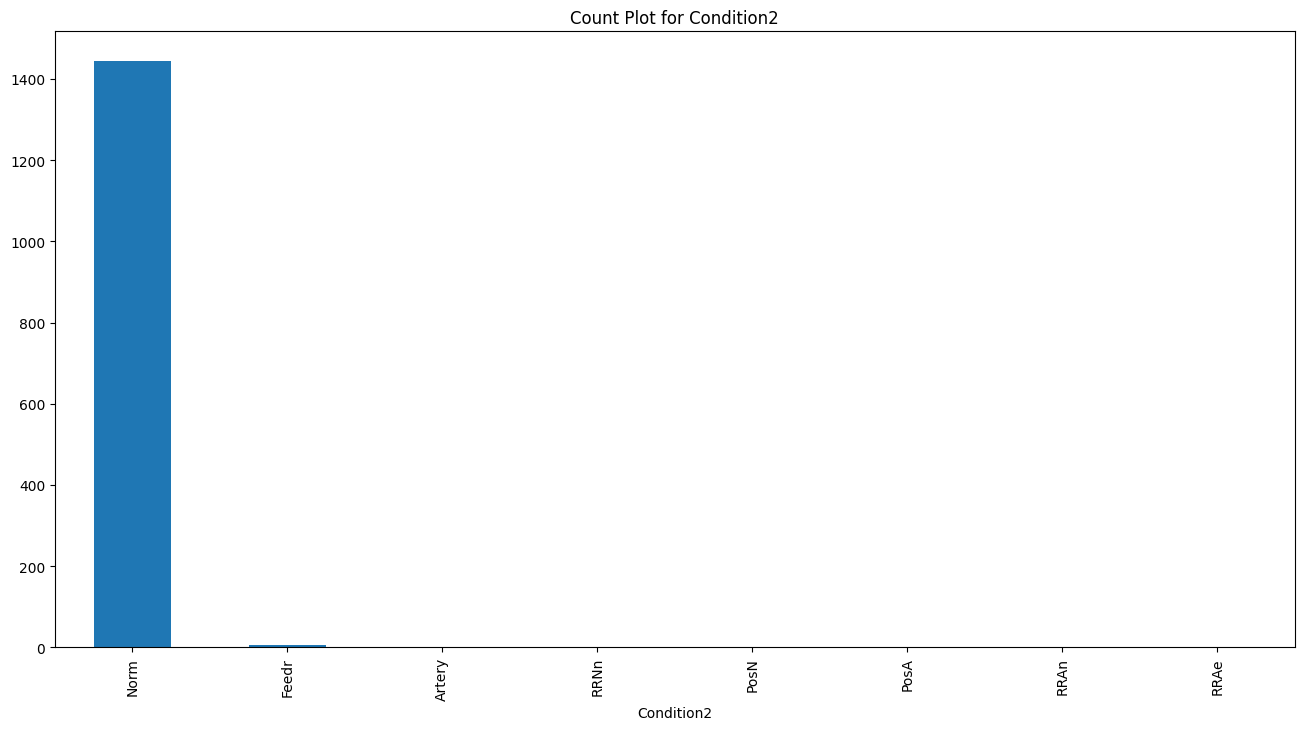

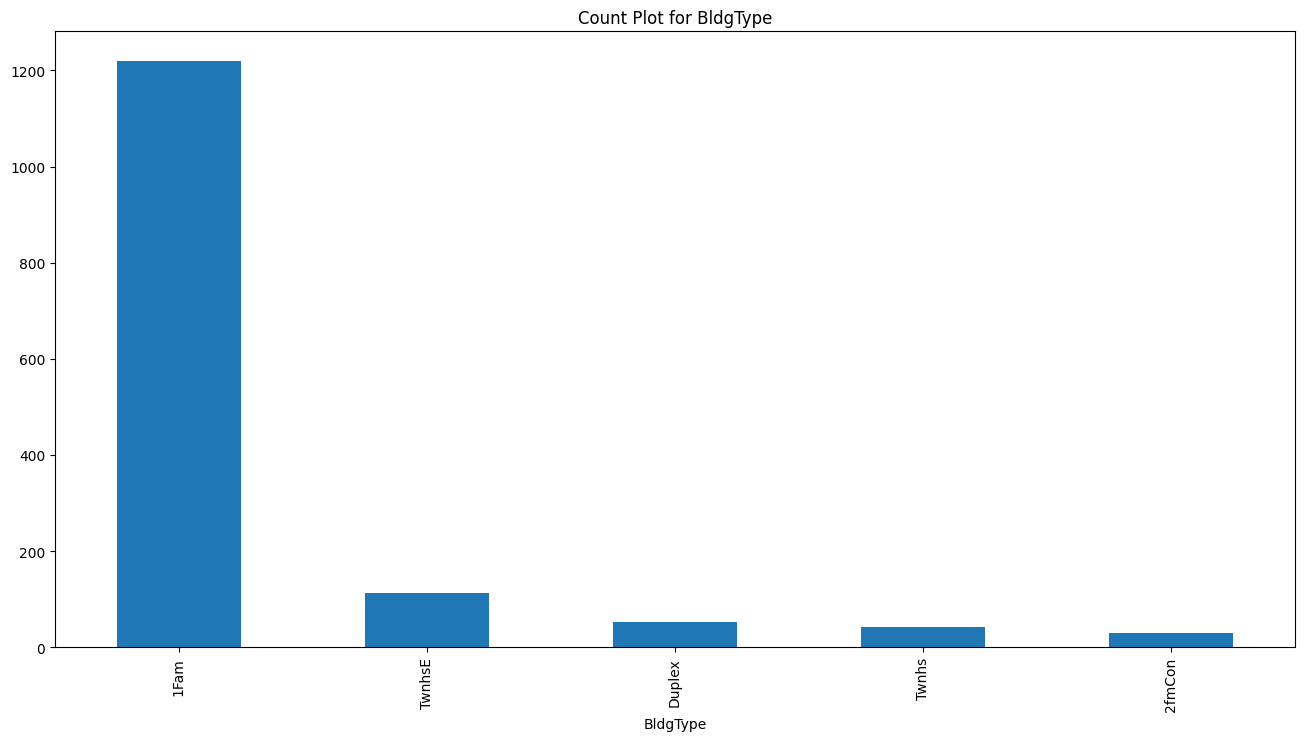

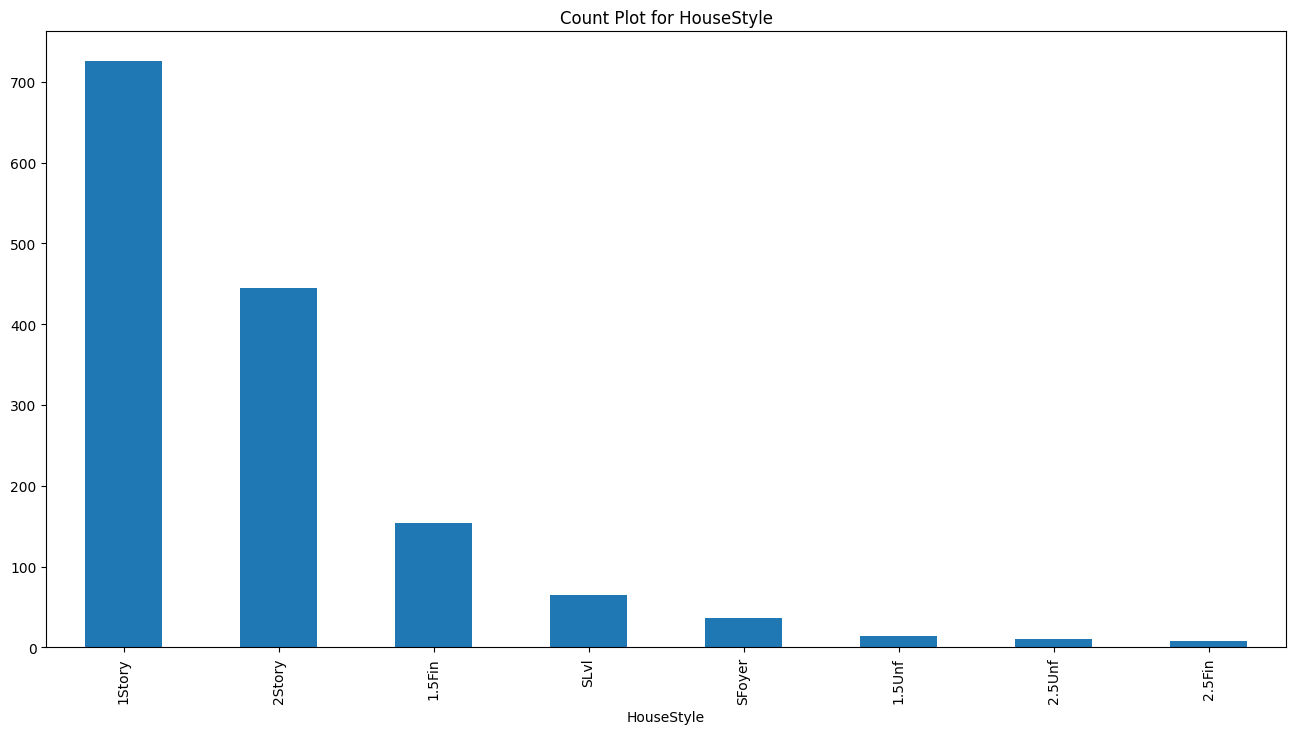

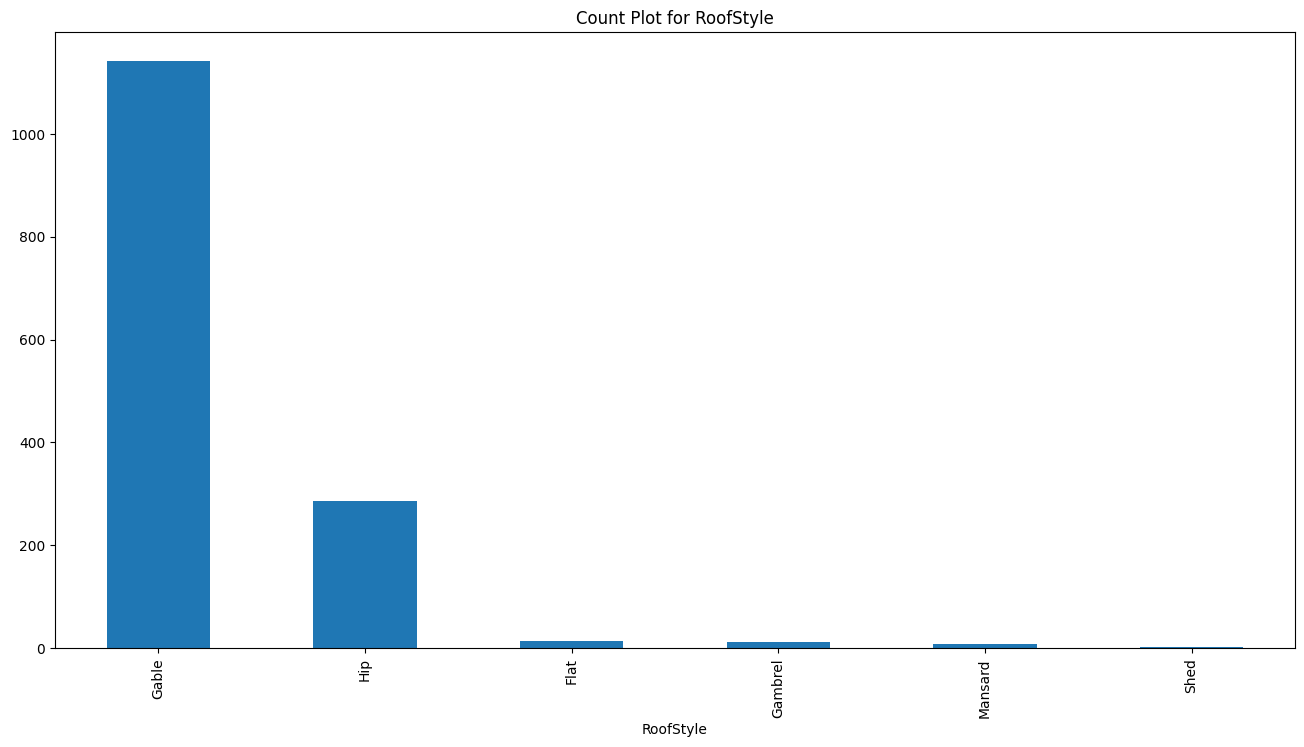

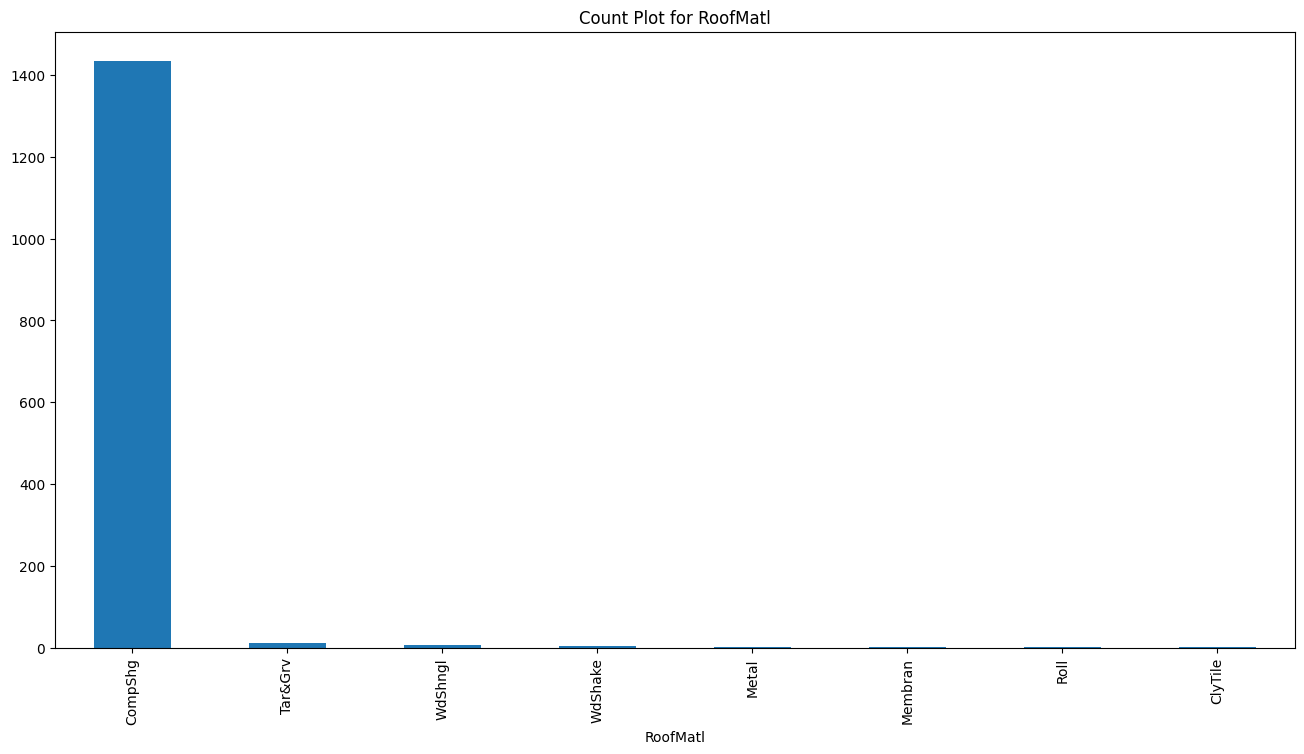

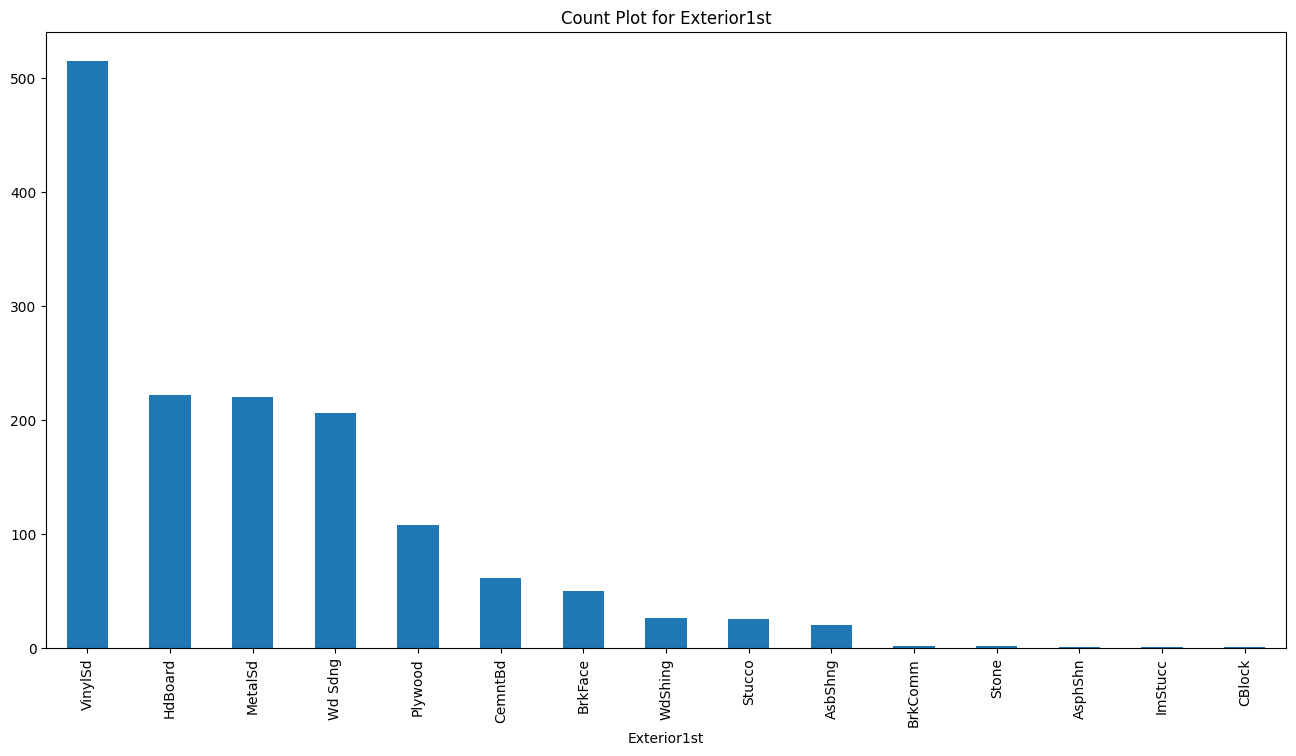

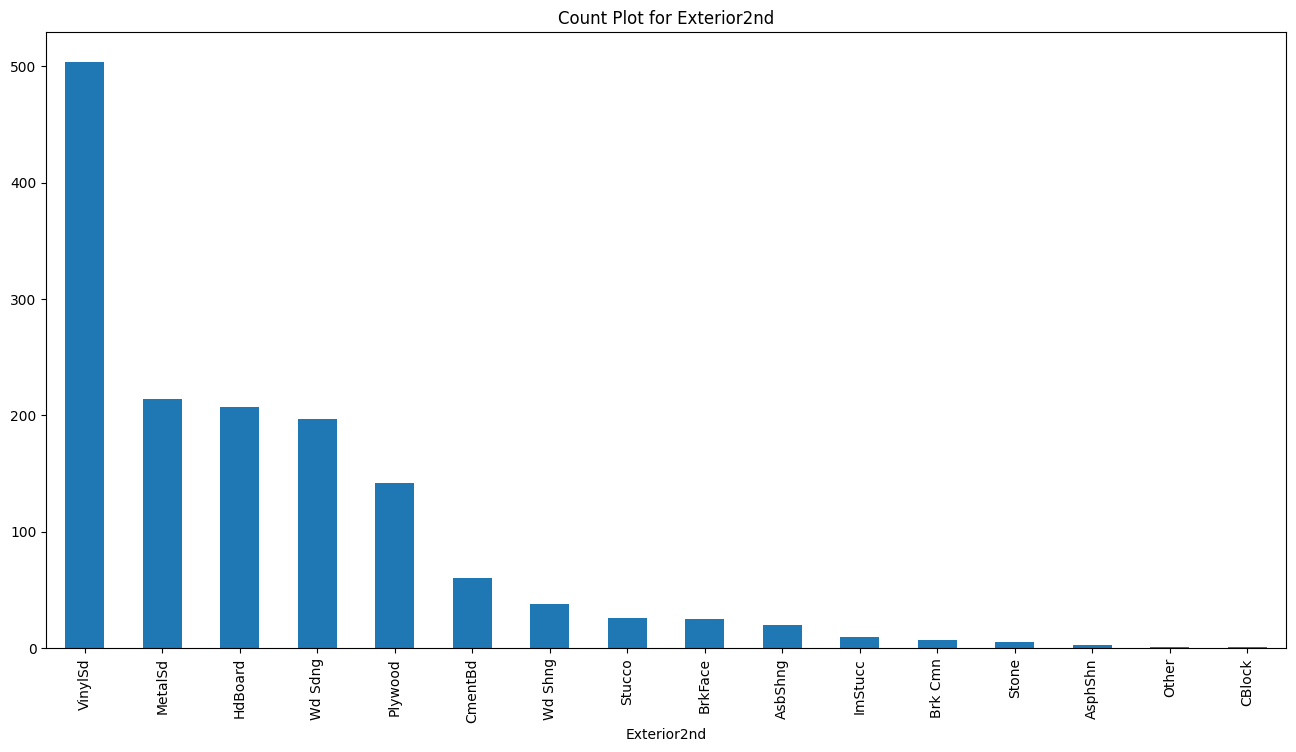

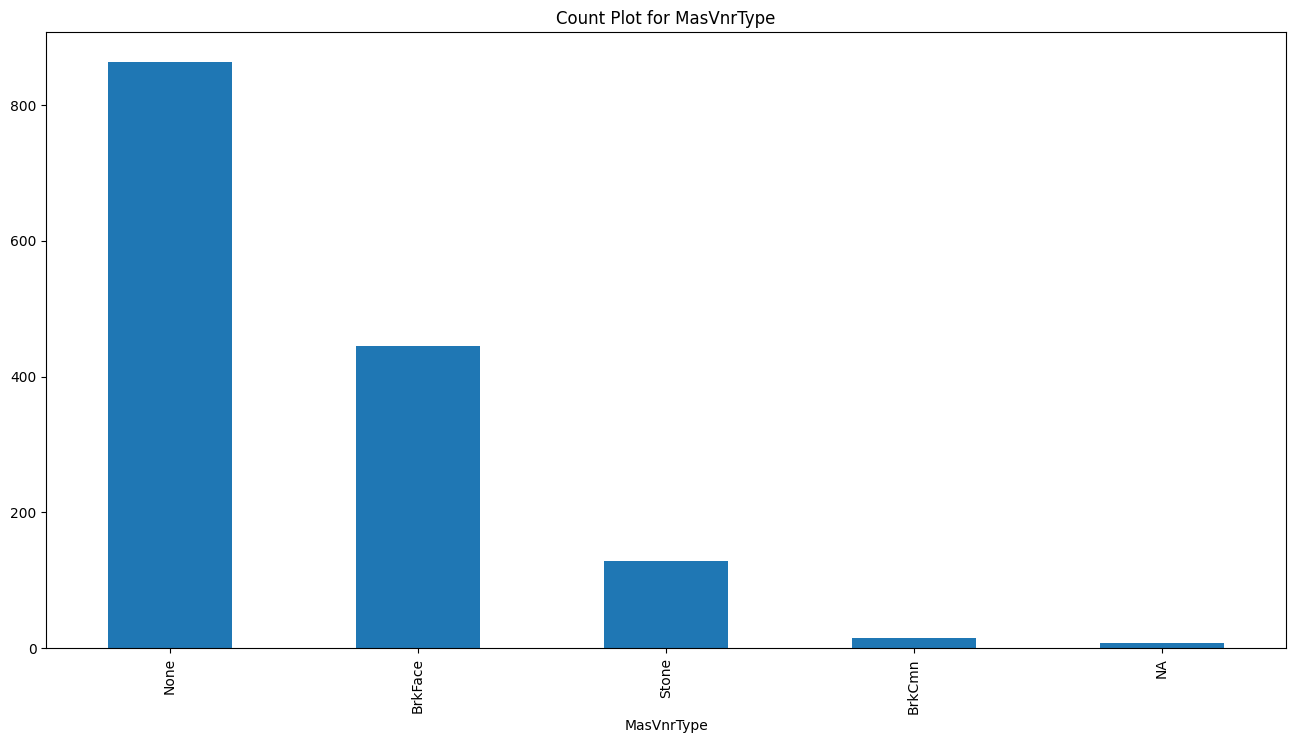

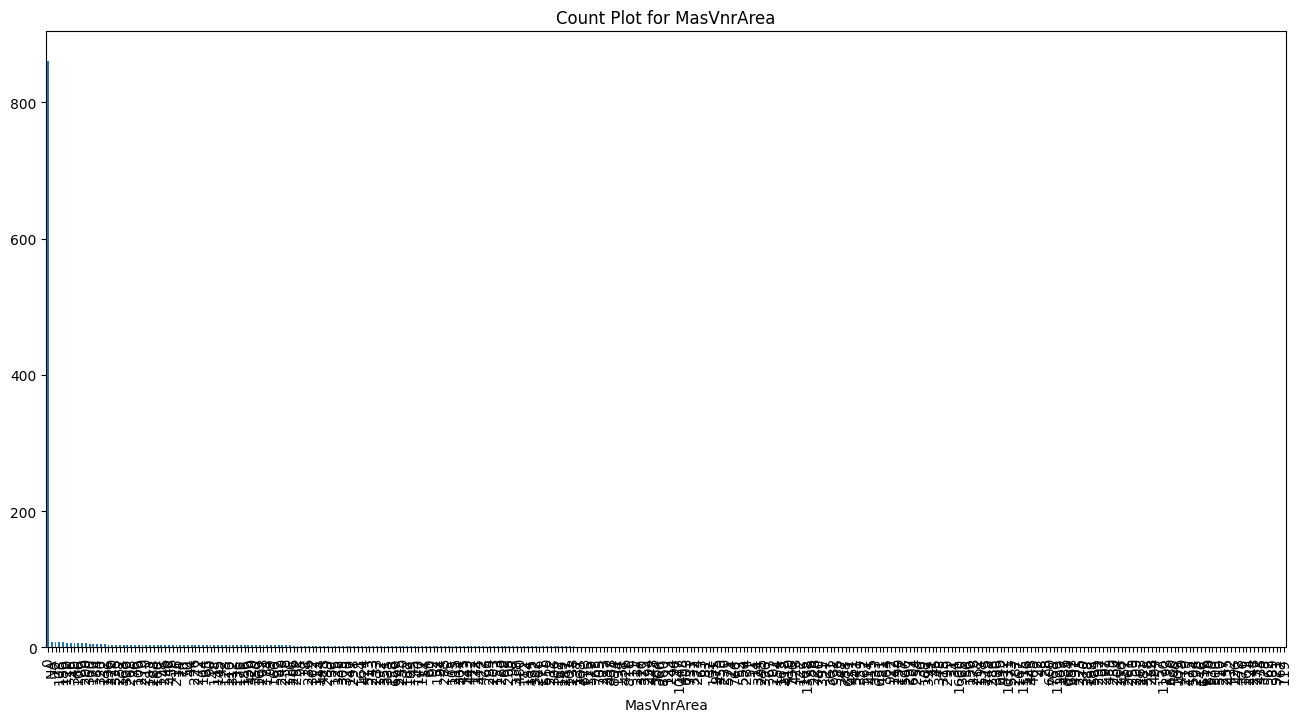

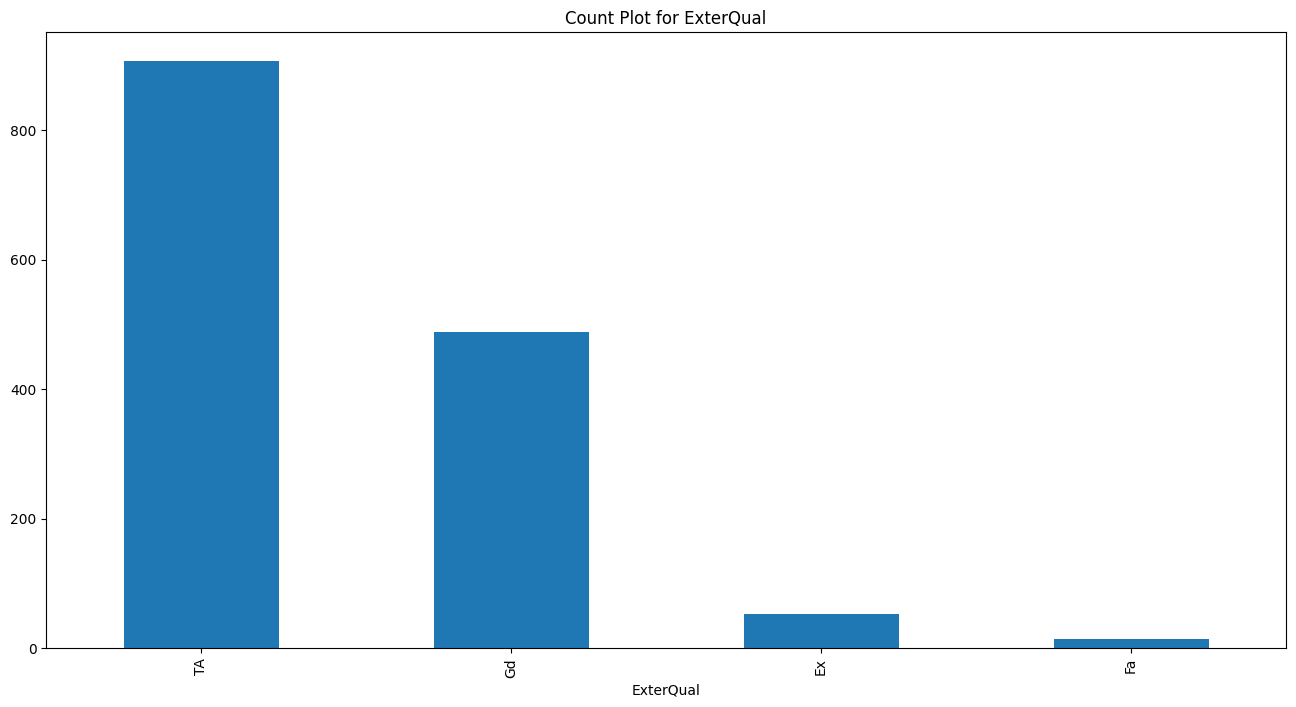

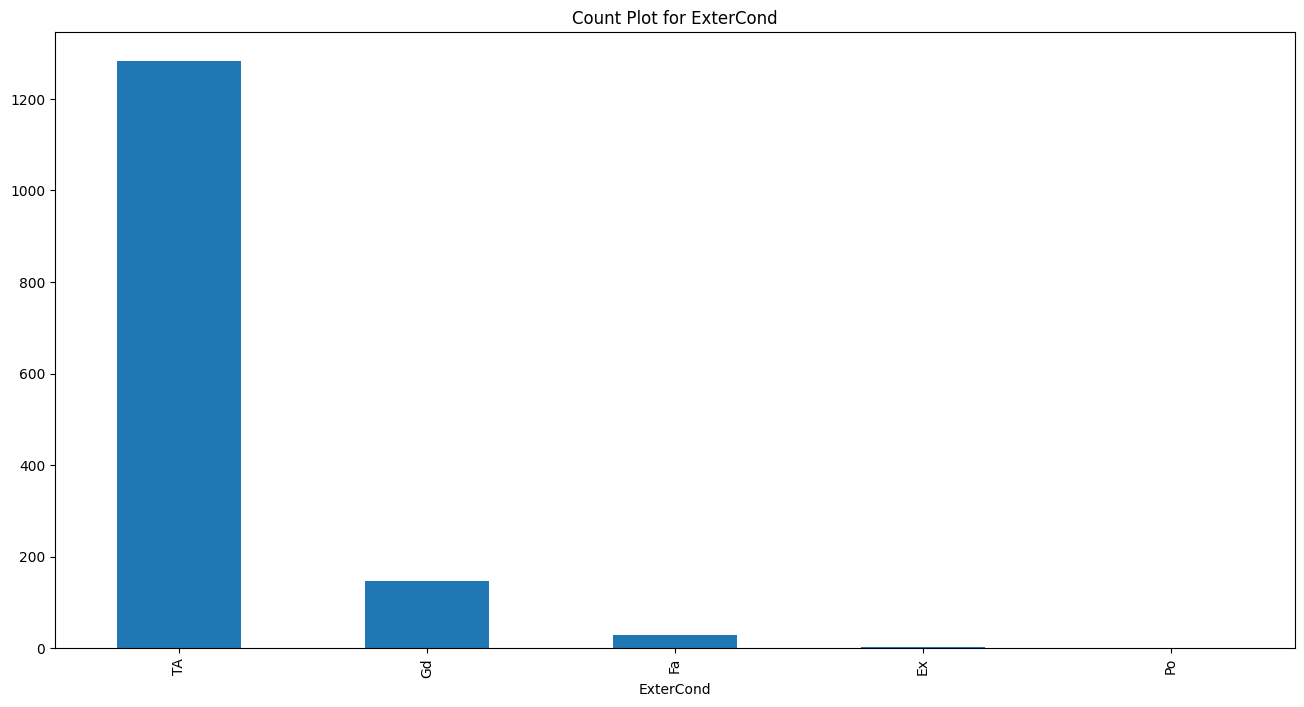

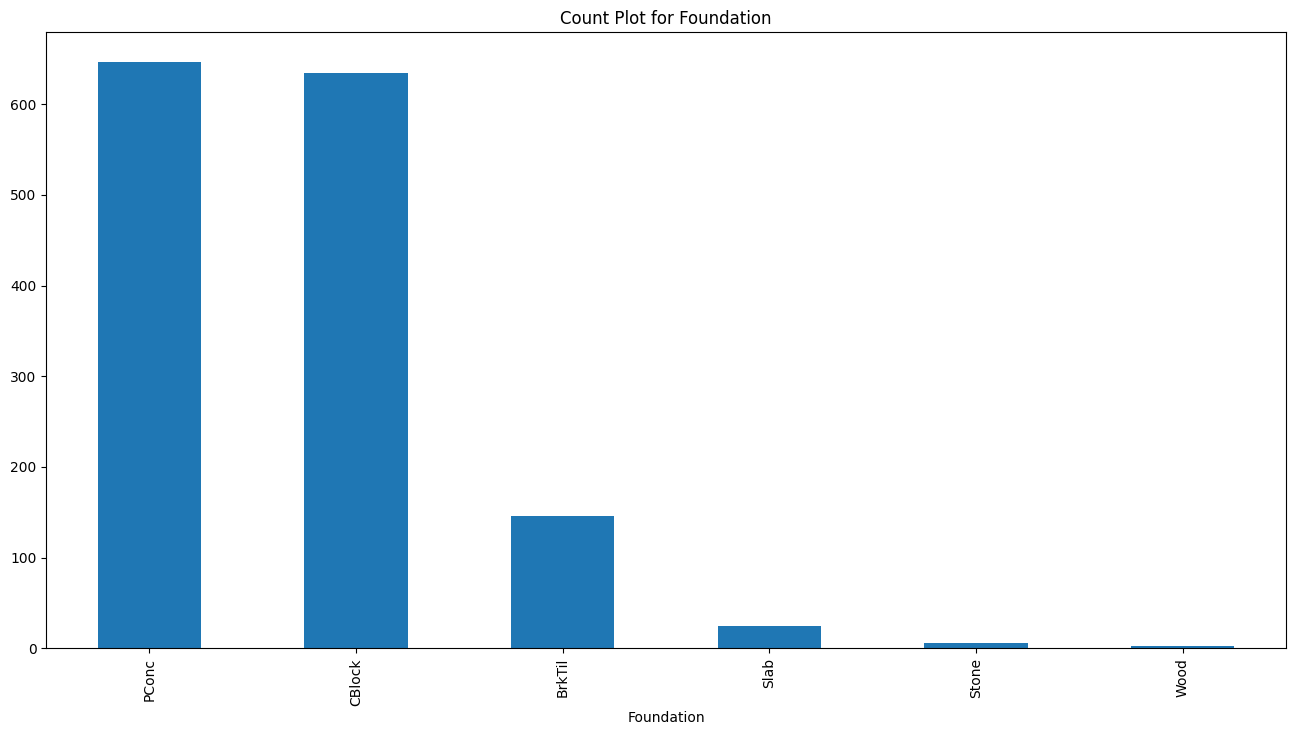

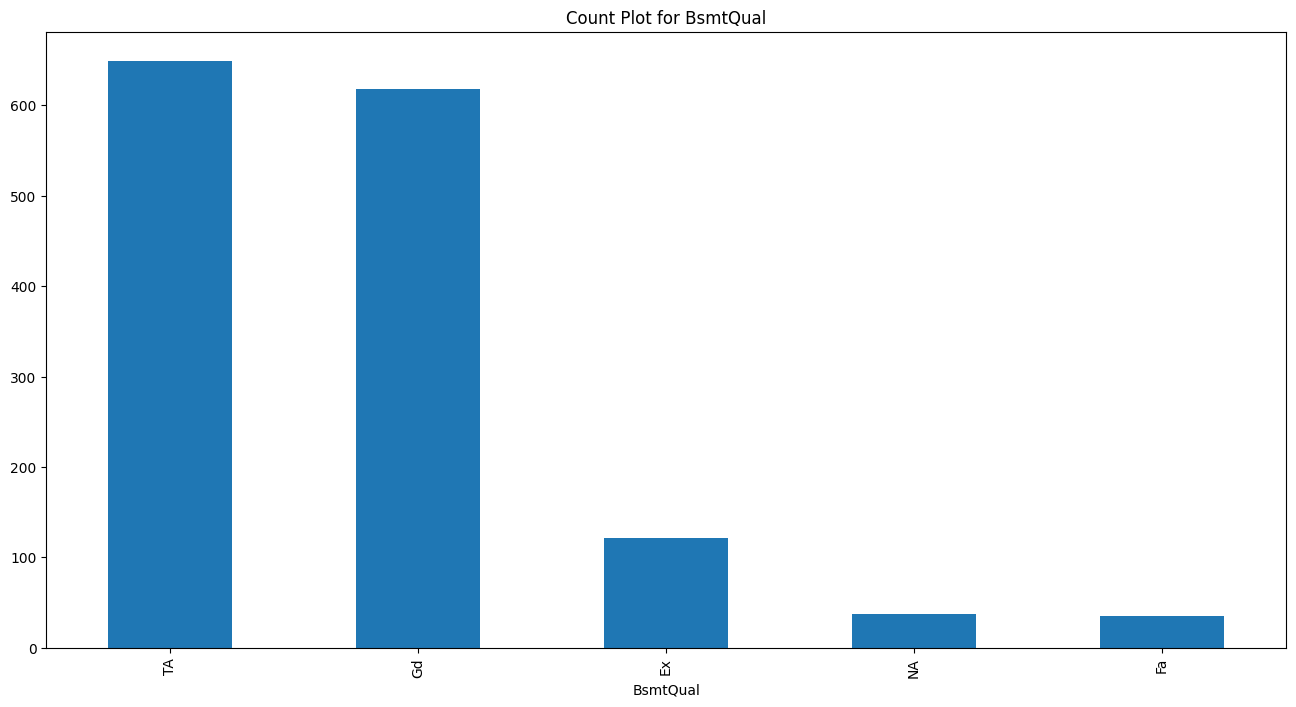

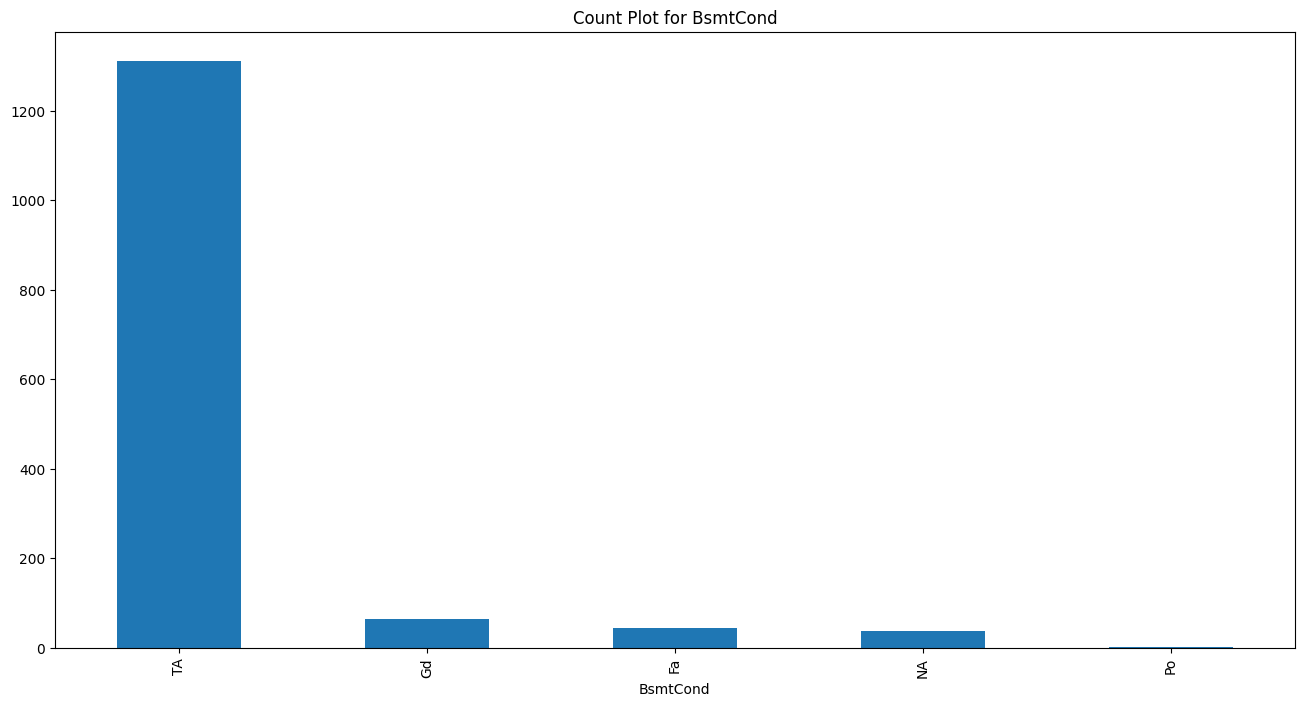

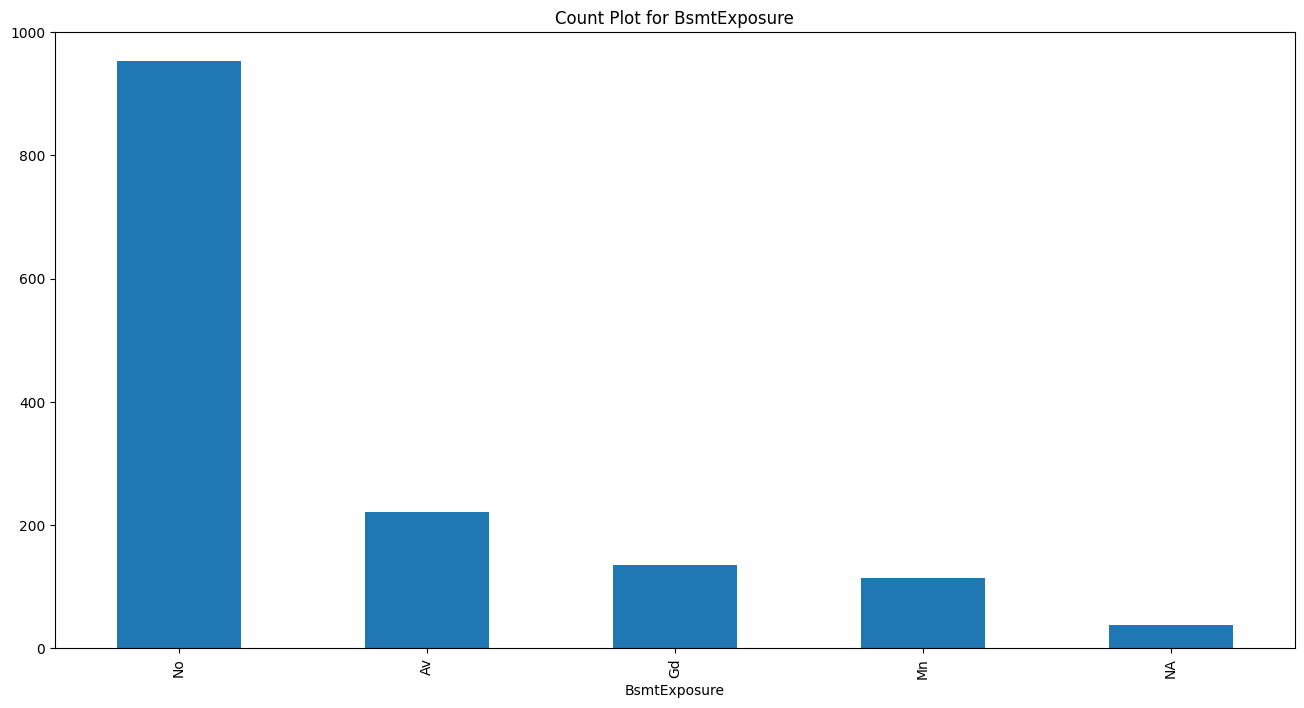

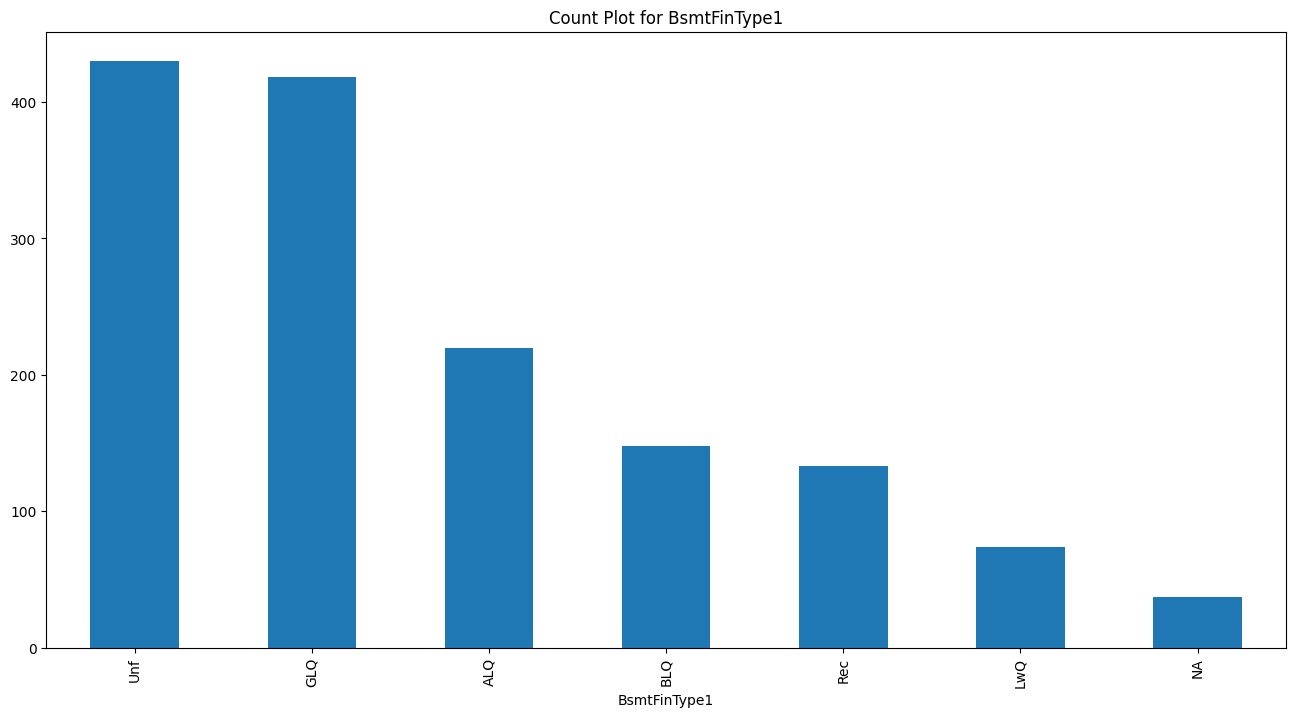

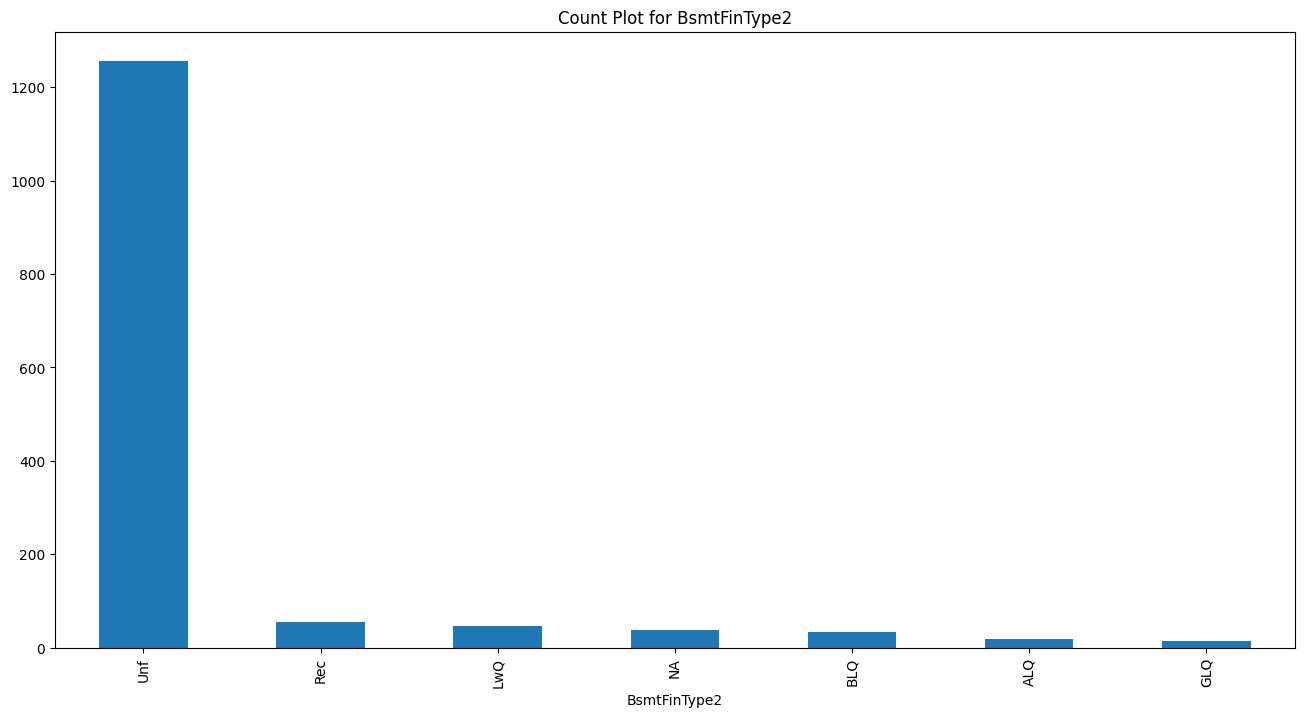

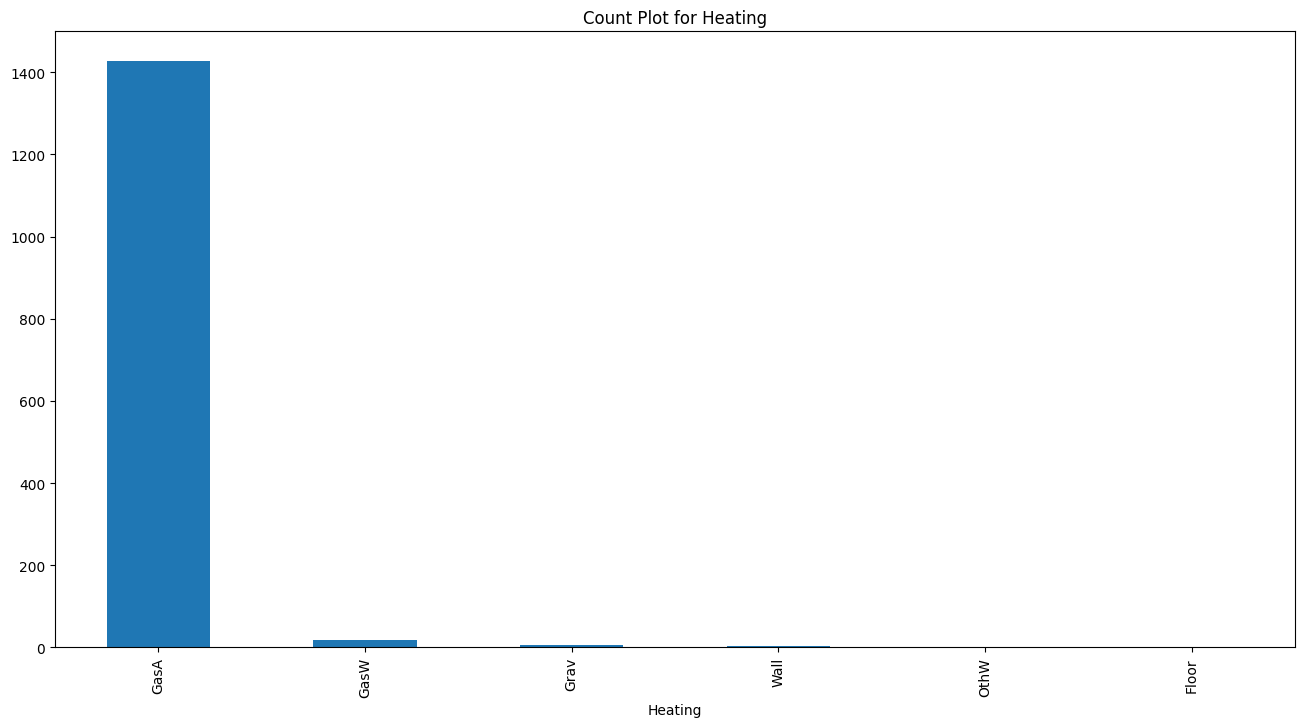

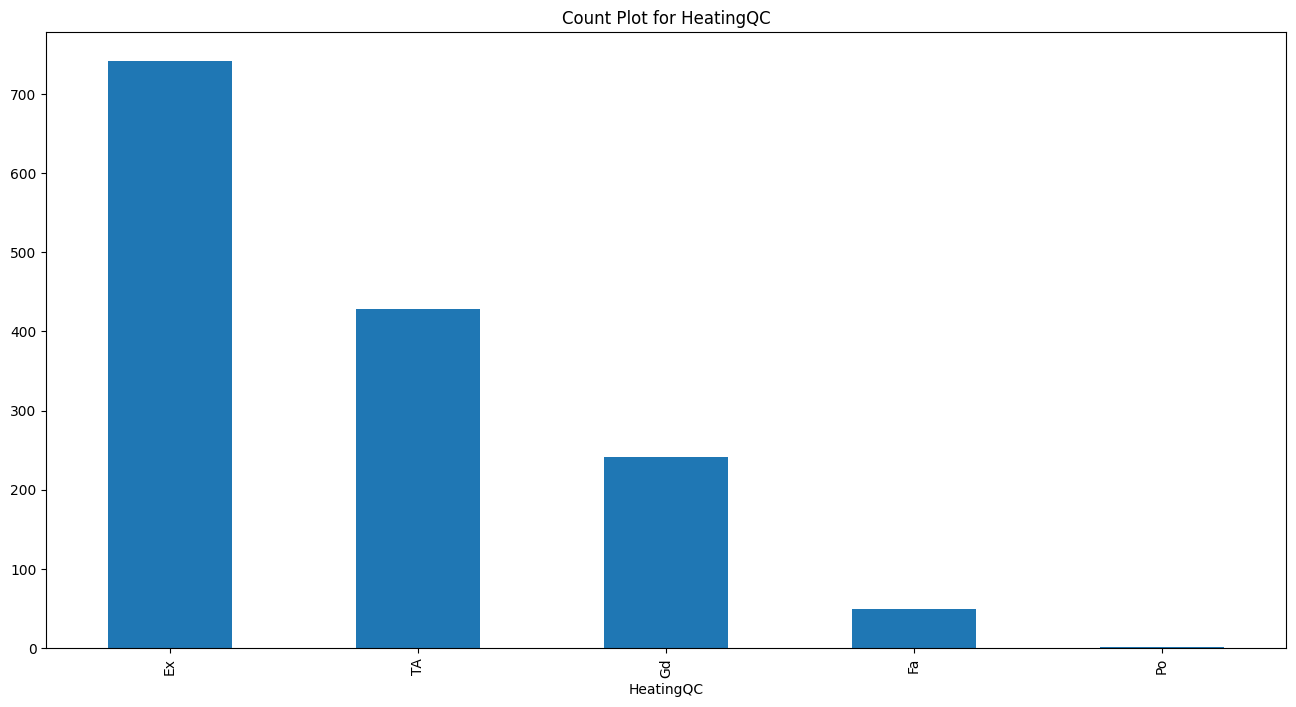

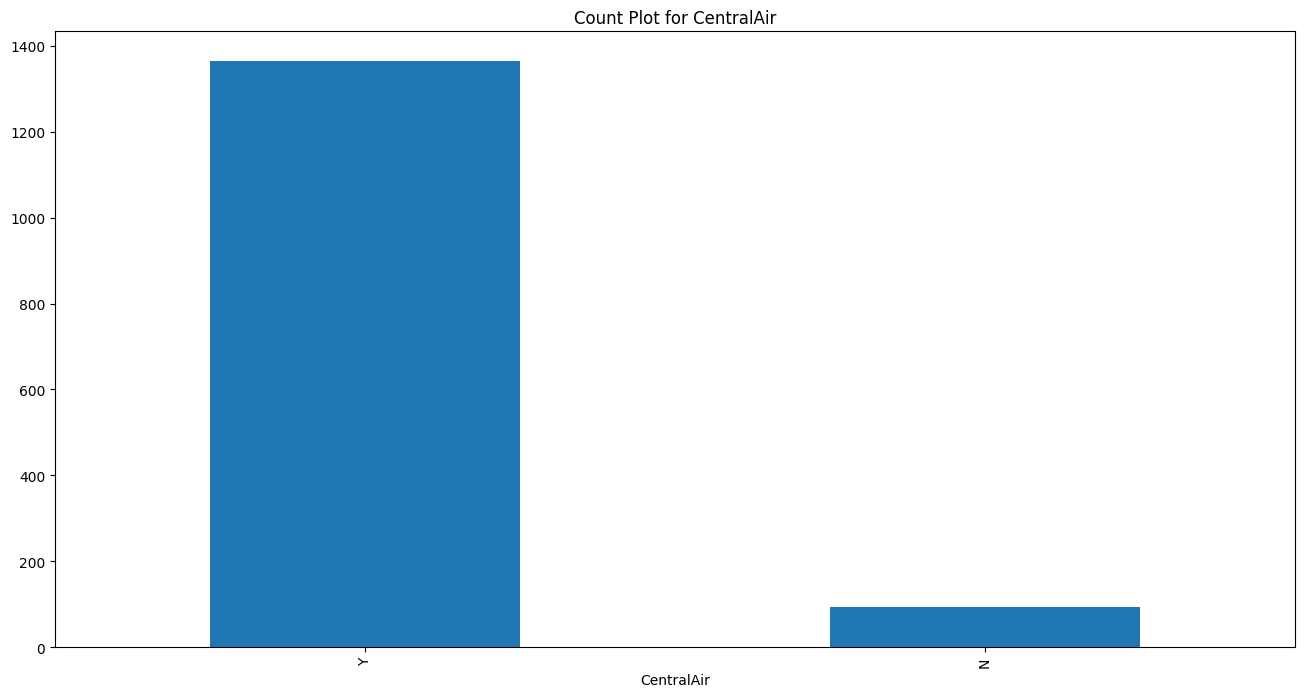

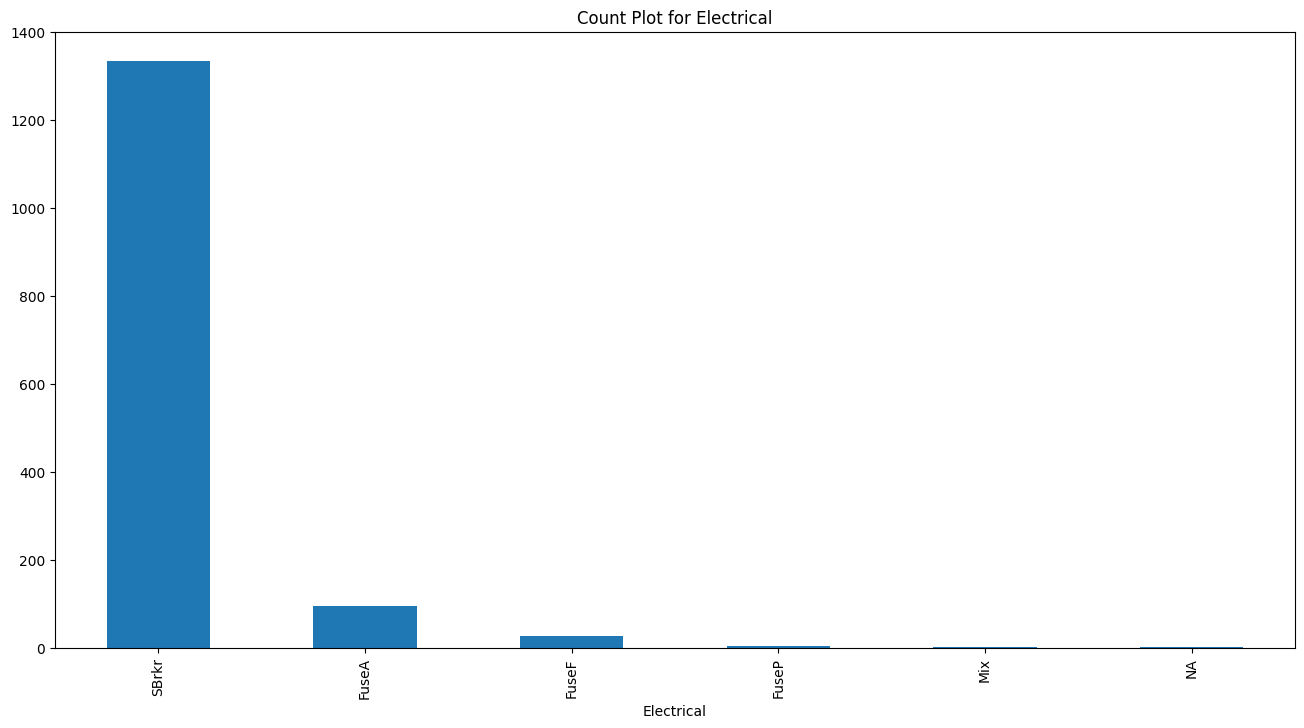

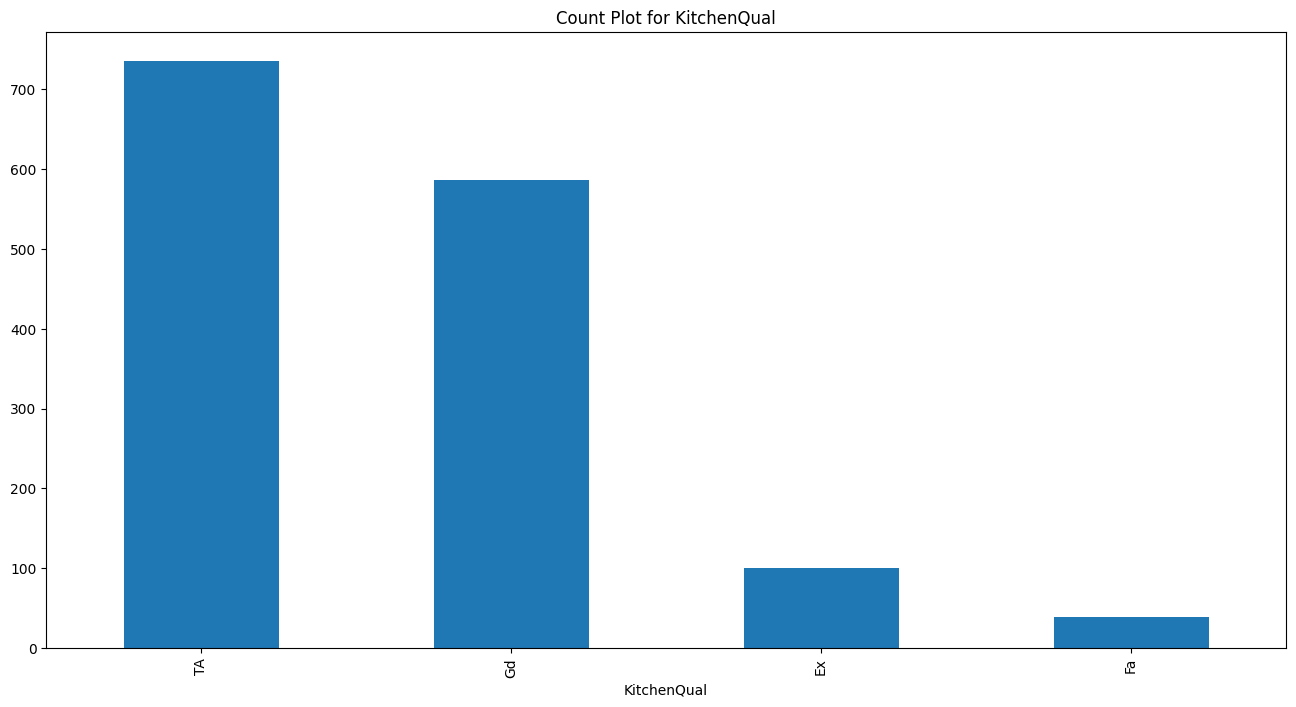

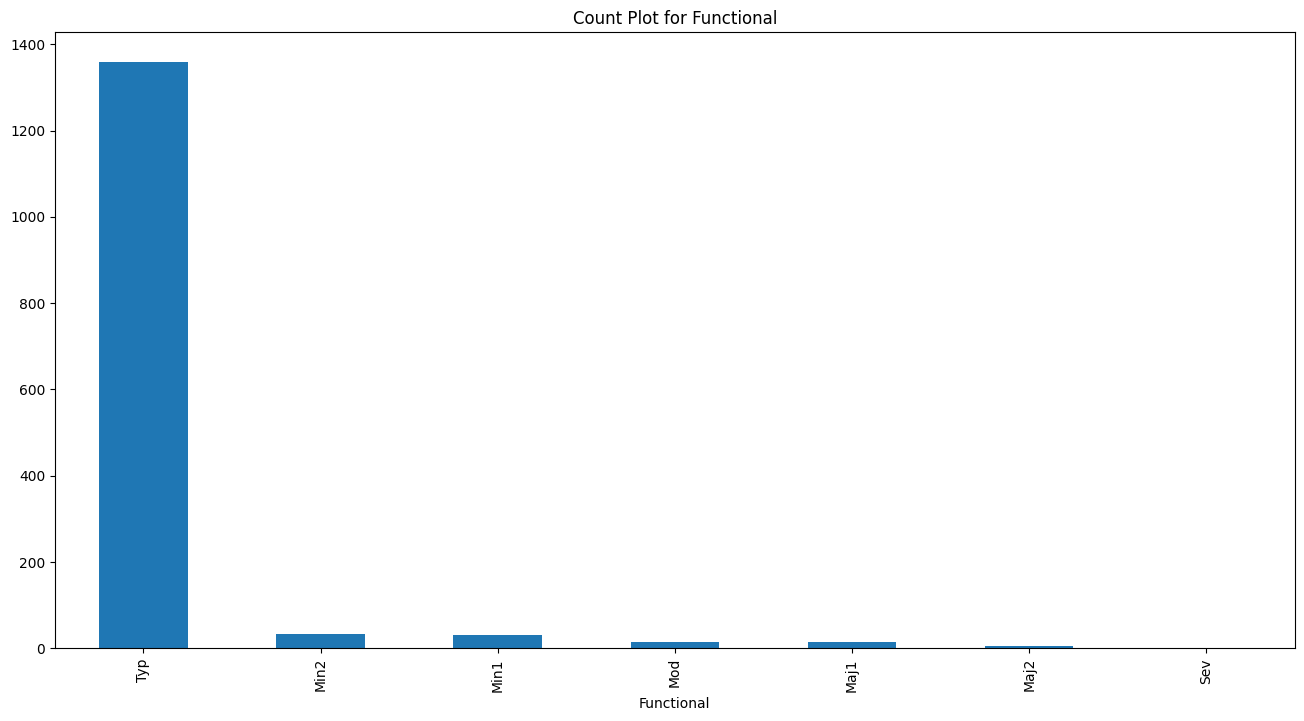

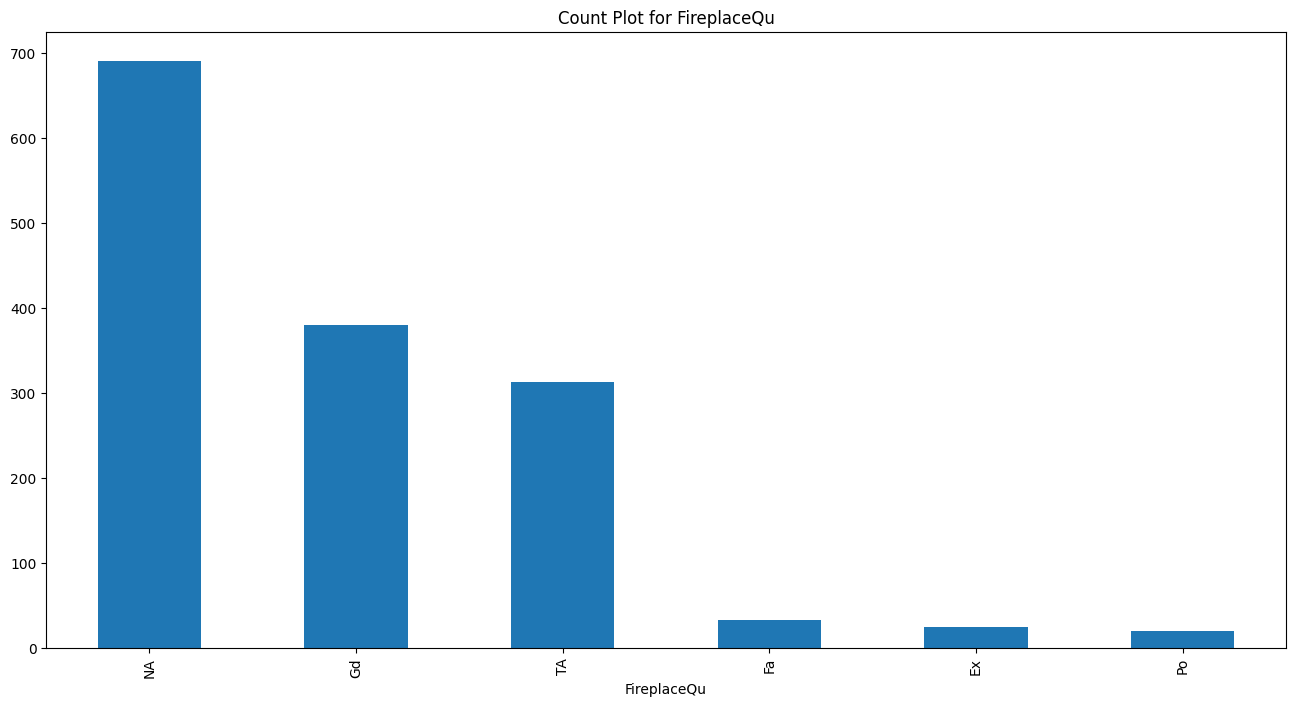

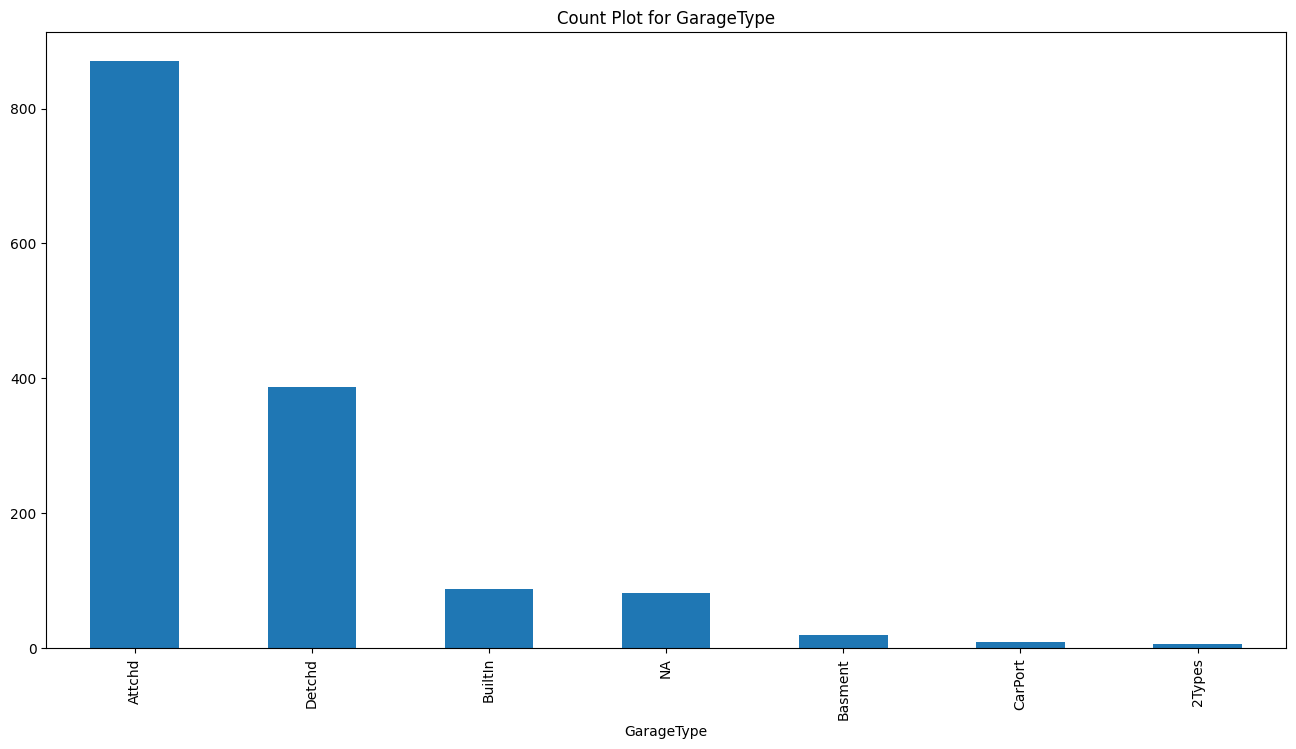

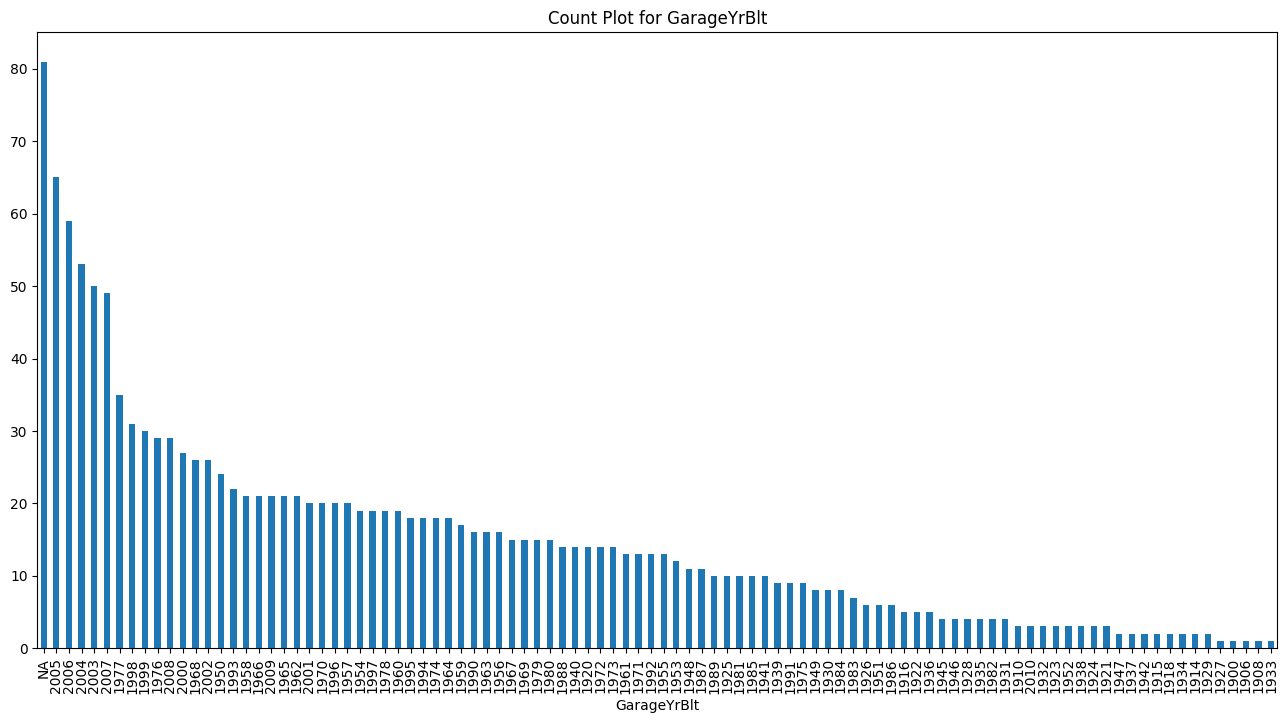

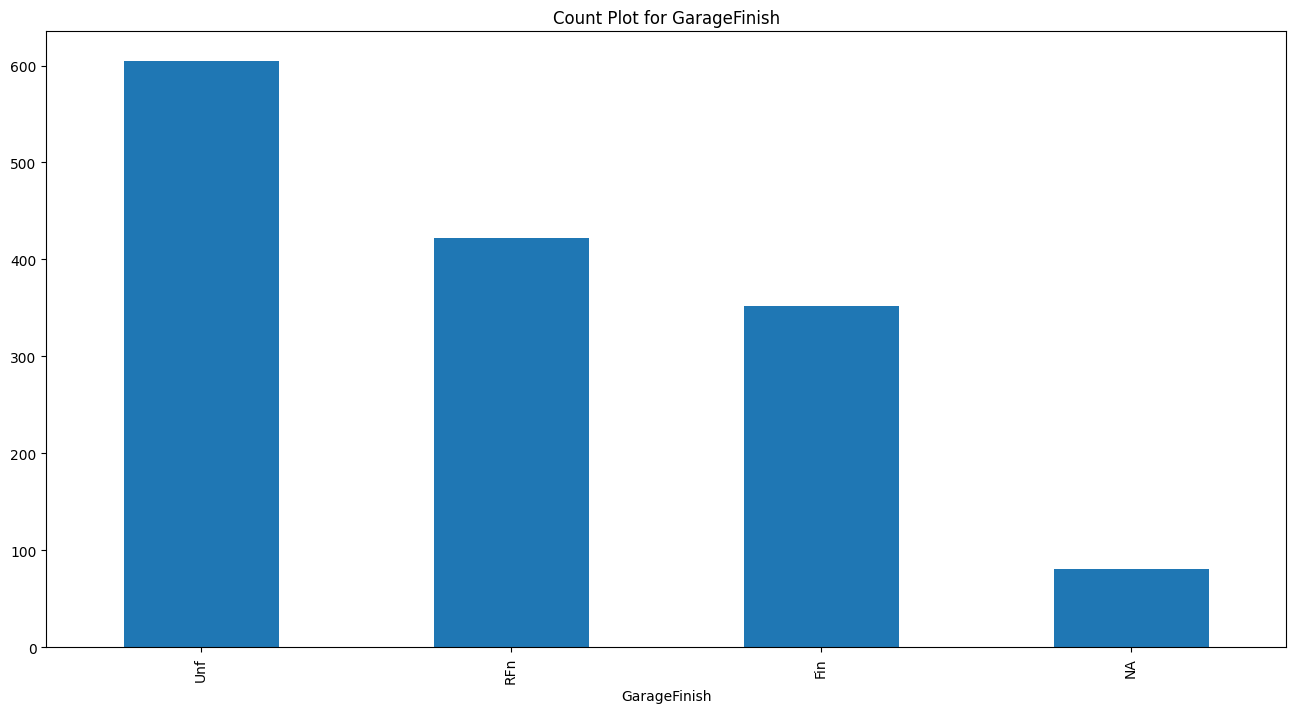

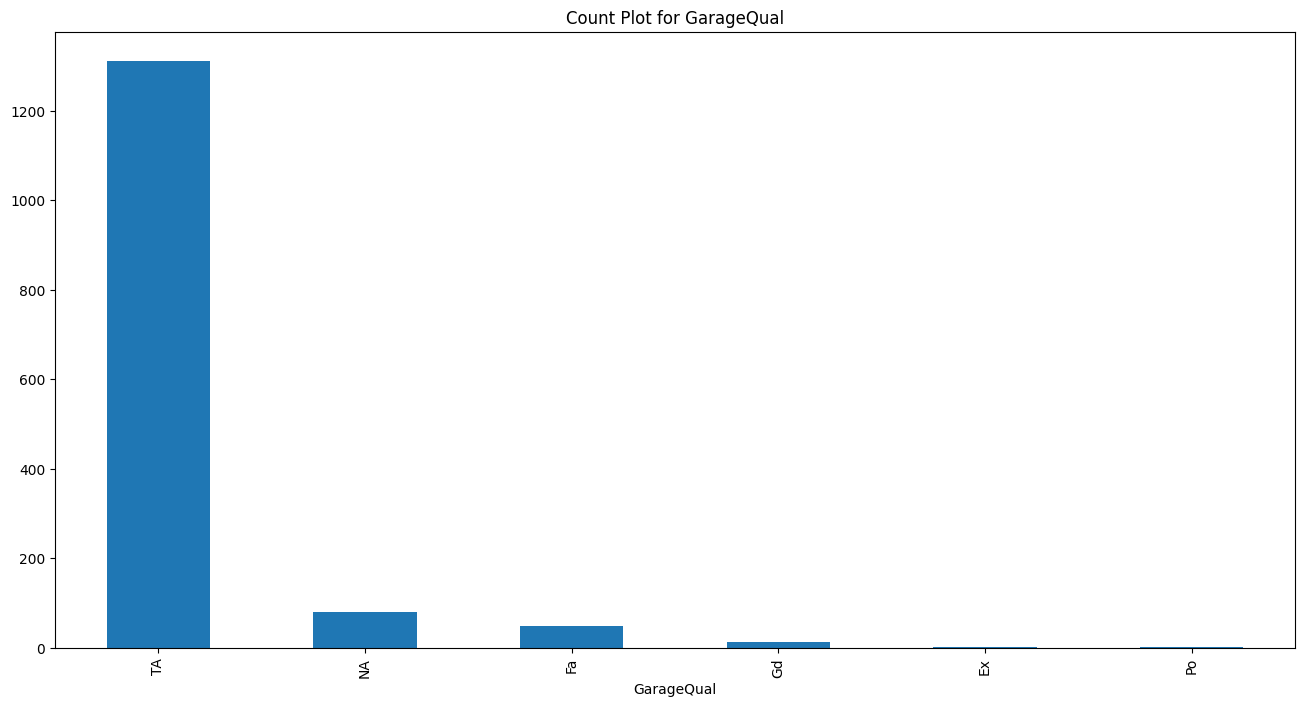

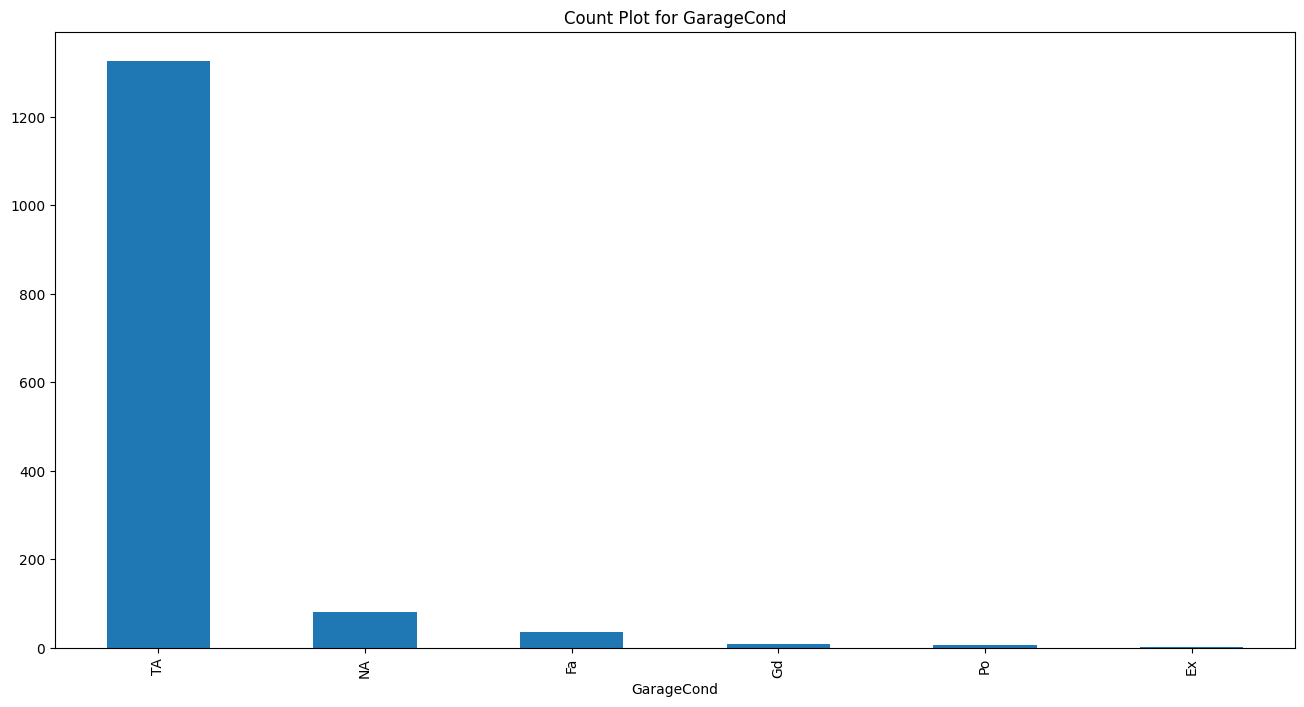

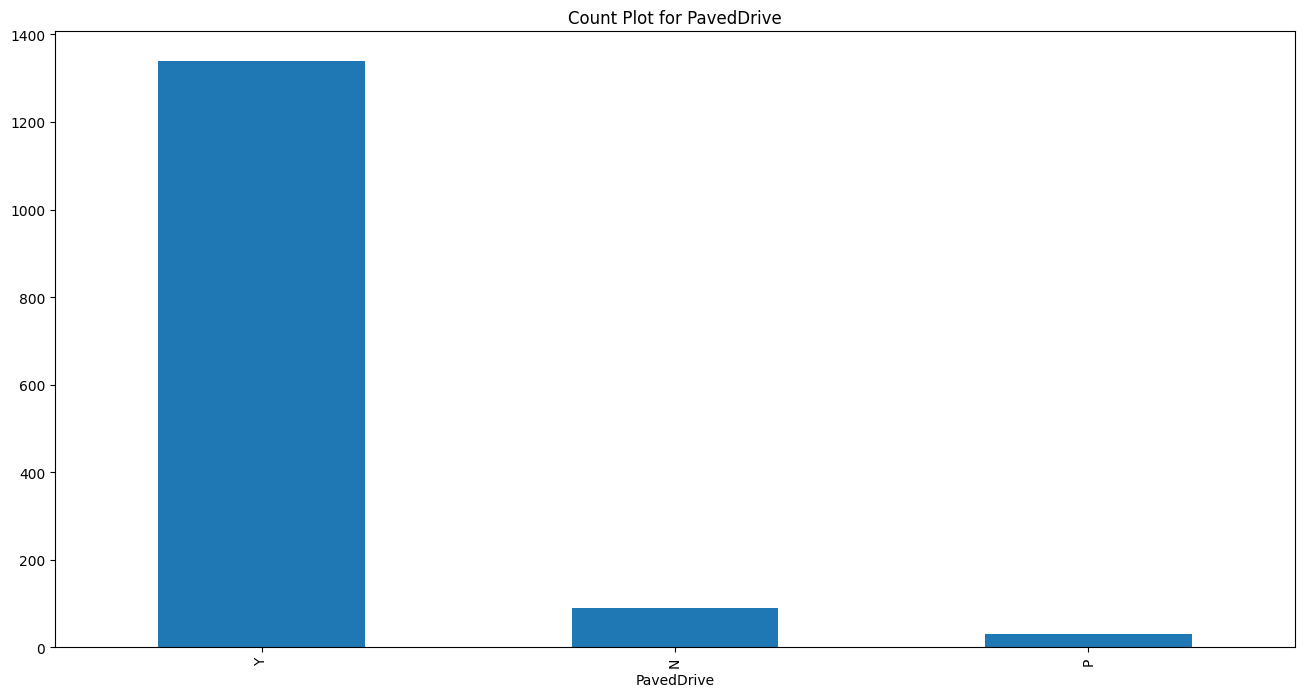

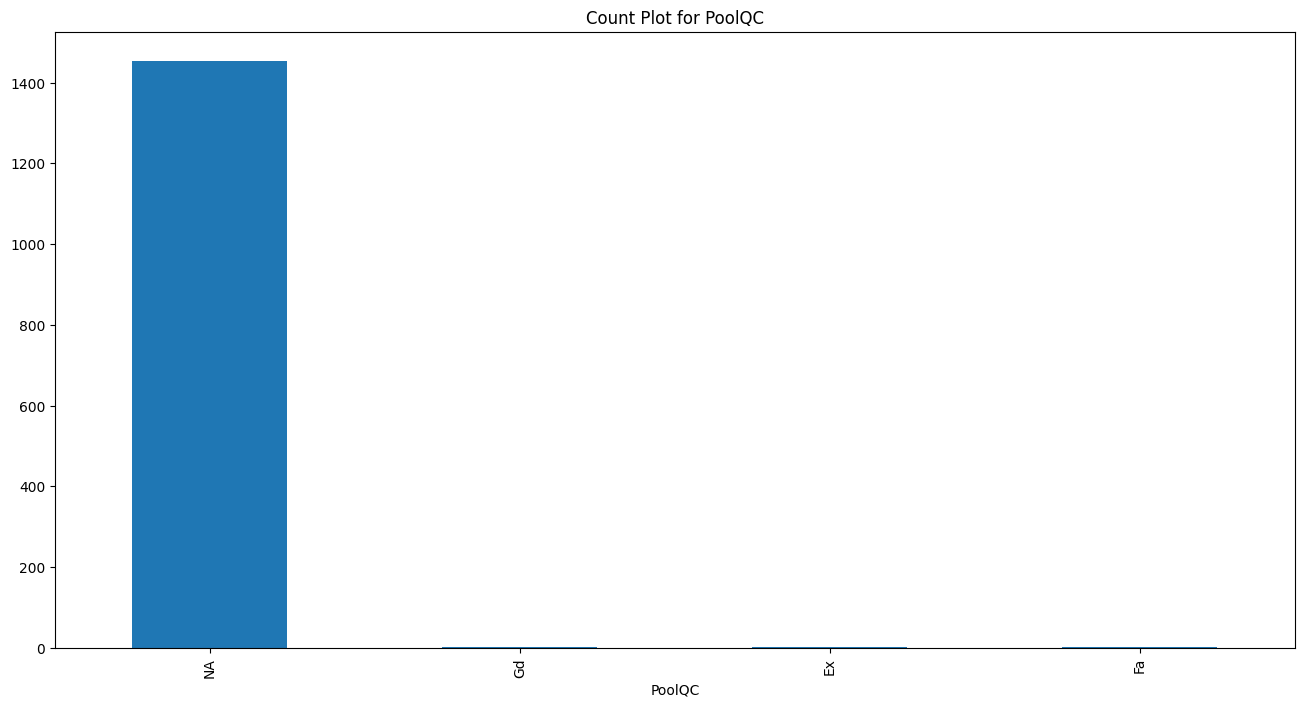

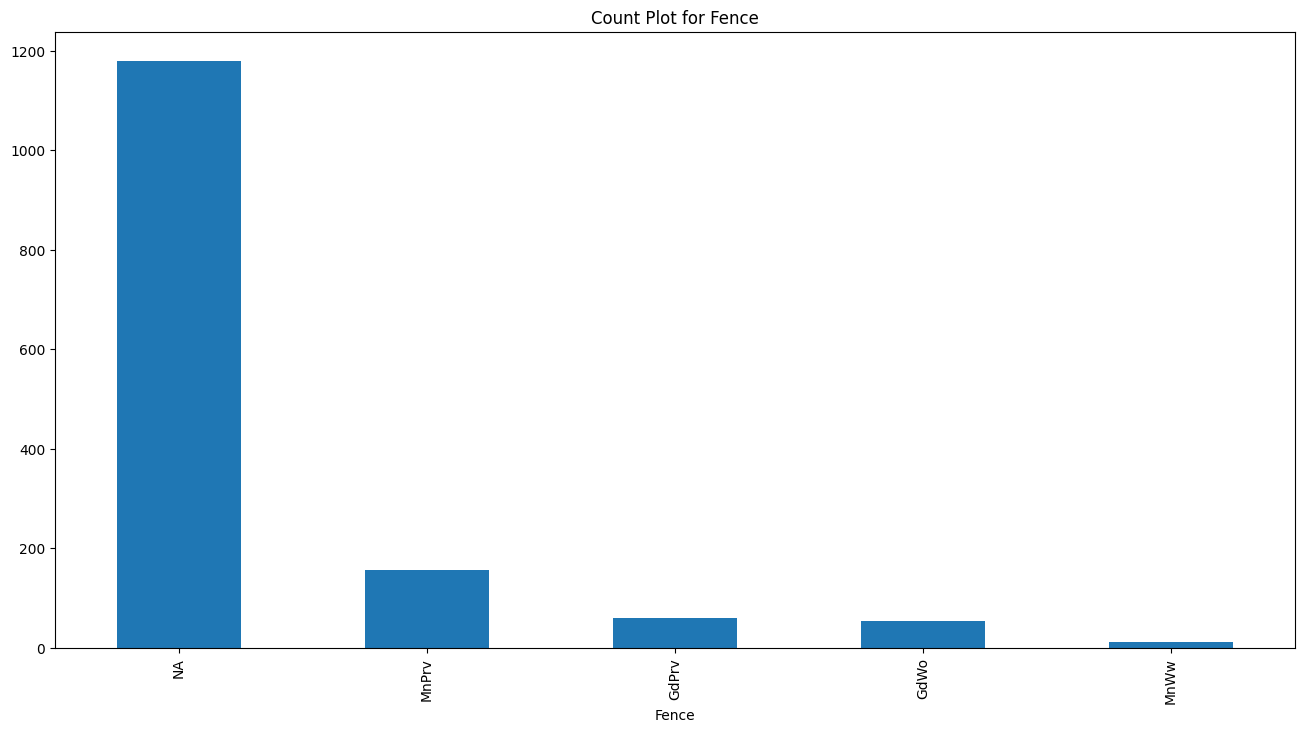

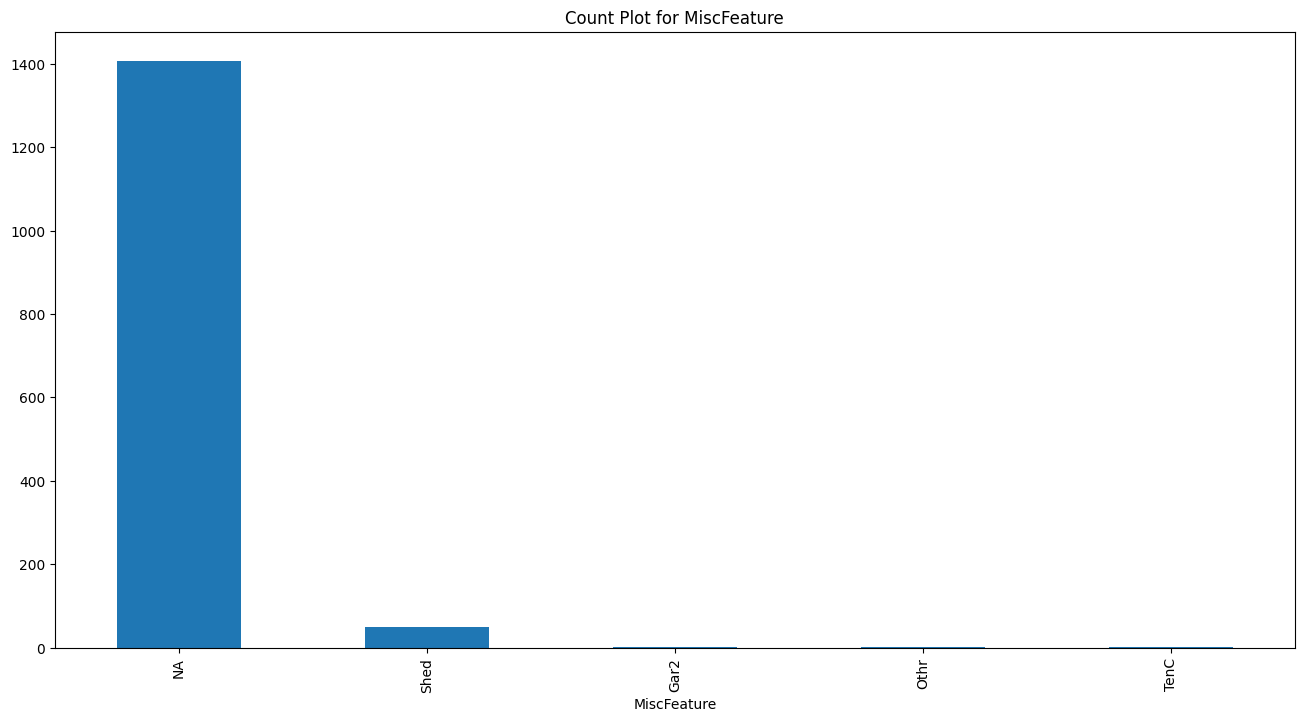

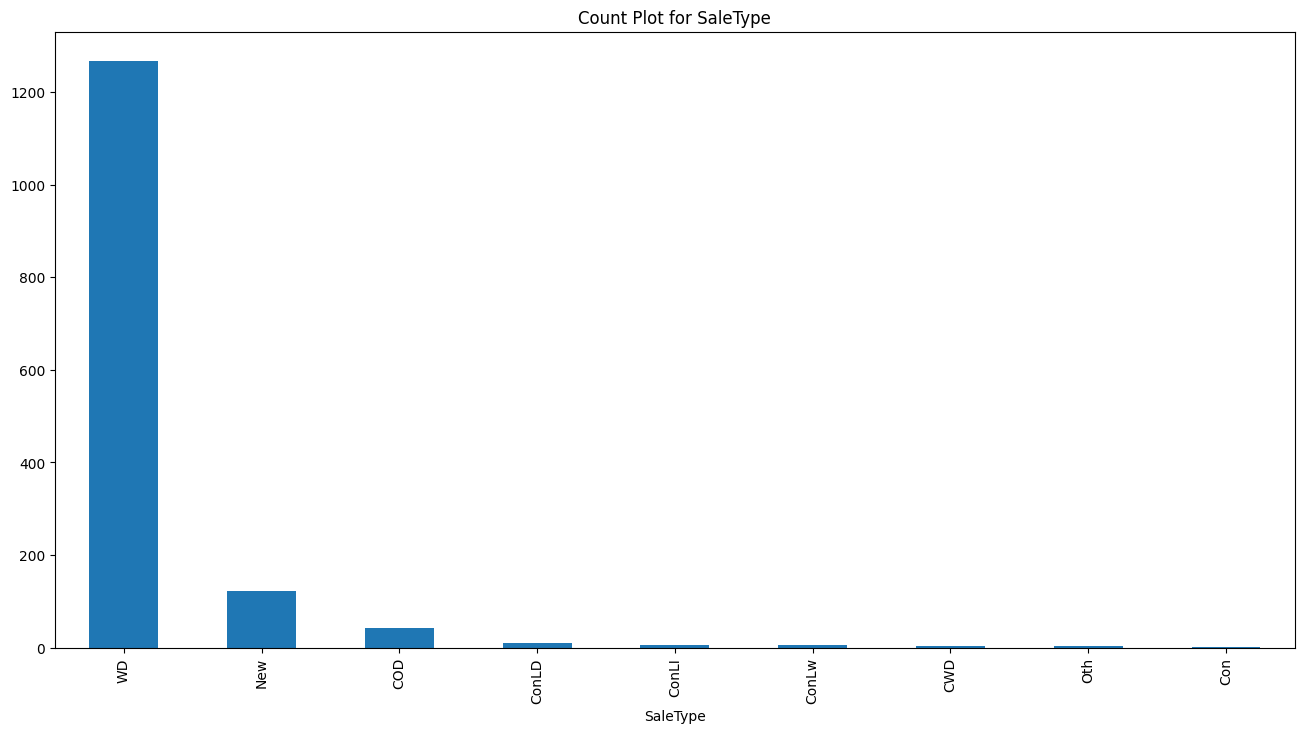

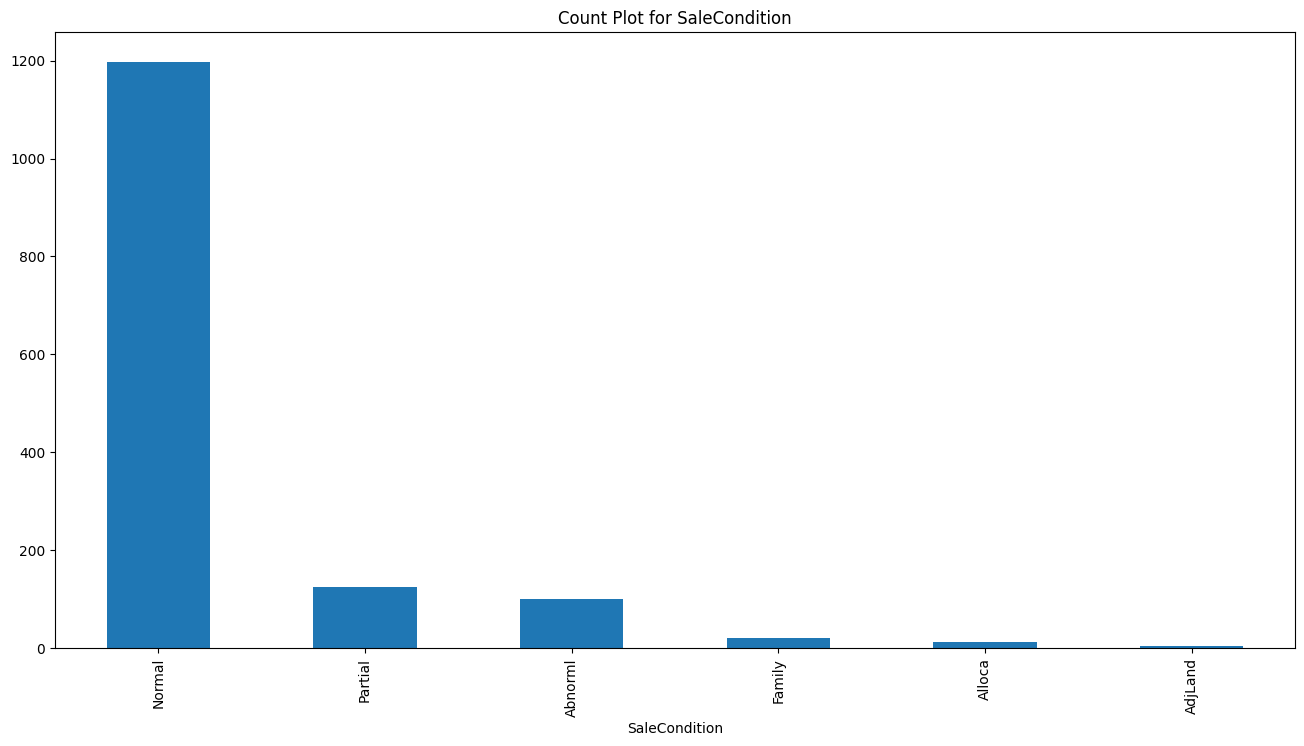

In [10]:
for i in catA:
    df[i].value_counts().plot(kind='bar',
                              title=f'Count Plot for {i}',
                              figsize=(16,8))
    plt.show()

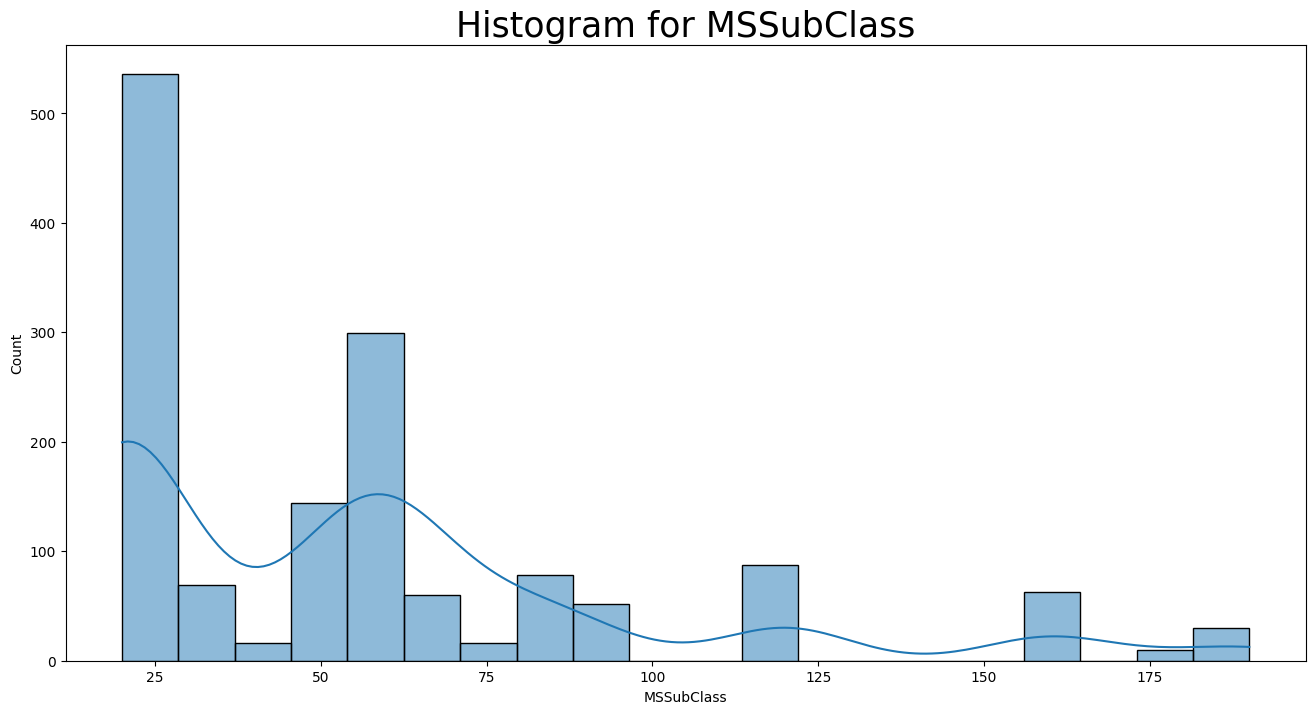

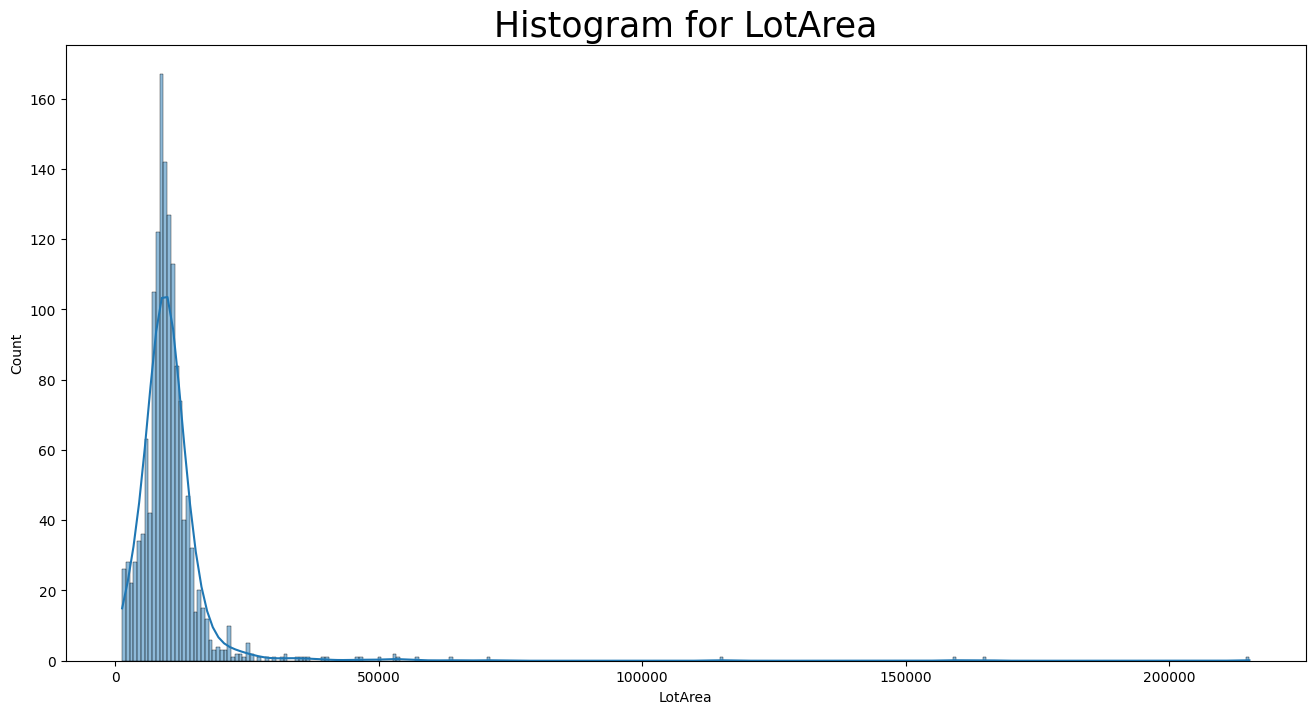

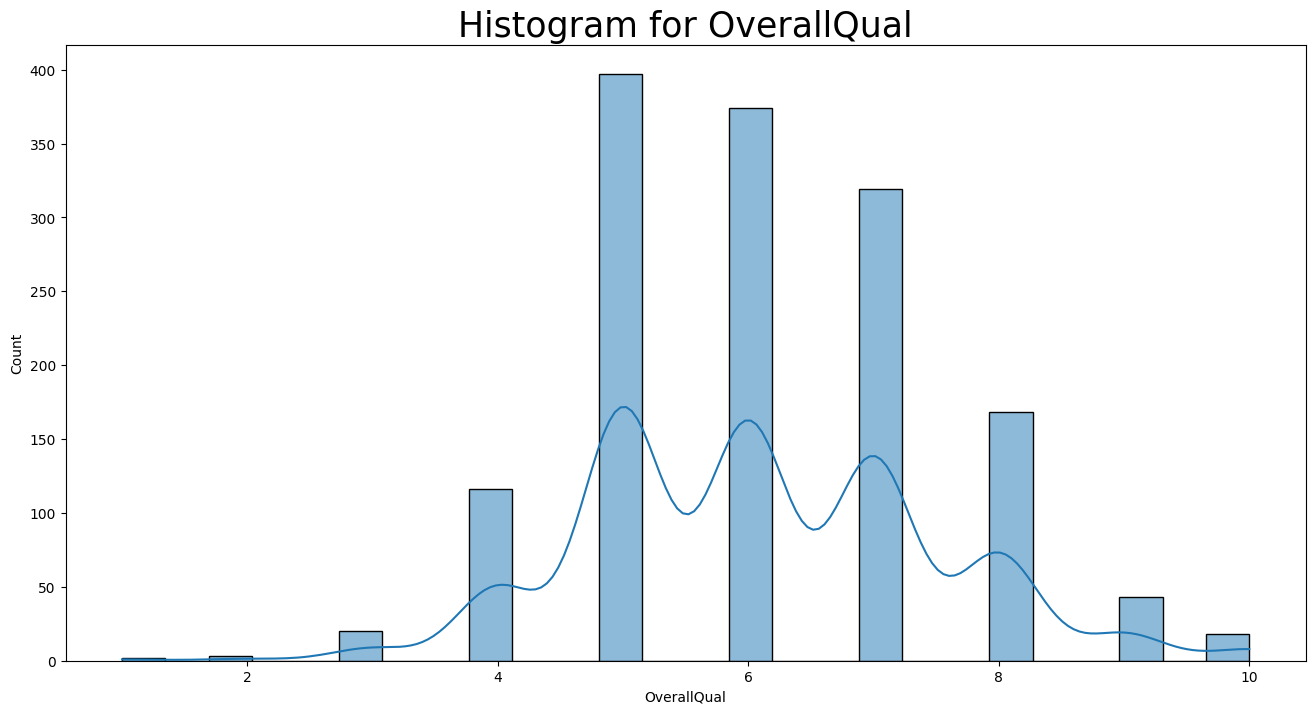

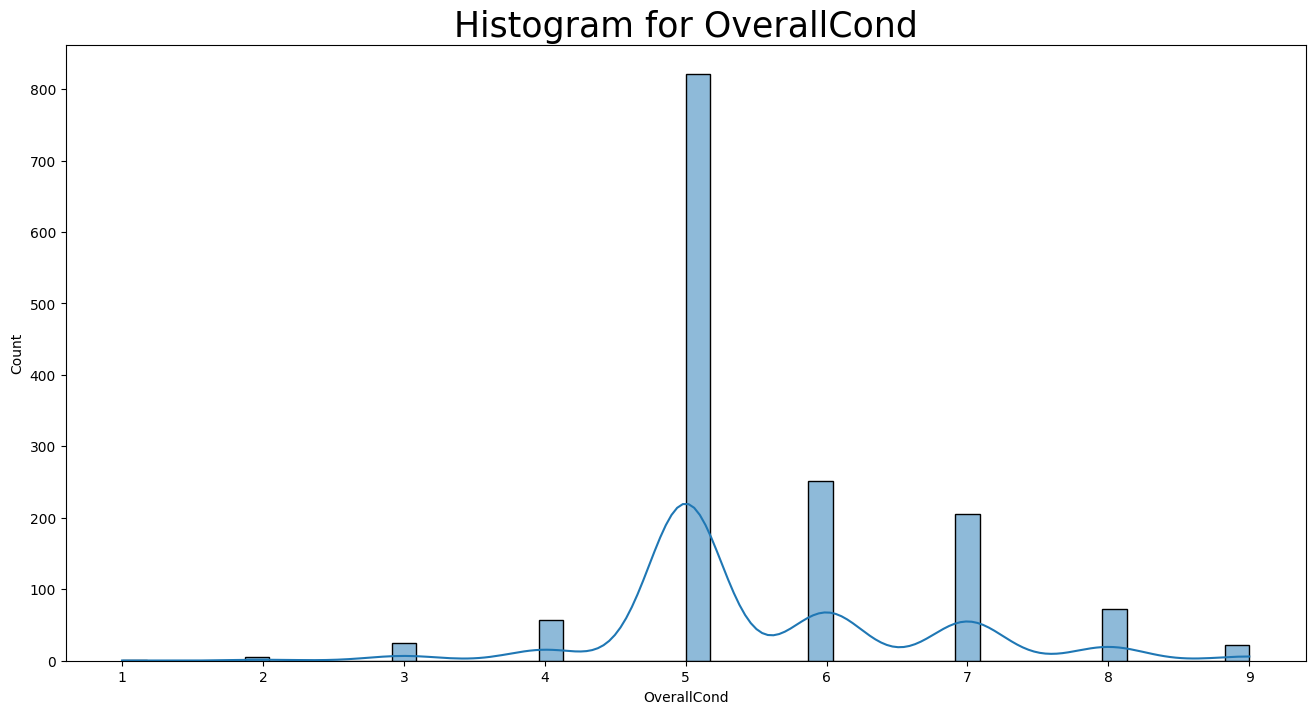

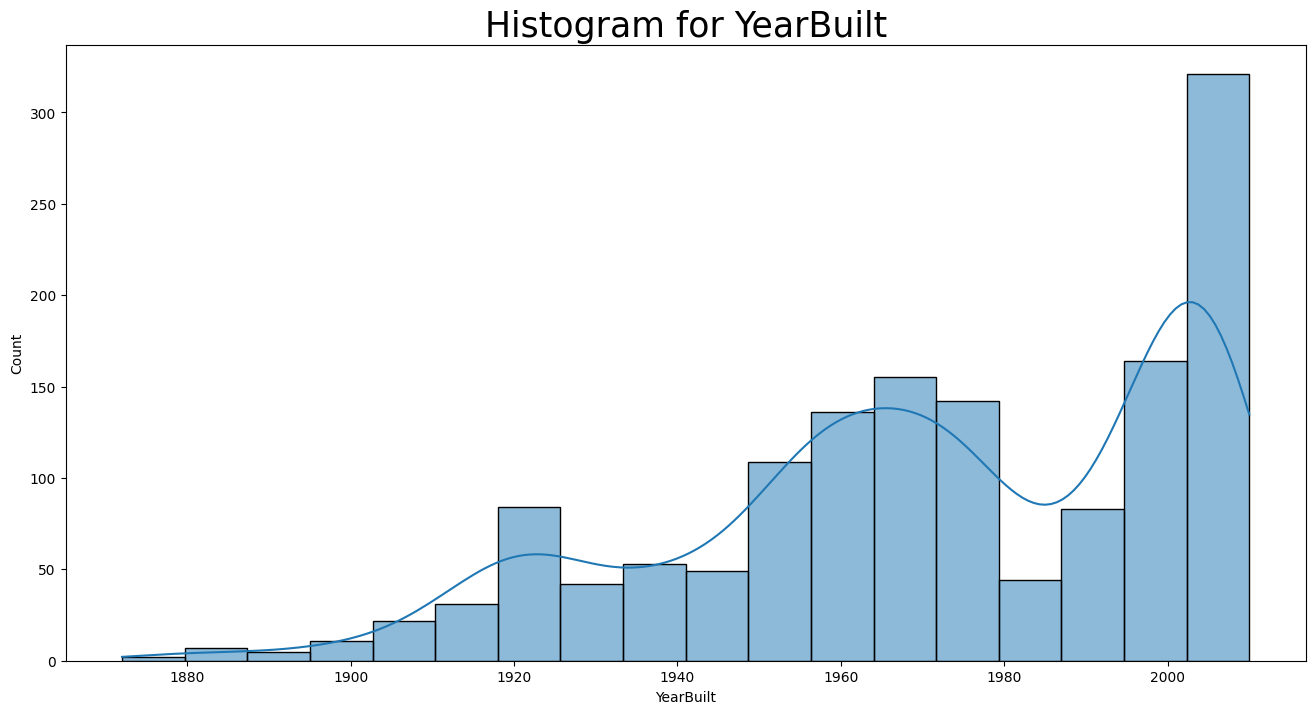

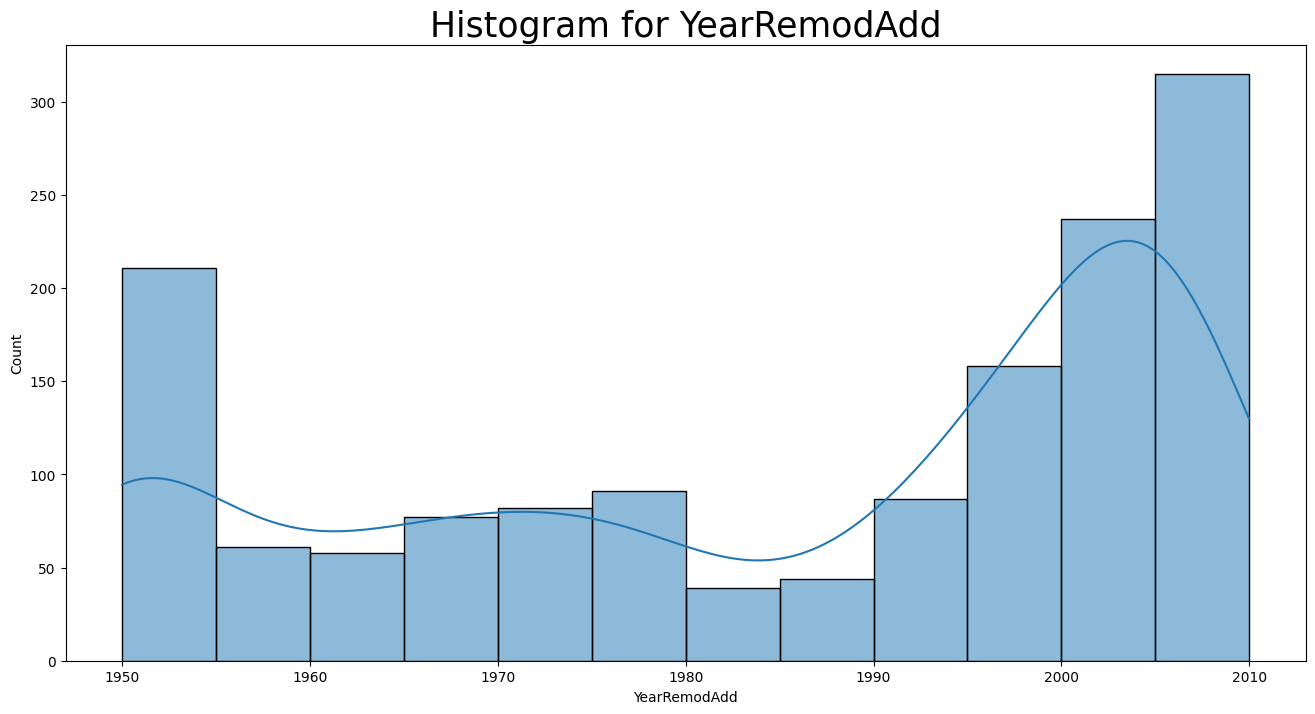

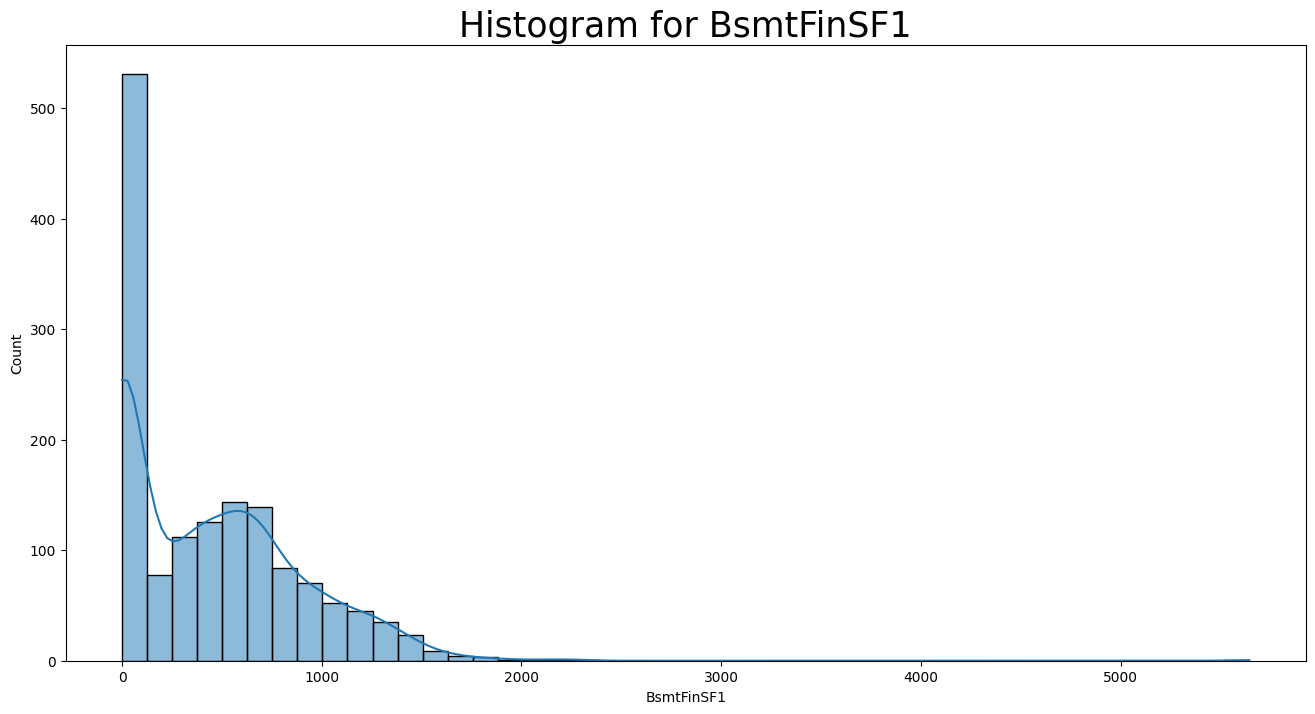

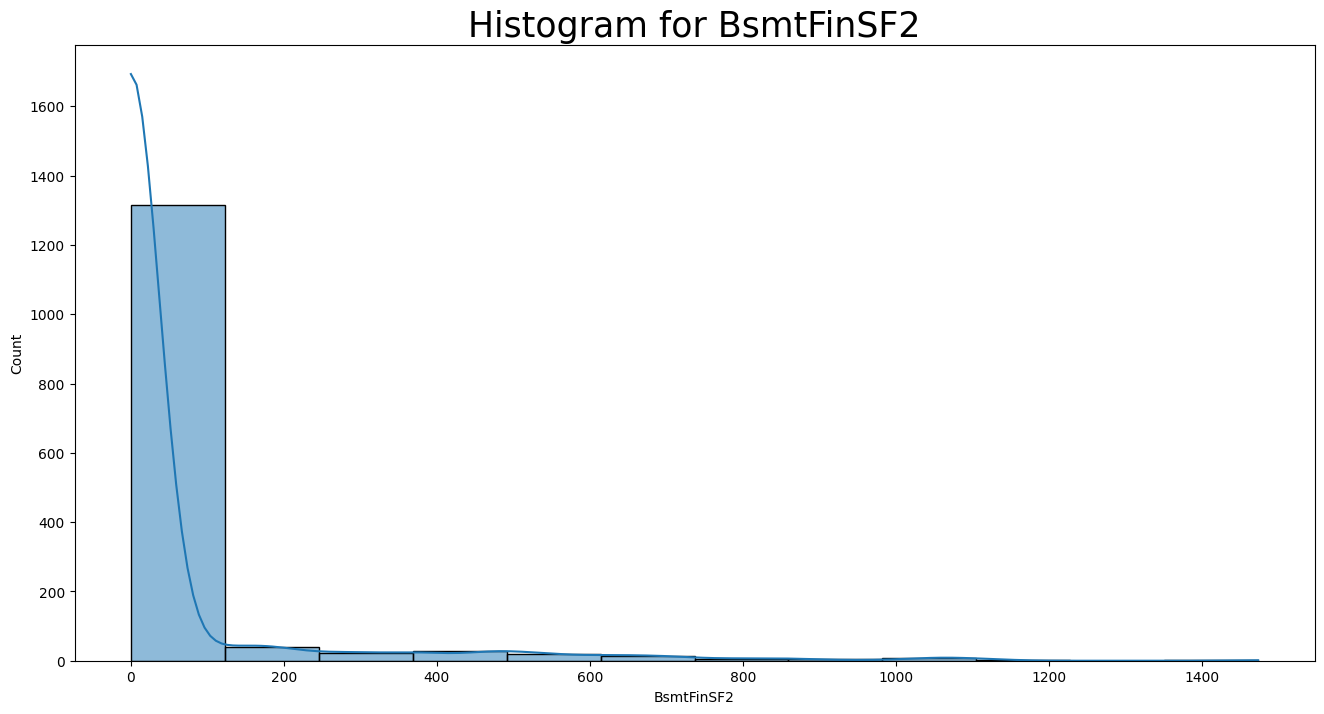

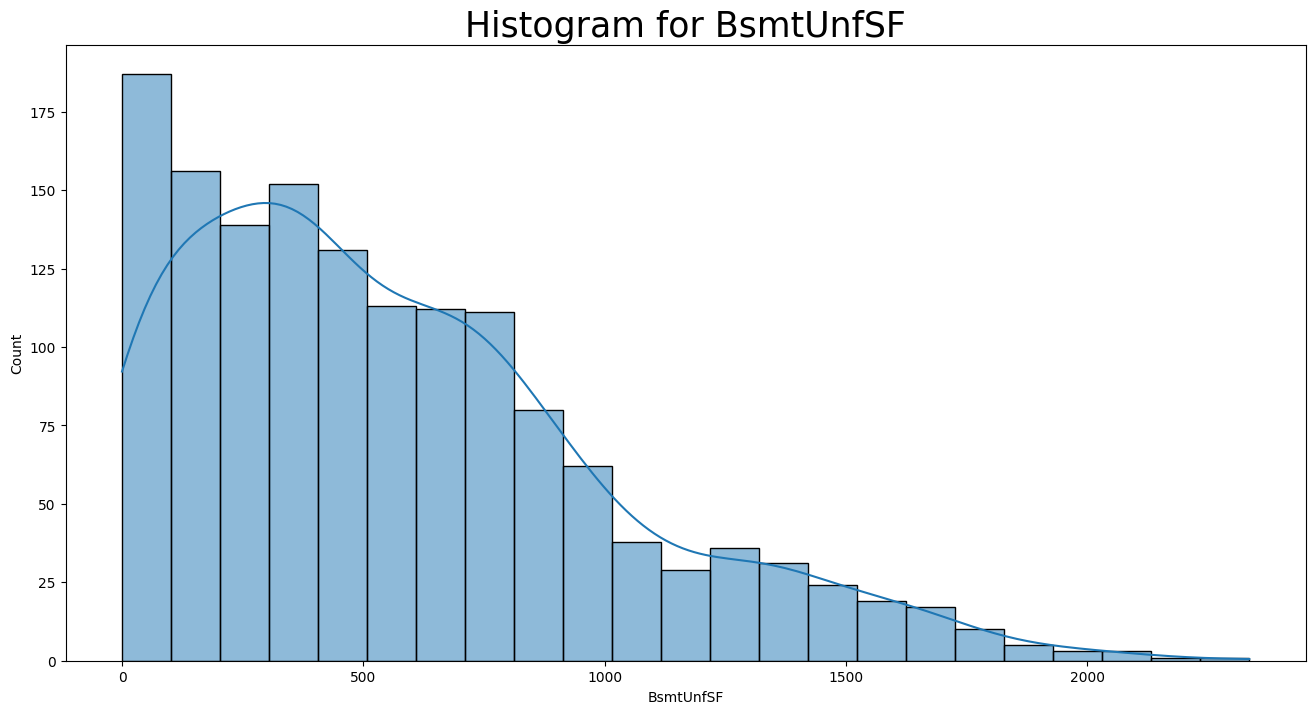

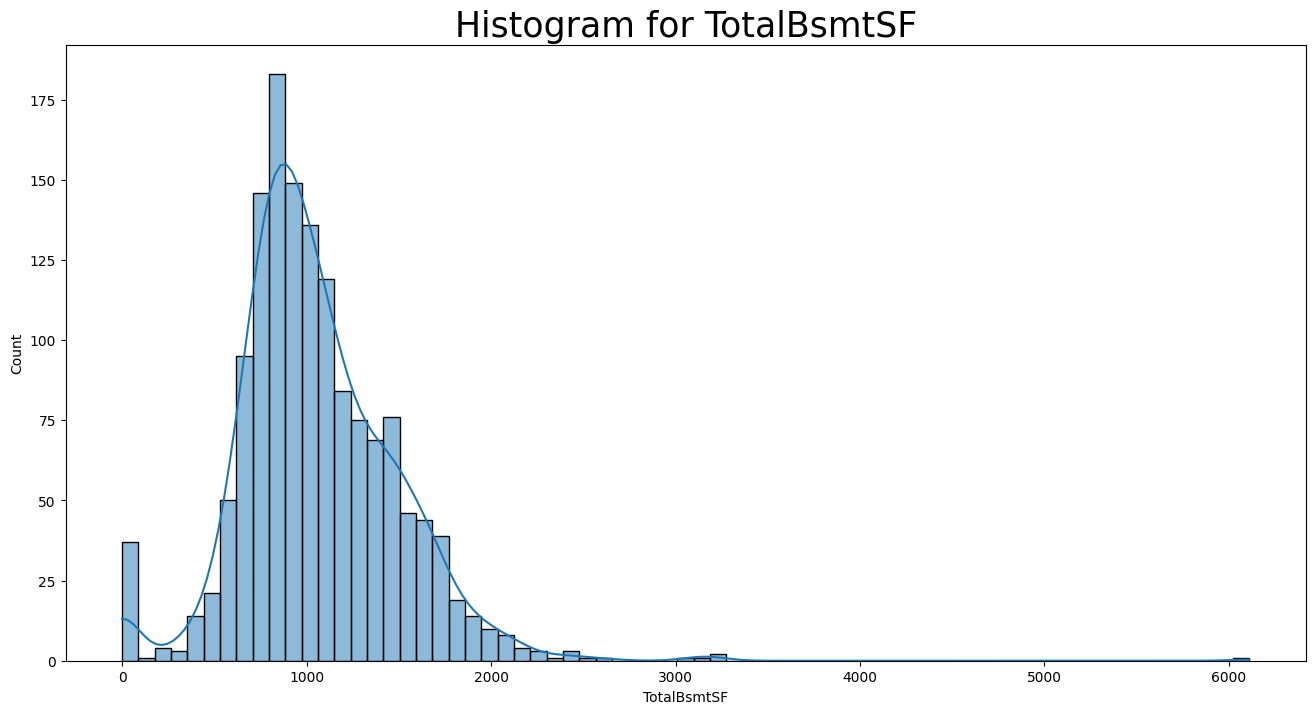

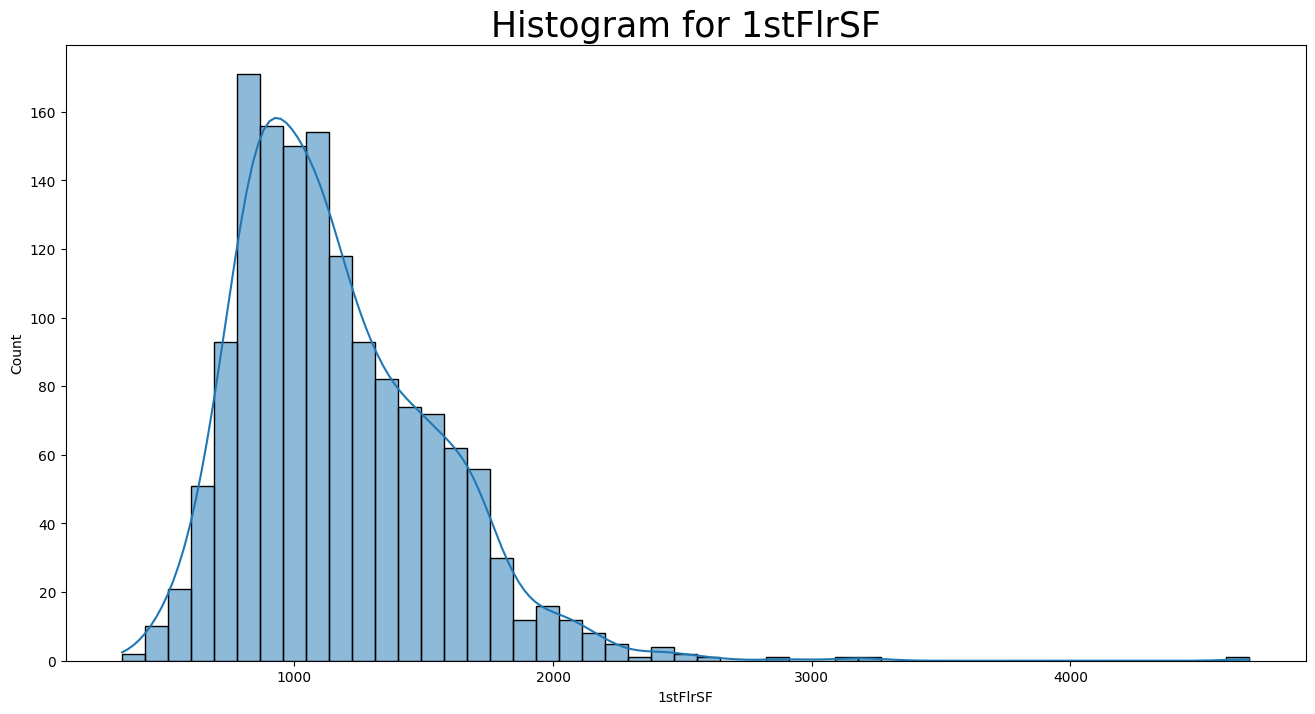

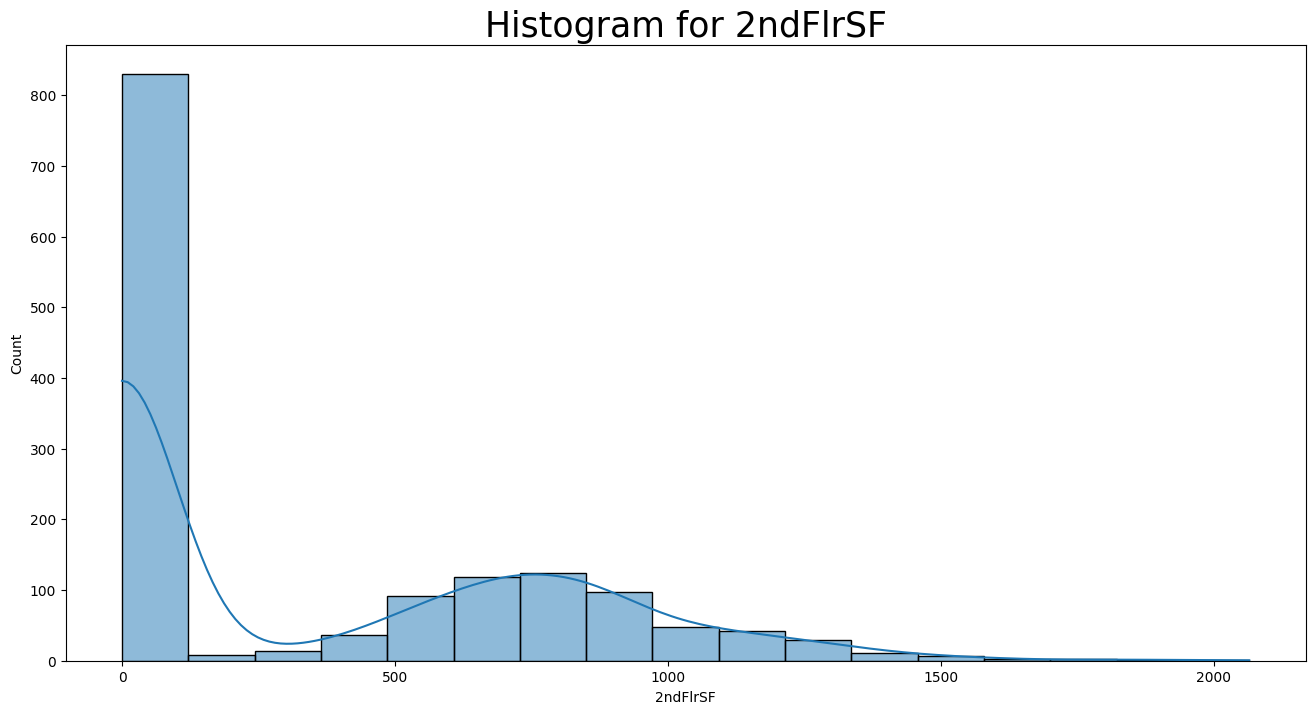

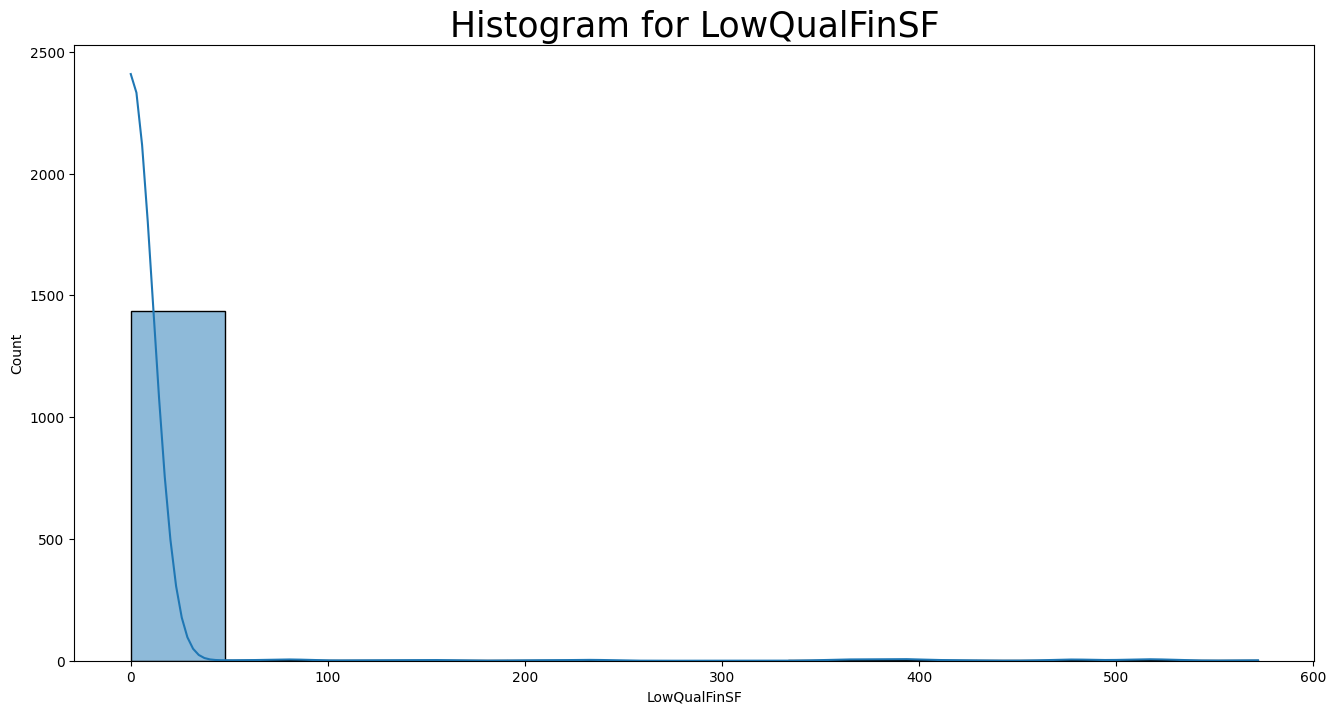

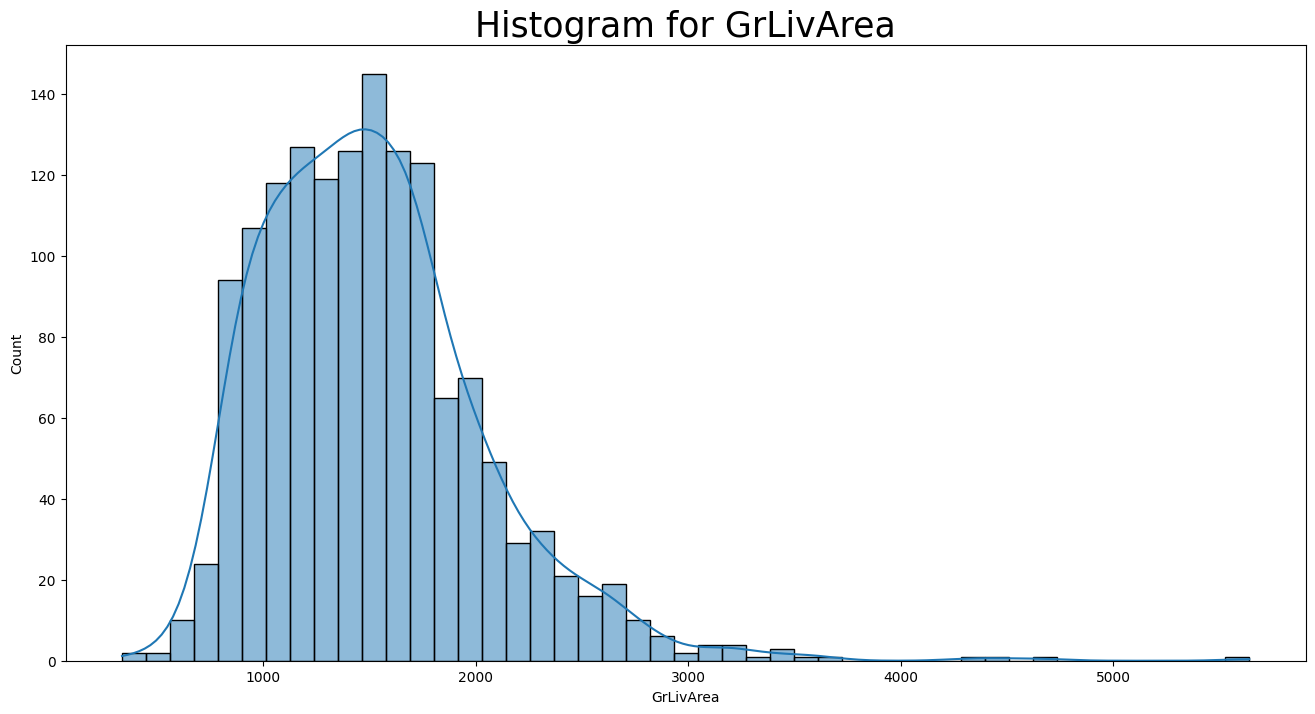

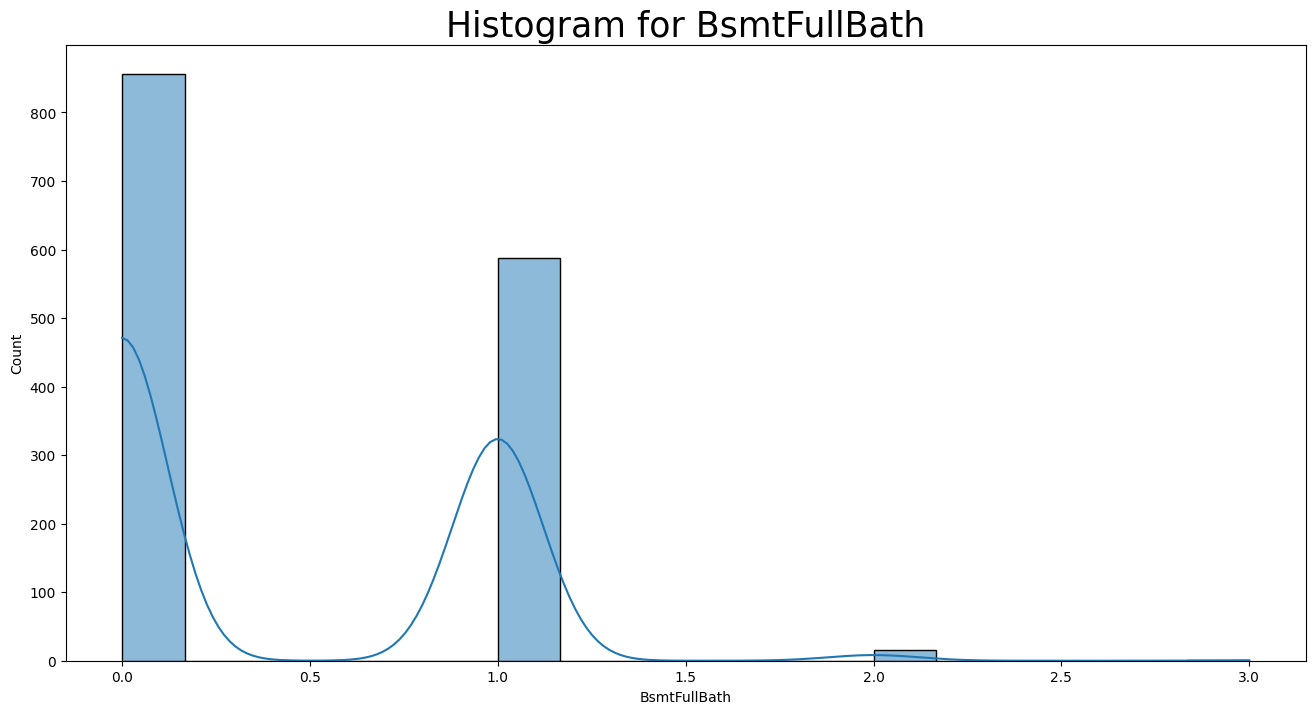

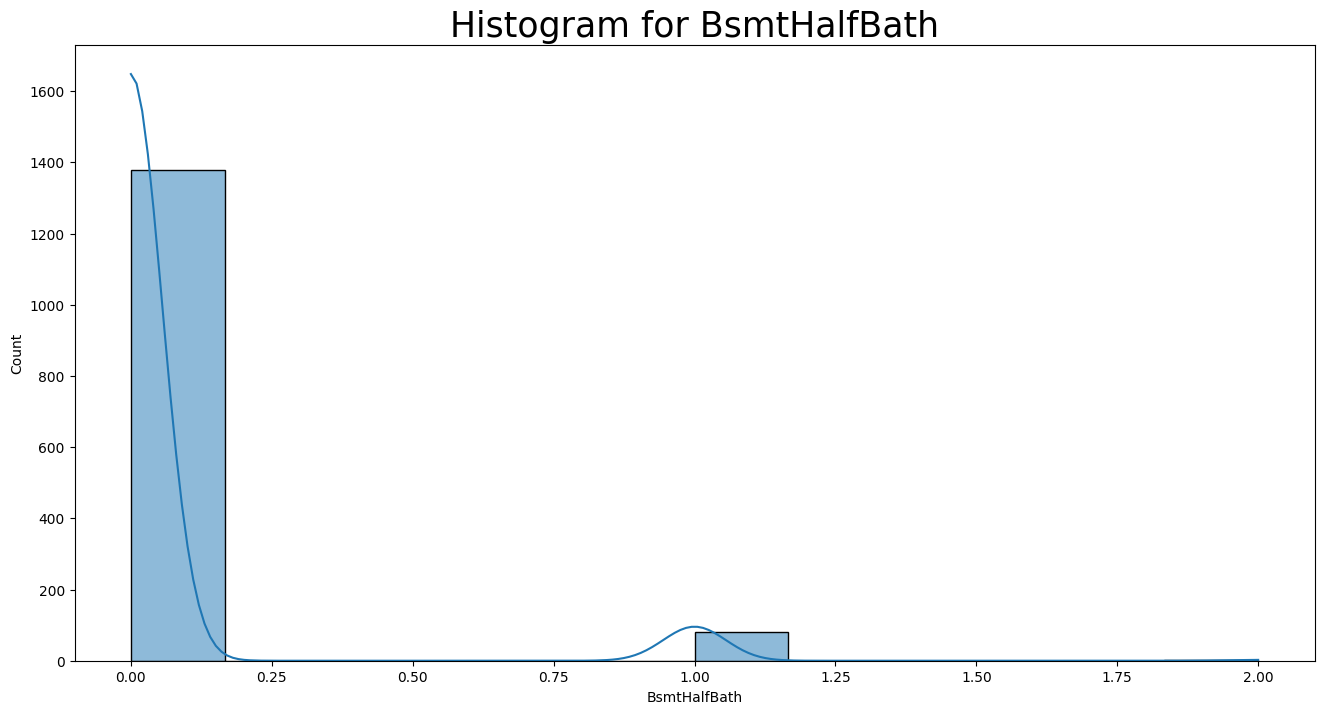

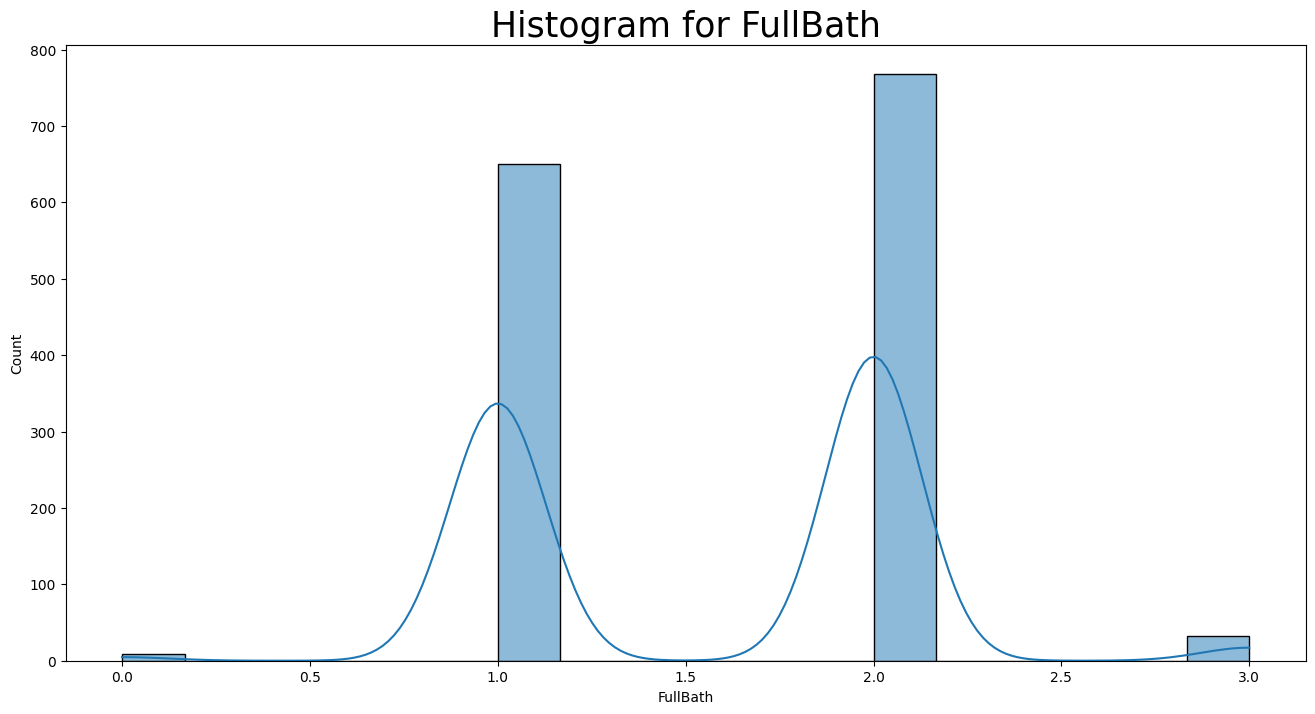

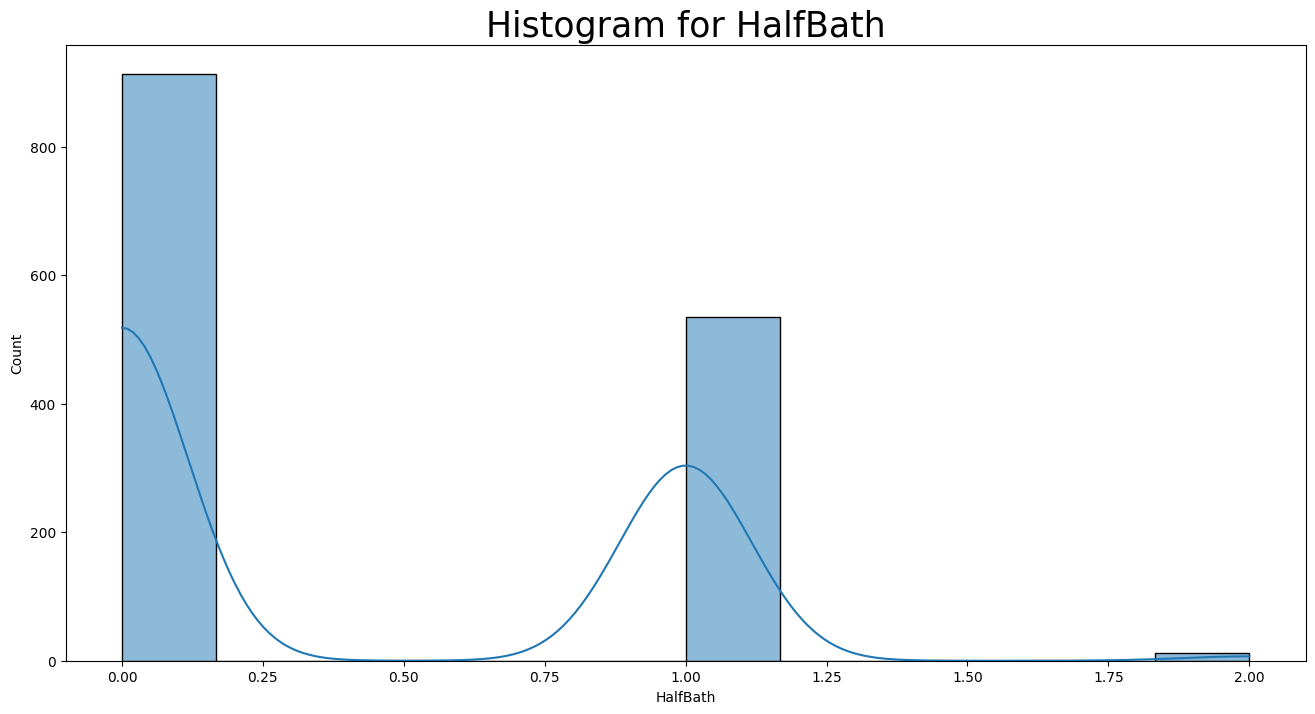

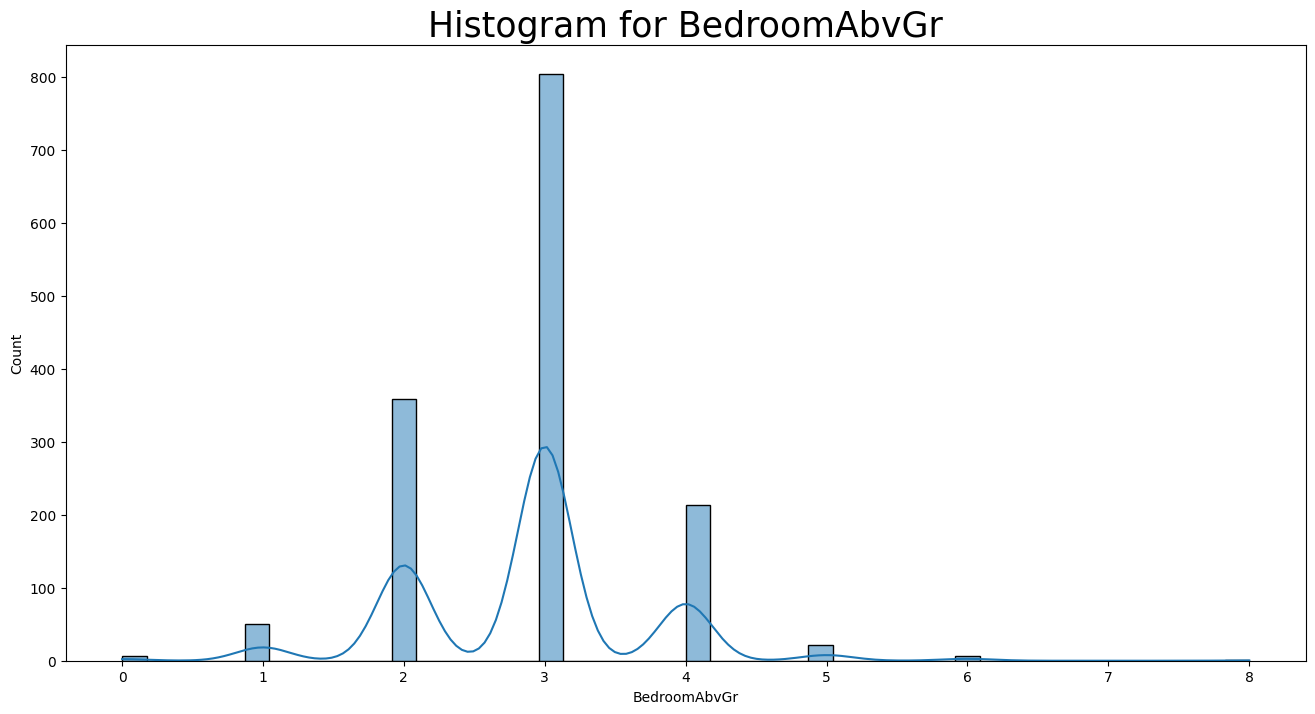

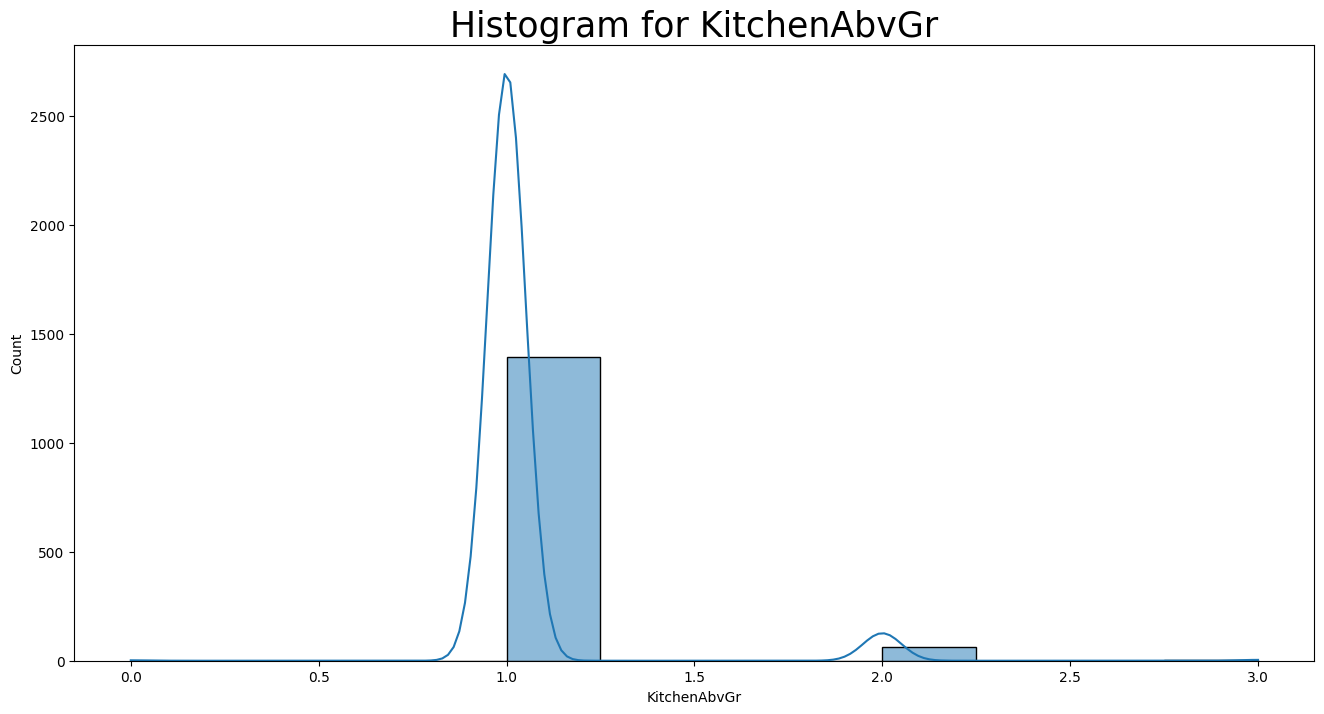

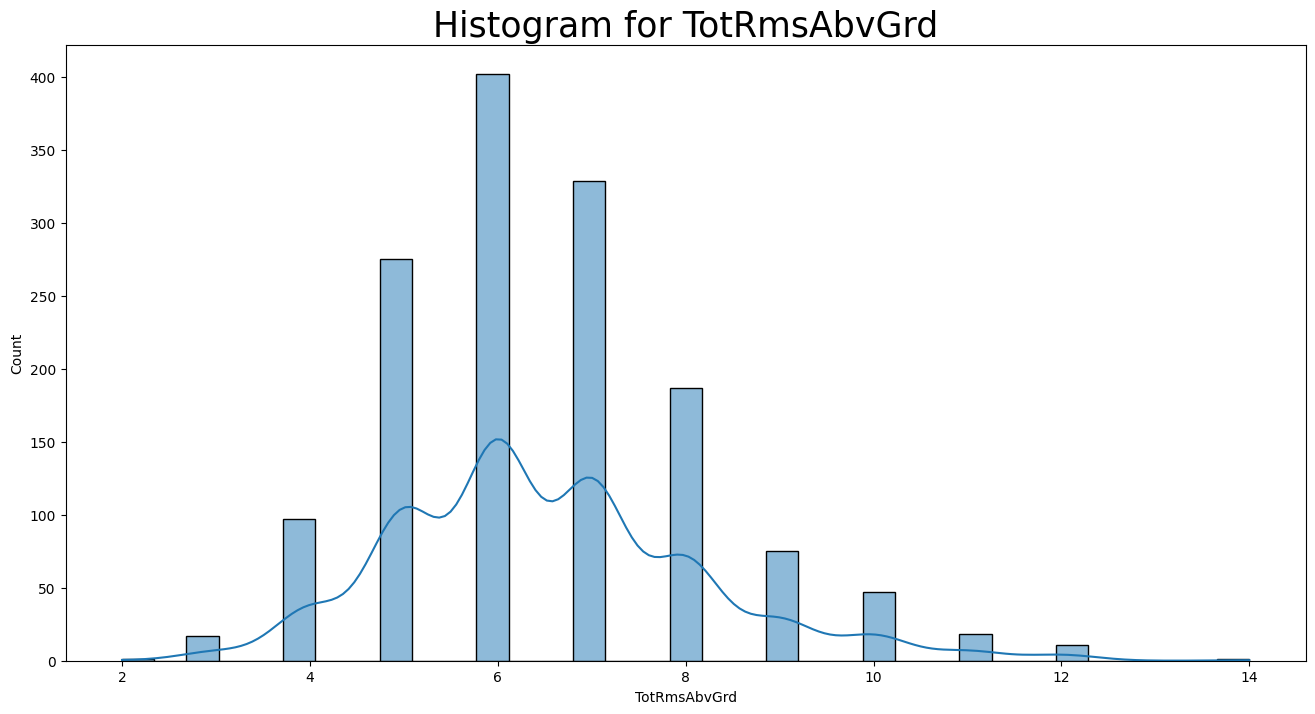

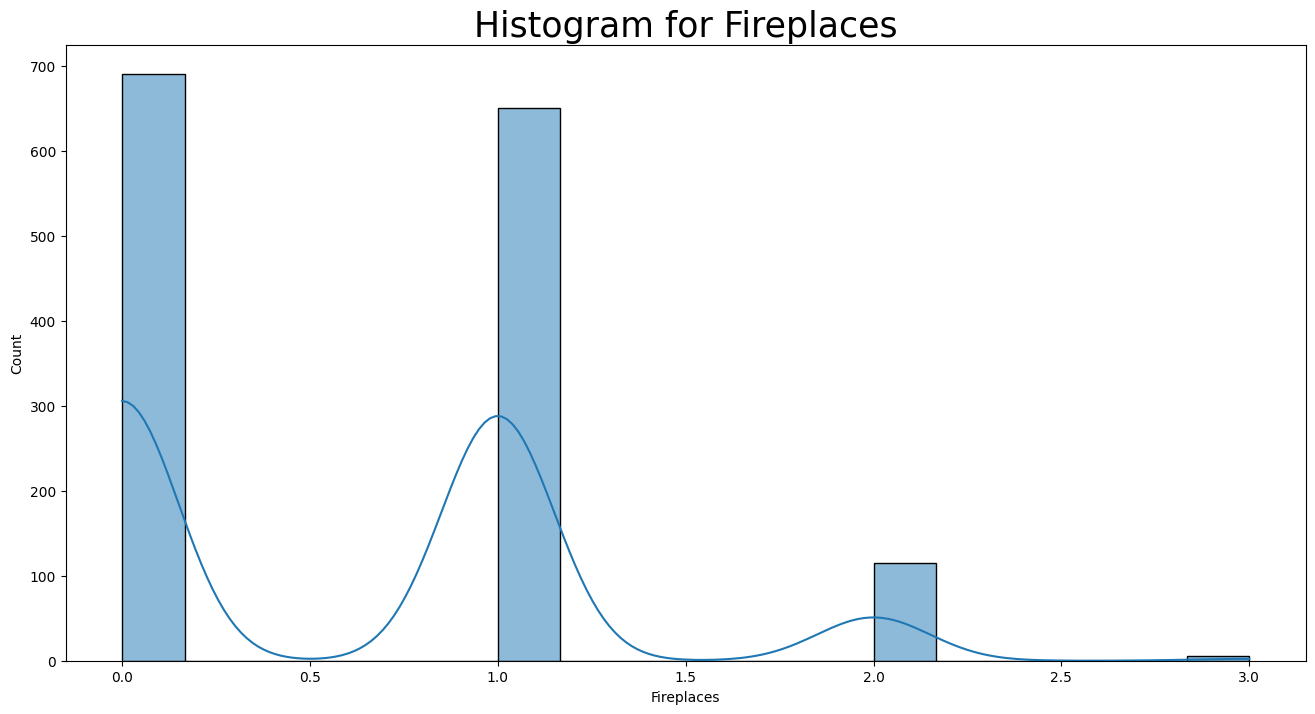

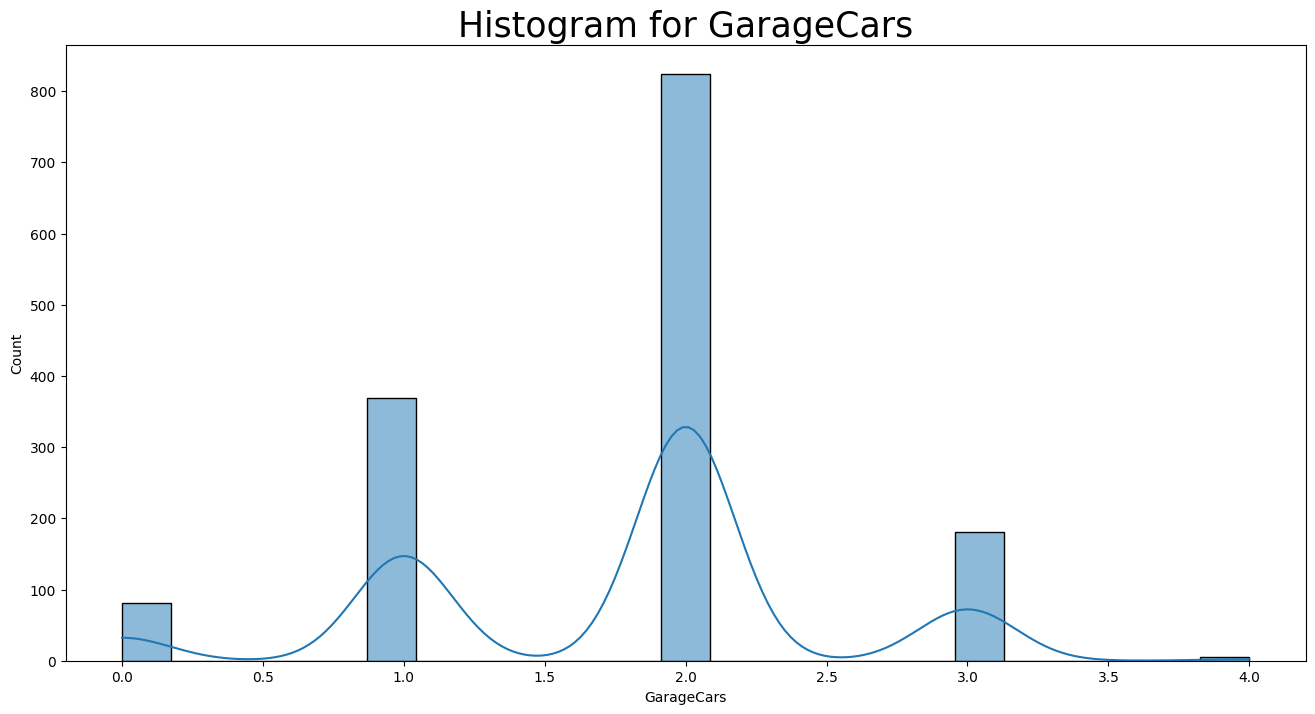

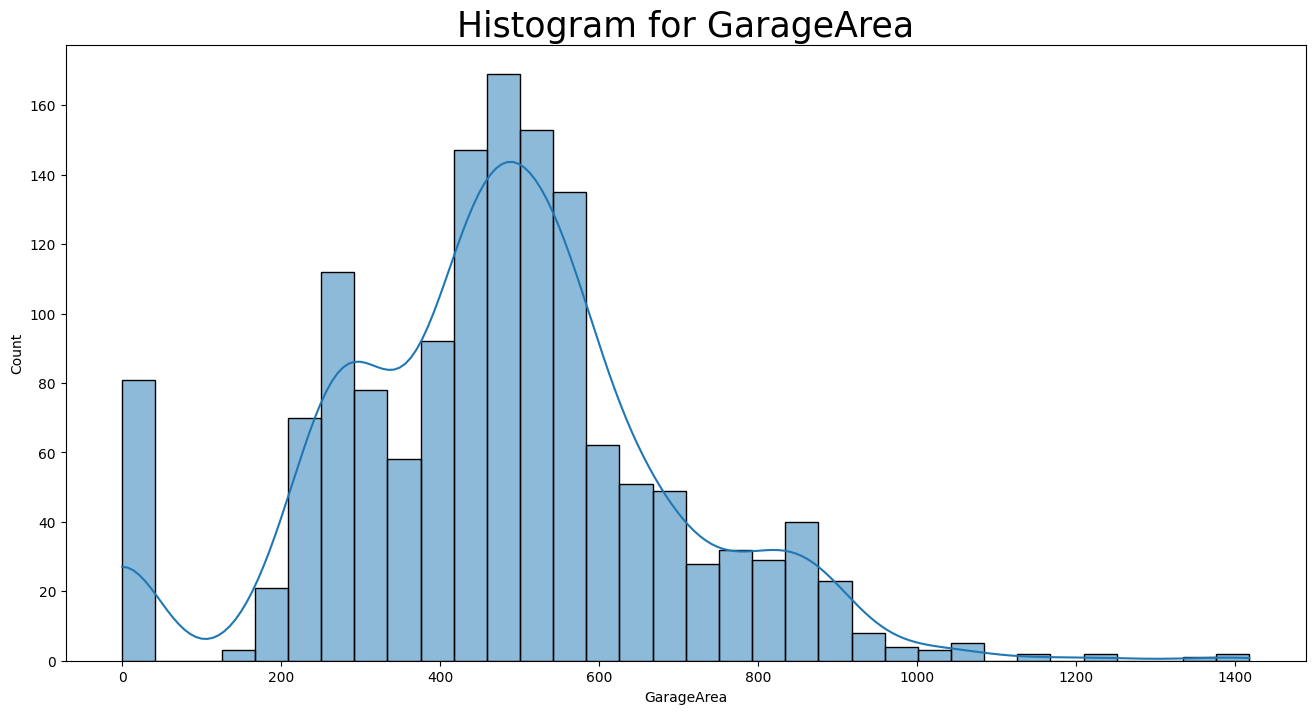

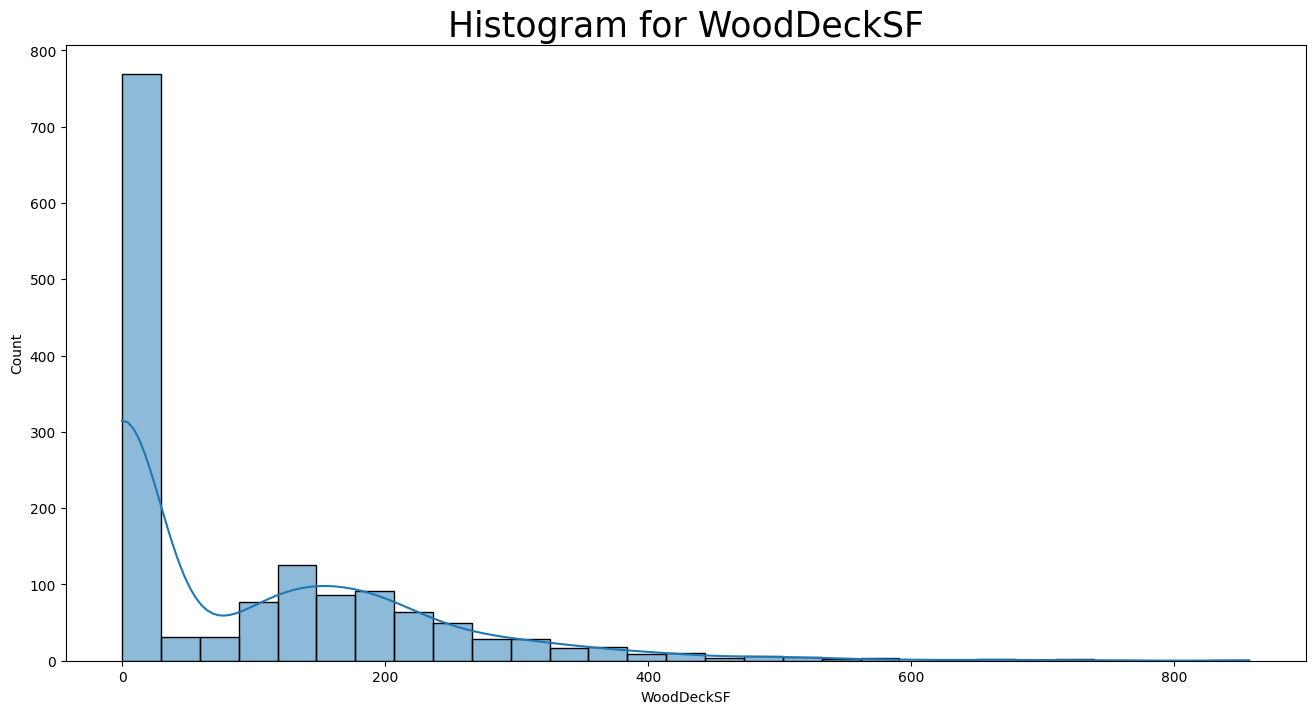

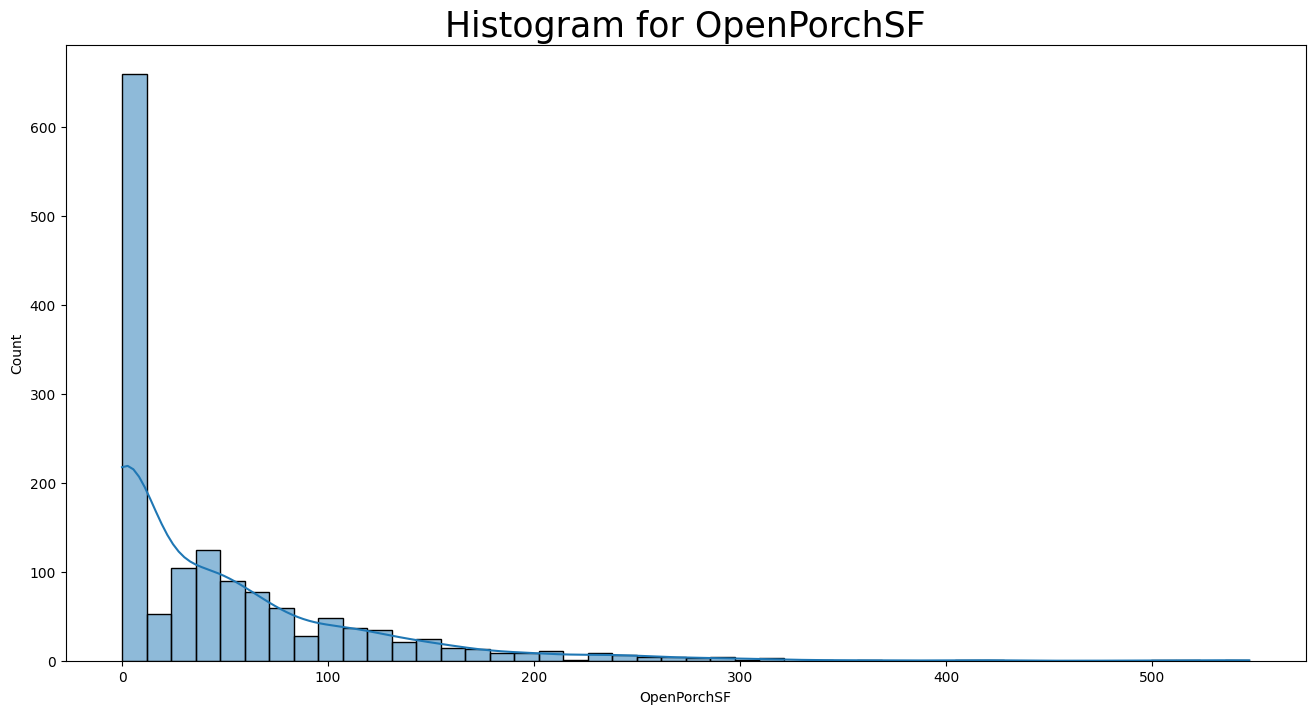

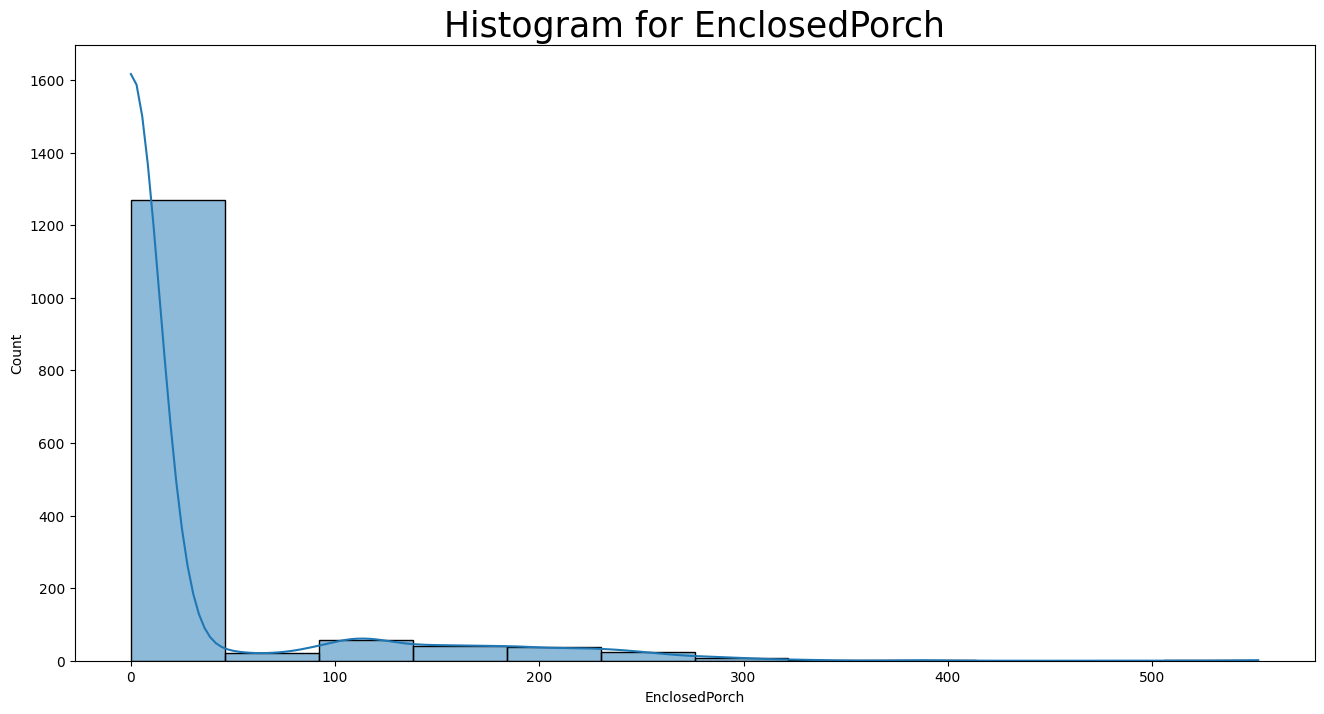

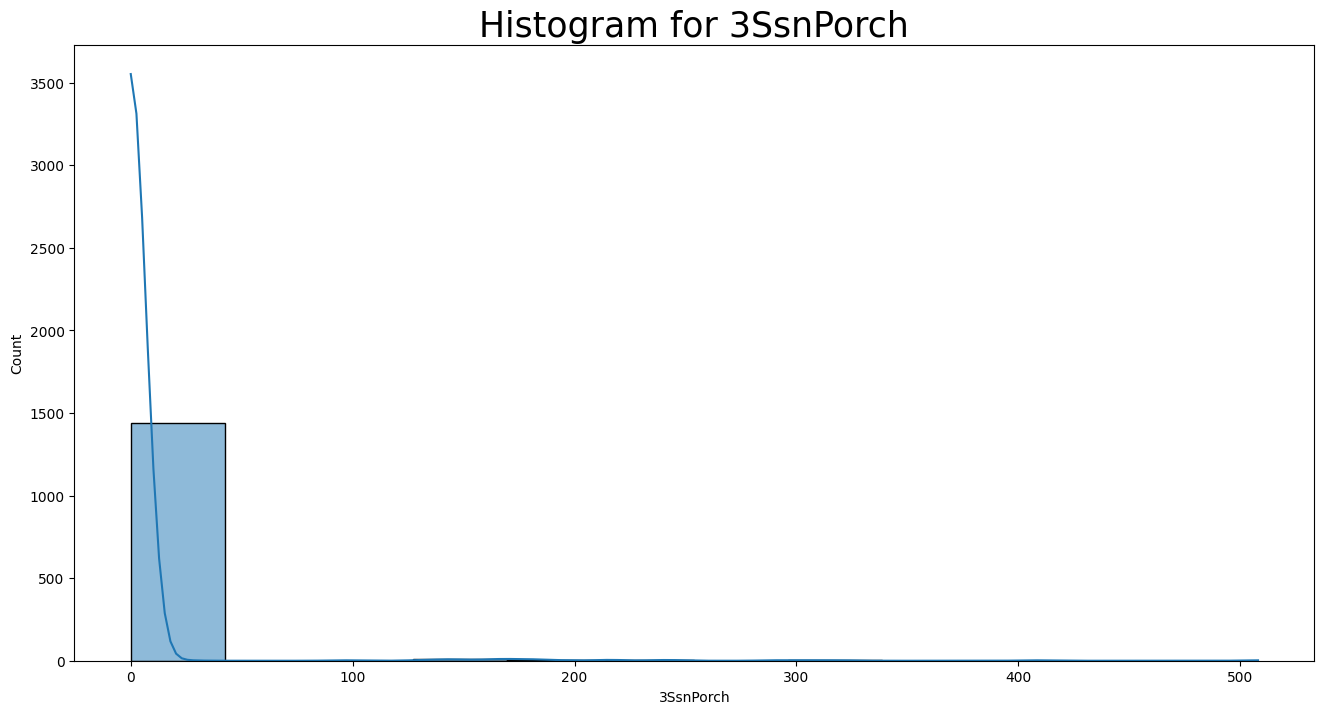

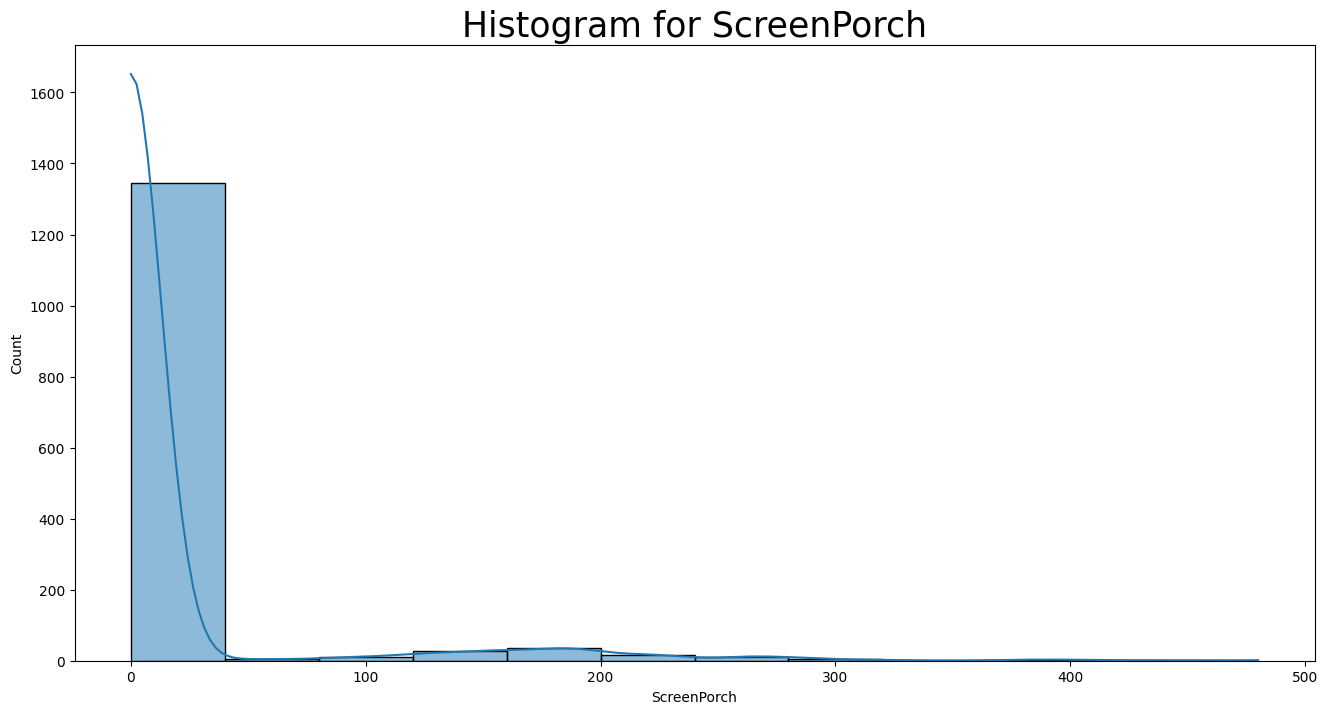

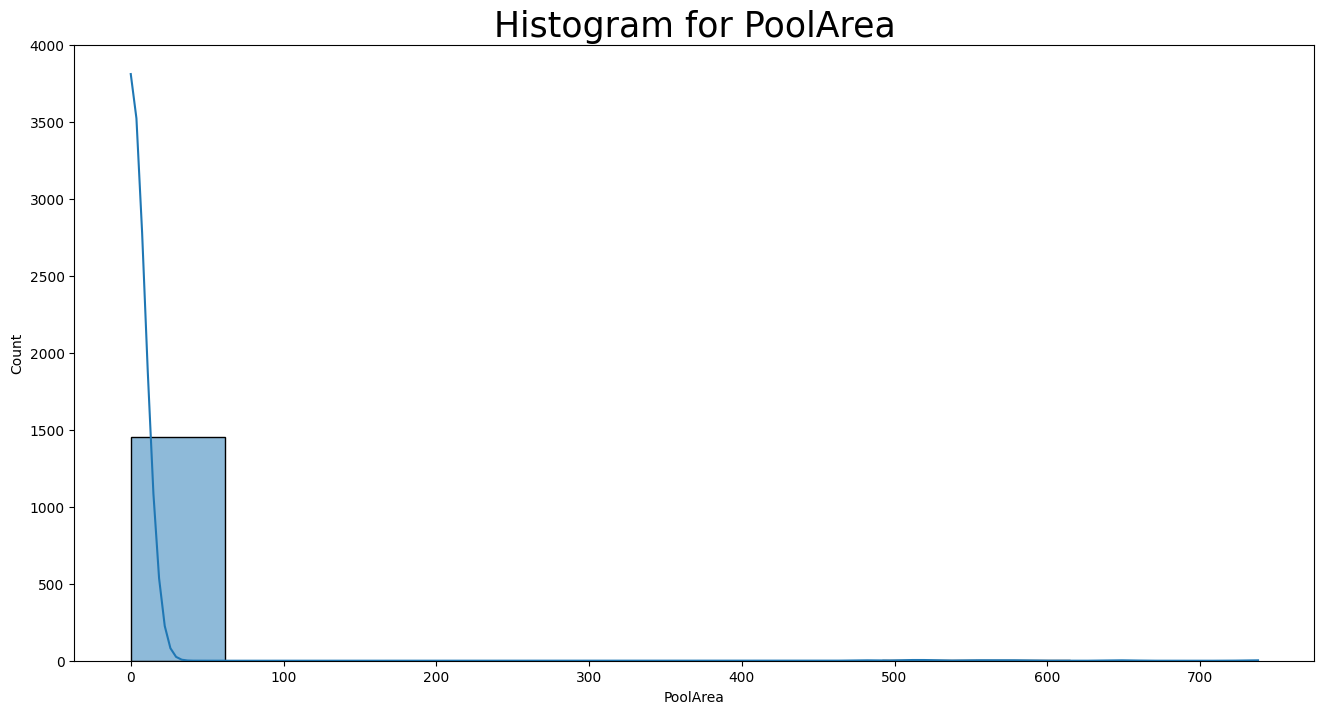

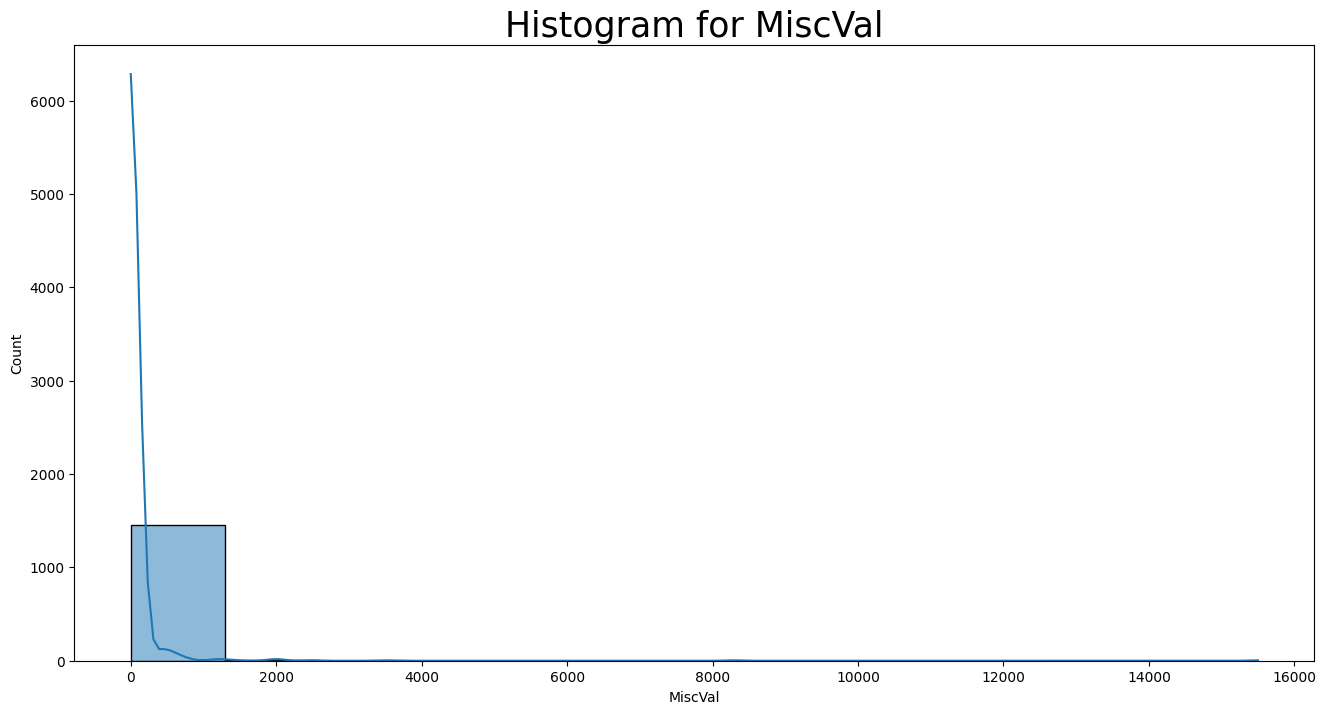

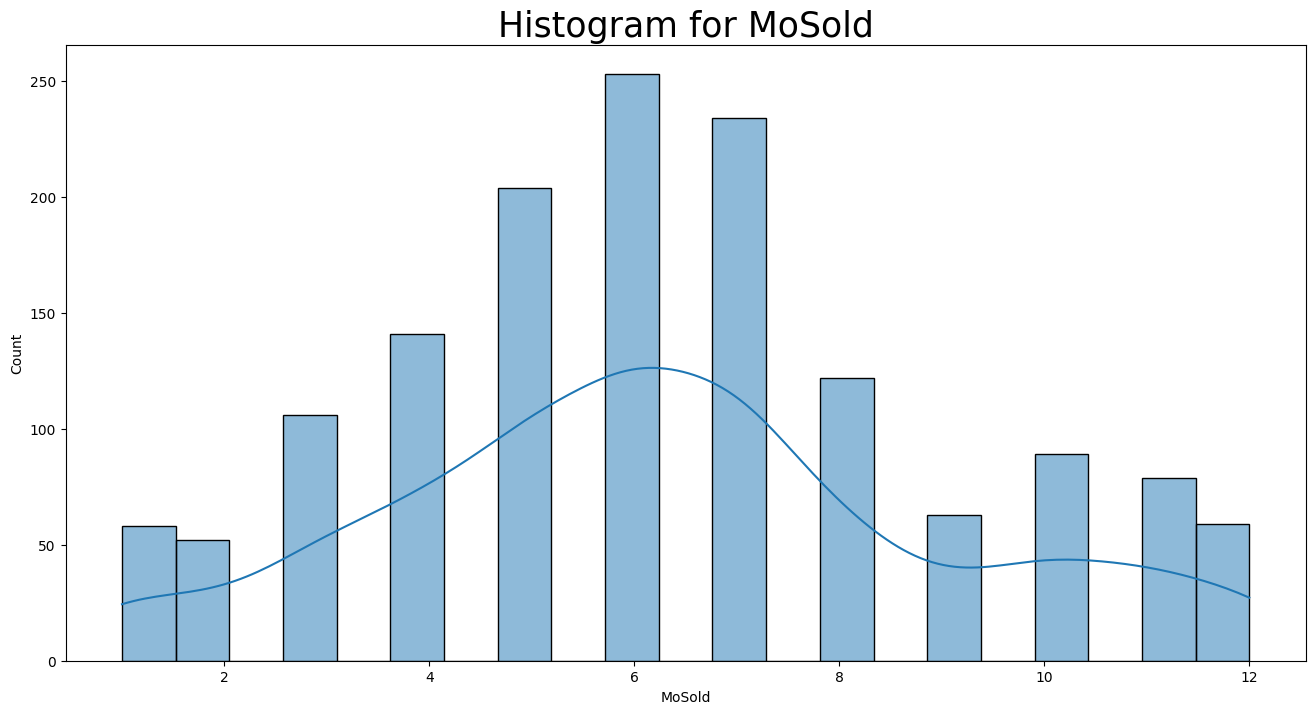

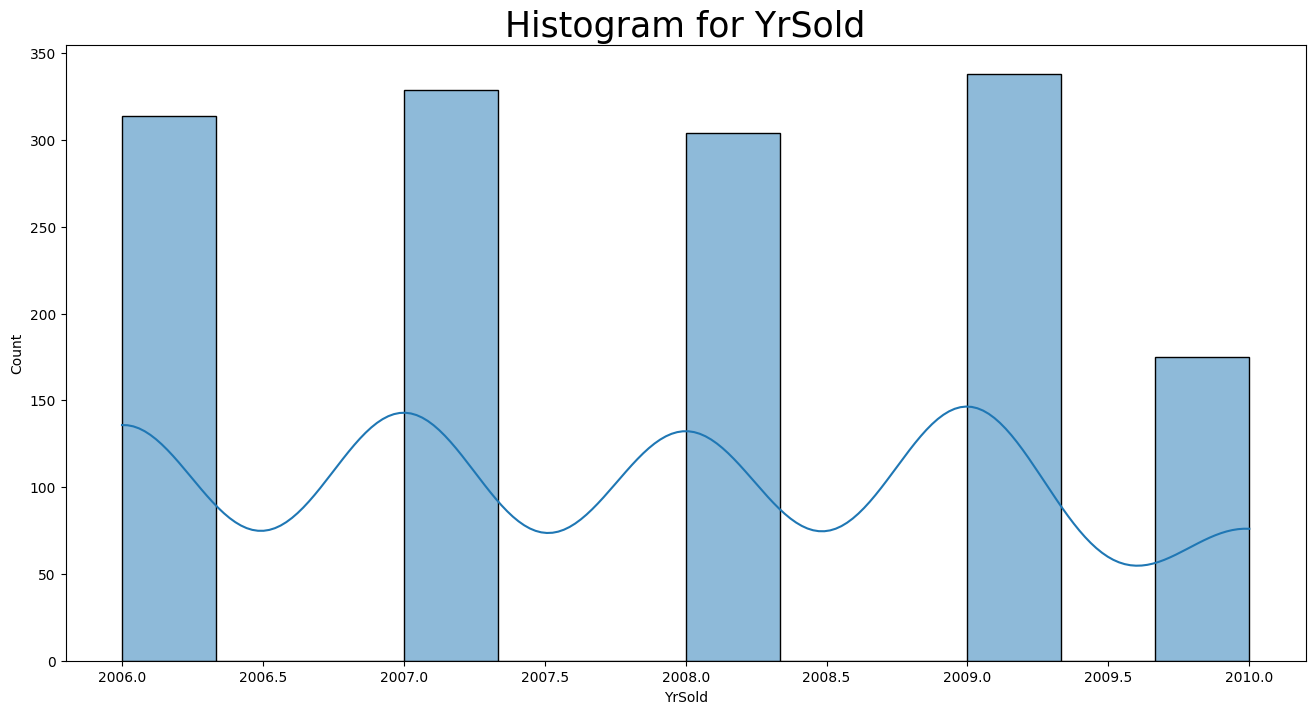

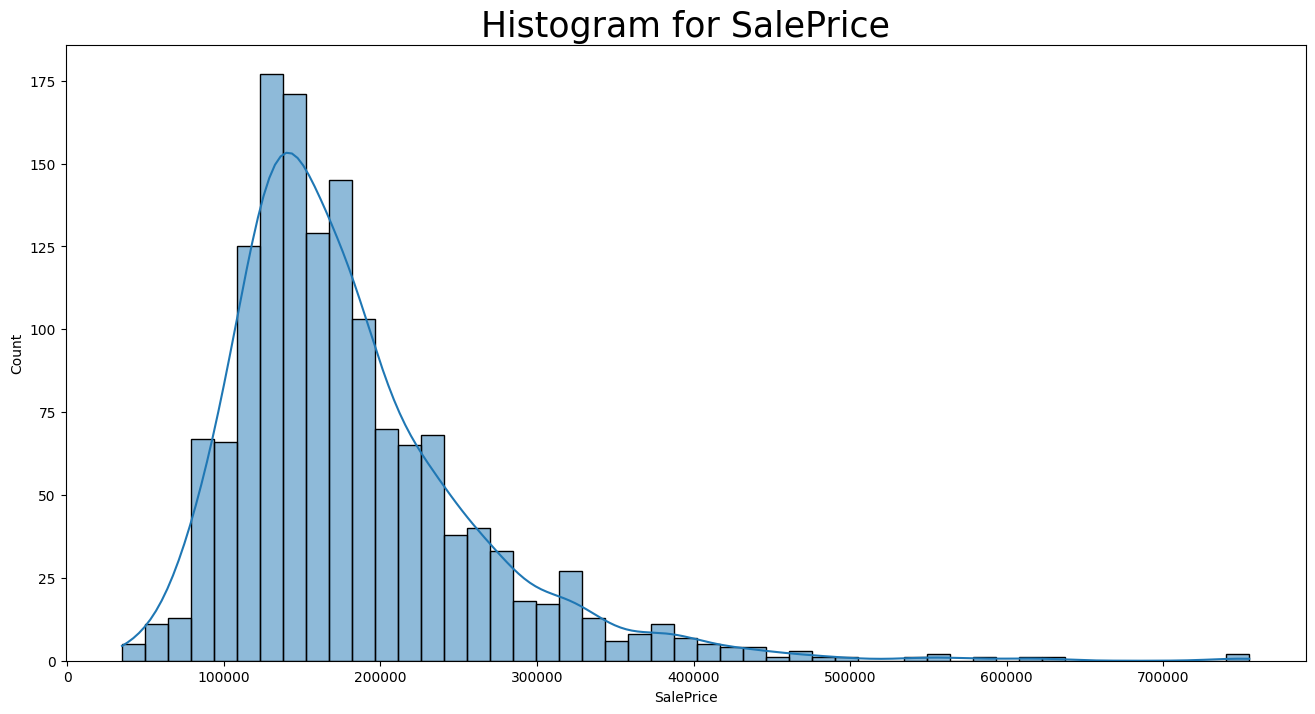

In [14]:
for i in conA:
    plt.figure(figsize=(16,8))
    sns.histplot(data=df, x=i, kde=True)
    plt.title(f'Histogram for {i}', fontsize=25)
    plt.show()

### Bivariate Analysis - Continuous vs Continuous features

#### (i) Scatterplot

#### (ii) Heatmap

In [16]:
df[conA].corr()

MSSubClass   LotArea  OverallQual  OverallCond  YearBuilt  \
MSSubClass       1.000000 -0.139781     0.032628    -0.059316   0.027850   
LotArea         -0.139781  1.000000     0.105806    -0.005636   0.014228   
OverallQual      0.032628  0.105806     1.000000    -0.091932   0.572323   
OverallCond     -0.059316 -0.005636    -0.091932     1.000000  -0.375983   
YearBuilt        0.027850  0.014228     0.572323    -0.375983   1.000000   
YearRemodAdd     0.040581  0.013788     0.550684     0.073741   0.592855   
BsmtFinSF1      -0.069836  0.214103     0.239666    -0.046231   0.249503   
BsmtFinSF2      -0.065649  0.111170    -0.059119     0.040229  -0.049107   
BsmtUnfSF       -0.140759 -0.002618     0.308159    -0.136841   0.149040   
TotalBsmtSF     -0.238518  0.260833     0.537808    -0.171098   0.391452   
1stFlrSF        -0.251758  0.299475     0.476224    -0.144203   0.281986   
2ndFlrSF         0.307886  0.050986     0.295493     0.028942   0.010308   
LowQualFinSF     0.046474  0.004779    -0.030429     0.025494  -0.183784   
GrLivArea        0.074853  0.263116     0.593007    -0.079686   0.199010   
BsmtFullBath     0.003491  0.158155     0.111098    -0.054942   0.187599   
BsmtHalfBath    -0.002333  0.048046    -0.040150     0.117821  -0.038162   
FullBath         0.131608  0.126031     0.550600    -0.194149   0.468271   
HalfBath         0.177354  0.014259     0.273458    -0.060769   0.242656   
BedroomAbvGr    -0.023438  0.119690     0.101676     0.012980  -0.070651   
KitchenAbvGr     0.281721 -0.017784    -0.183882    -0.087001  -0.174800   
TotRmsAbvGrd     0.040380  0.190015     0.427452    -0.057583   0.095589   
Fireplaces      -0.045569  0.271364     0.396765    -0.023820   0.147716   
GarageCars      -0.040110  0.154871     0.600671    -0.185758   0.537850   
GarageArea      -0.098672  0.180403     0.562022    -0.151521   0.478954   
WoodDeckSF      -0.012579  0.171698     0.238923    -0.003334   0.224880   
OpenPorchSF     -0.006100  0.084774     0.308819    -0.032589   0.188686   
EnclosedPorch   -0.012037 -0.018340    -0.113937     0.070356  -0.387268   
3SsnPorch       -0.043825  0.020423     0.030371     0.025504   0.031355   
ScreenPorch     -0.026030  0.043160     0.064886     0.054811  -0.050364   
PoolArea         0.008283  0.077672     0.065166    -0.001985   0.004950   
MiscVal         -0.007683  0.038068    -0.031406     0.068777  -0.034383   
MoSold          -0.013585  0.001205     0.070815    -0.003511   0.012398   
YrSold          -0.021407 -0.014261    -0.027347     0.043950  -0.013618   
SalePrice       -0.084284  0.263843     0.790982    -0.077856   0.522897   

               YearRemodAdd  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
MSSubClass         0.040581   -0.069836   -0.065649  -0.140759    -0.238518   
LotArea            0.013788    0.214103    0.111170  -0.002618     0.260833   
OverallQual        0.550684    0.239666   -0.059119   0.308159     0.537808   
OverallCond        0.073741   -0.046231    0.040229  -0.136841    -0.171098   
YearBuilt          0.592855    0.249503   -0.049107   0.149040     0.391452   
YearRemodAdd       1.000000    0.128451   -0.067759   0.181133     0.291066   
BsmtFinSF1         0.128451    1.000000   -0.050117  -0.495251     0.522396   
BsmtFinSF2        -0.067759   -0.050117    1.000000  -0.209294     0.104810   
BsmtUnfSF          0.181133   -0.495251   -0.209294   1.000000     0.415360   
TotalBsmtSF        0.291066    0.522396    0.104810   0.415360     1.000000   
1stFlrSF           0.240379    0.445863    0.097117   0.317987     0.819530   
2ndFlrSF           0.140024   -0.137079   -0.099260   0.004469    -0.174512   
LowQualFinSF      -0.062419   -0.064503    0.014807   0.028167    -0.033245   
GrLivArea          0.287389    0.208171   -0.009640   0.240257     0.454868   
BsmtFullBath       0.119470    0.649212    0.158678  -0.422900     0.307351   
BsmtHalfBath      -0.012337    0.067418    0.070948  -0.095804    -0.000315   
FullBath   

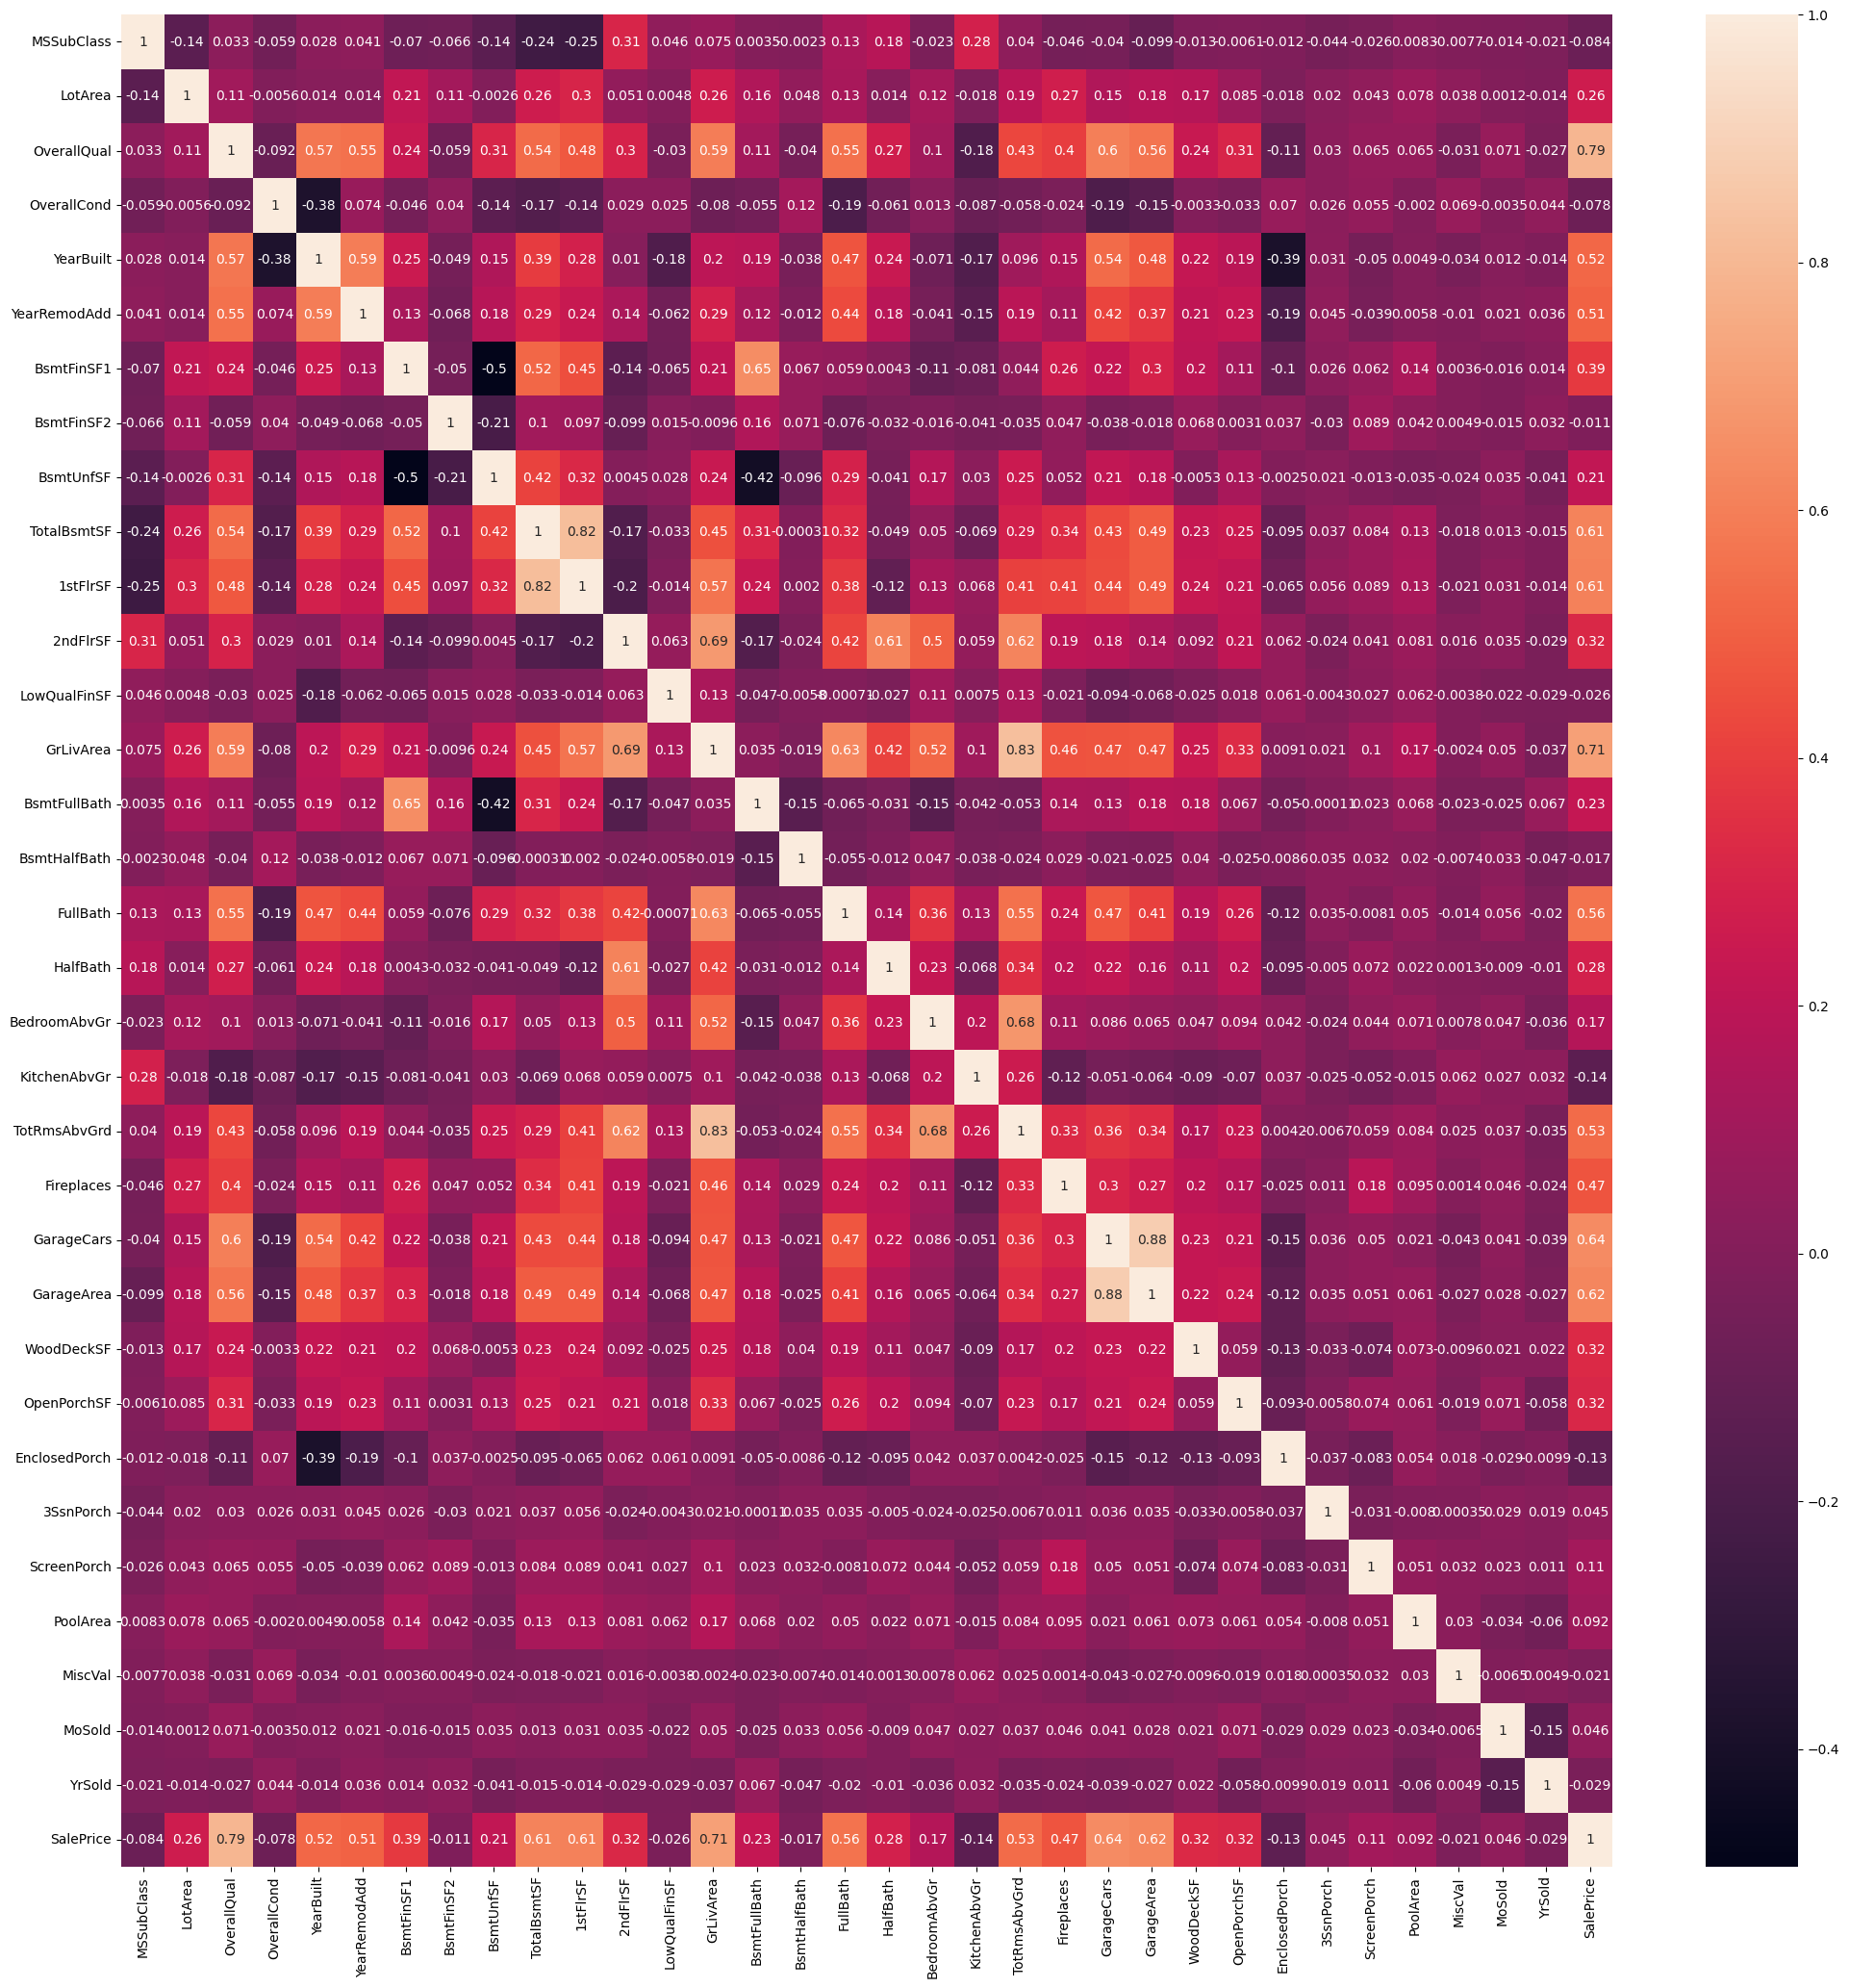

In [19]:
plt.figure(figsize=(25,25))
sns.heatmap(df[conA].corr(), annot=True)
plt.show()

### Bivariate Analysis - Categorical vs Continuous features - Boxplot

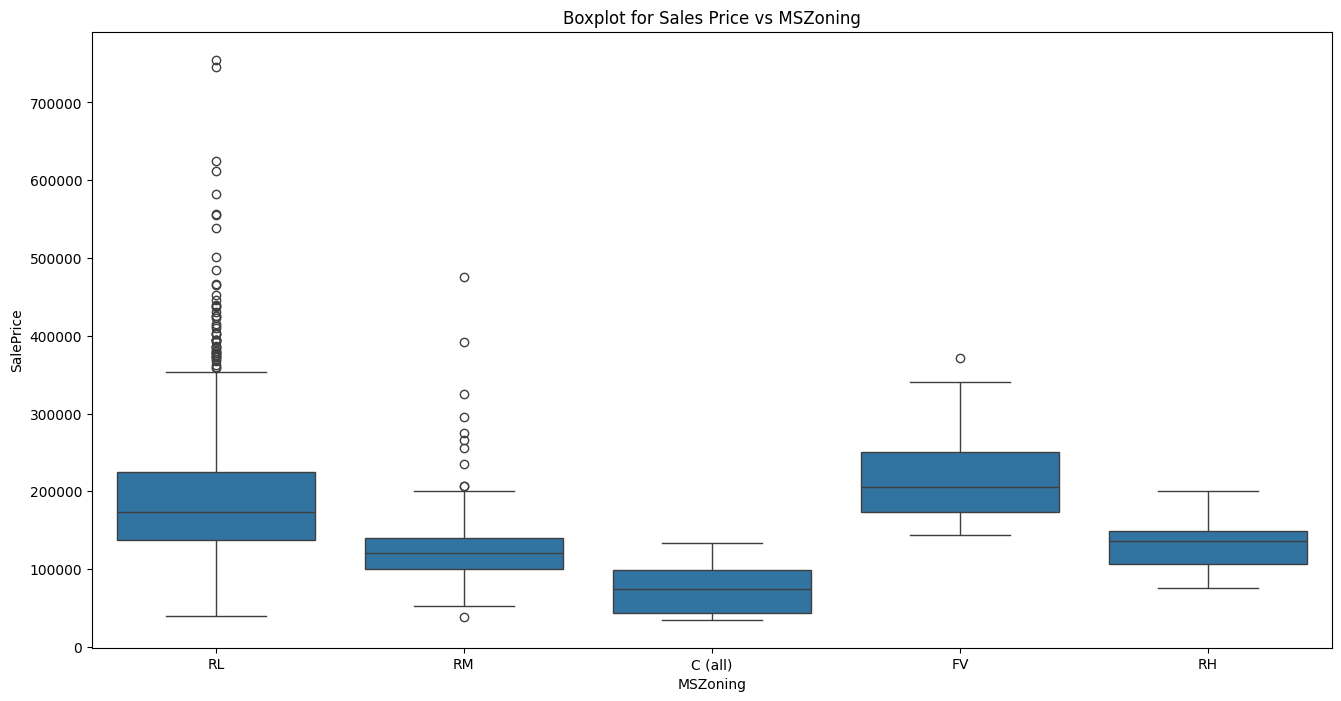

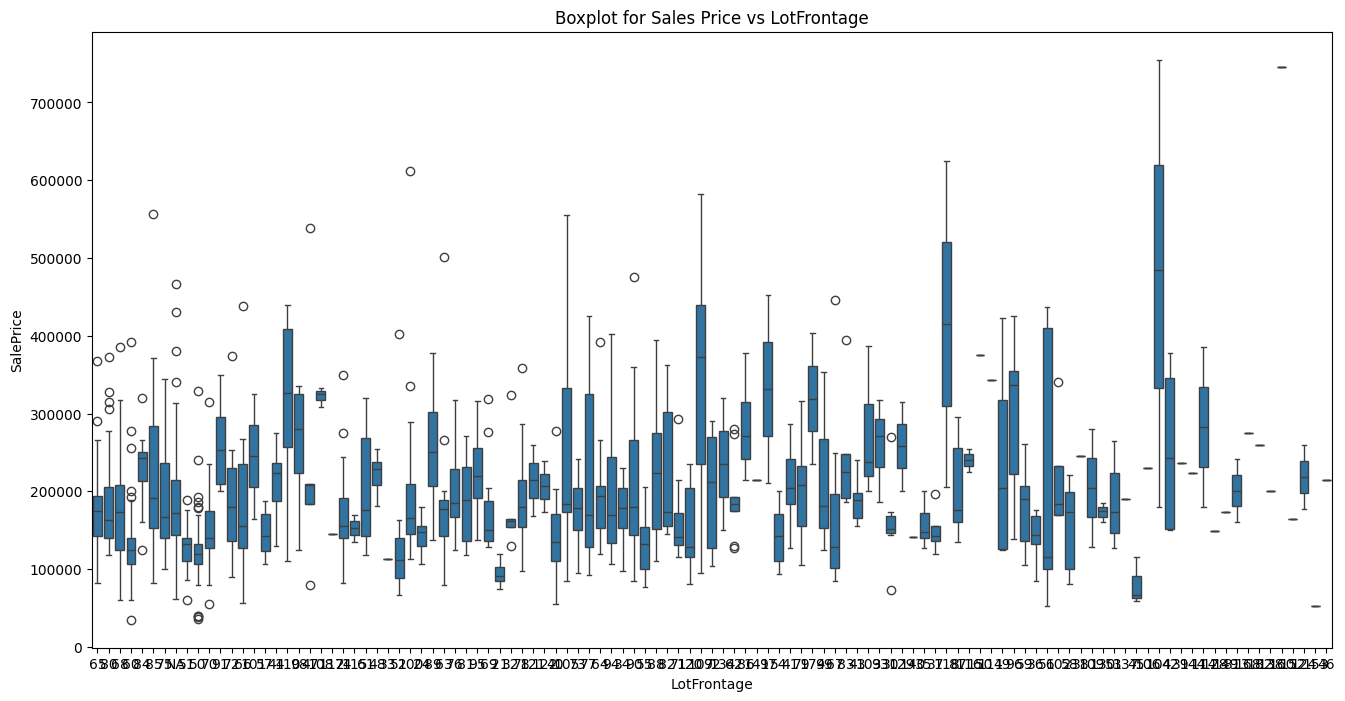

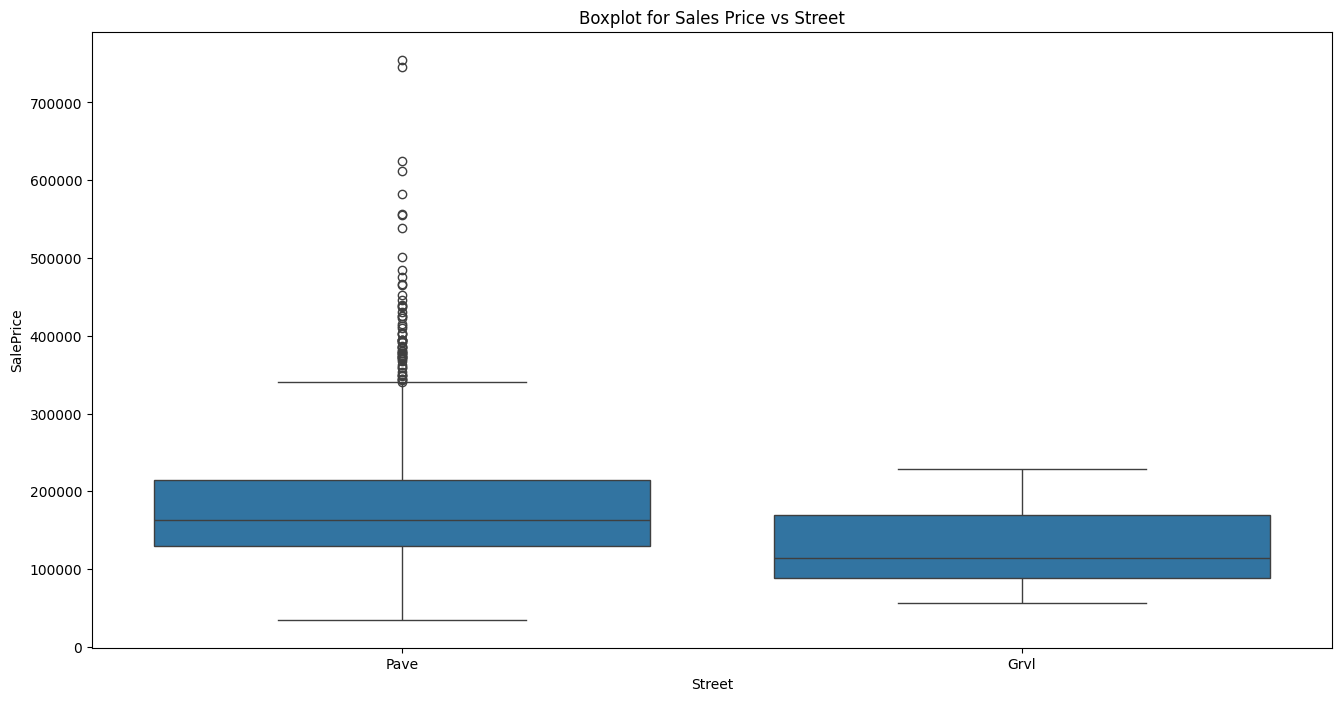

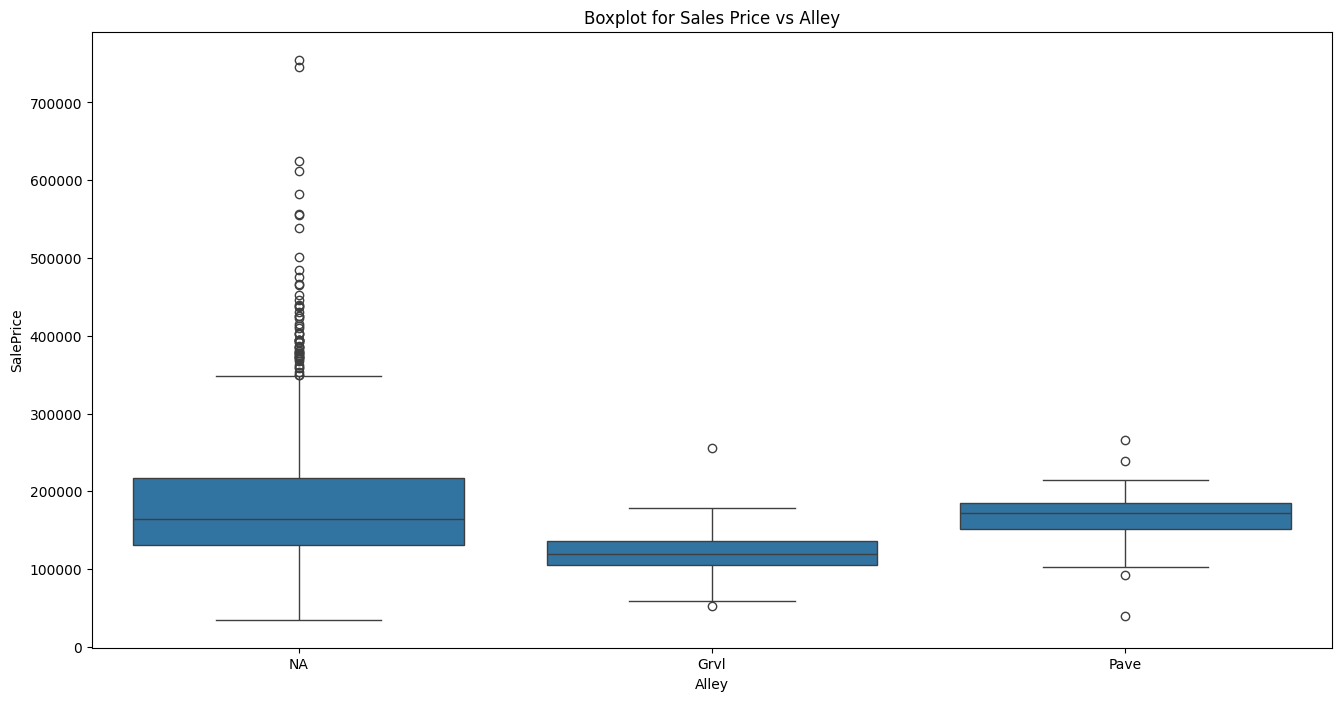

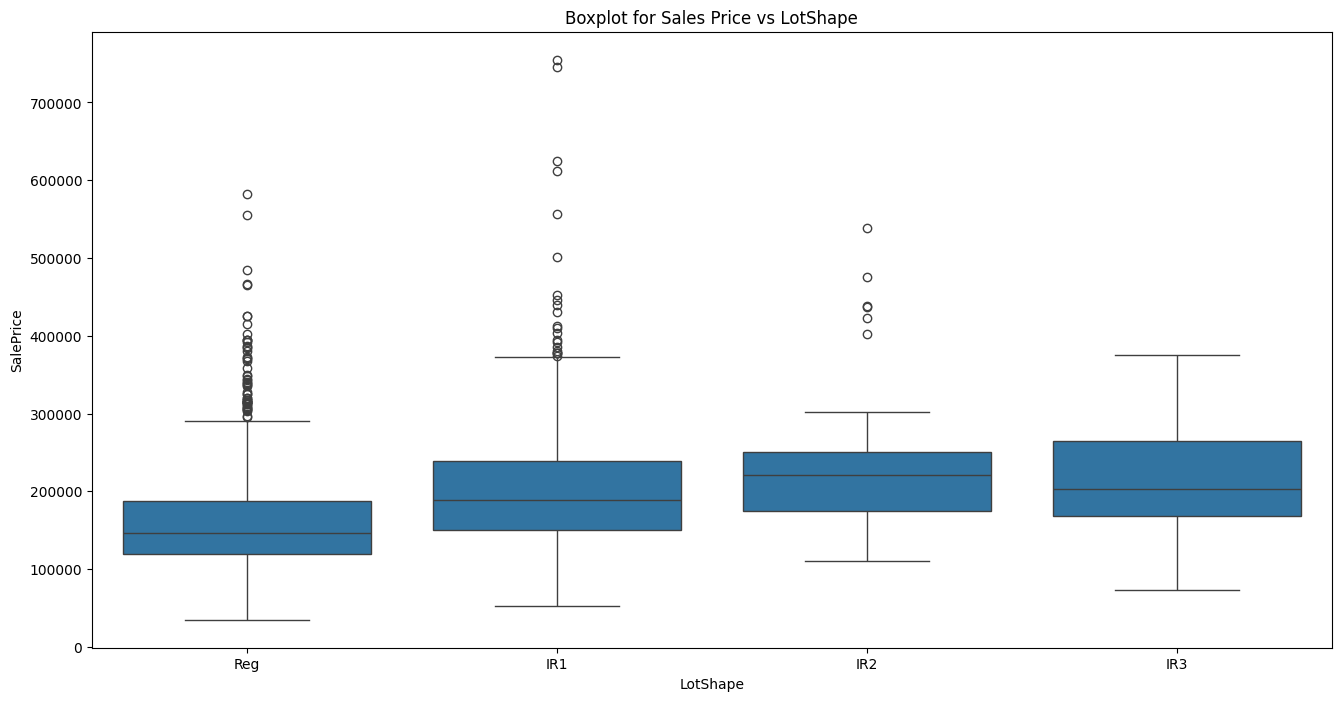

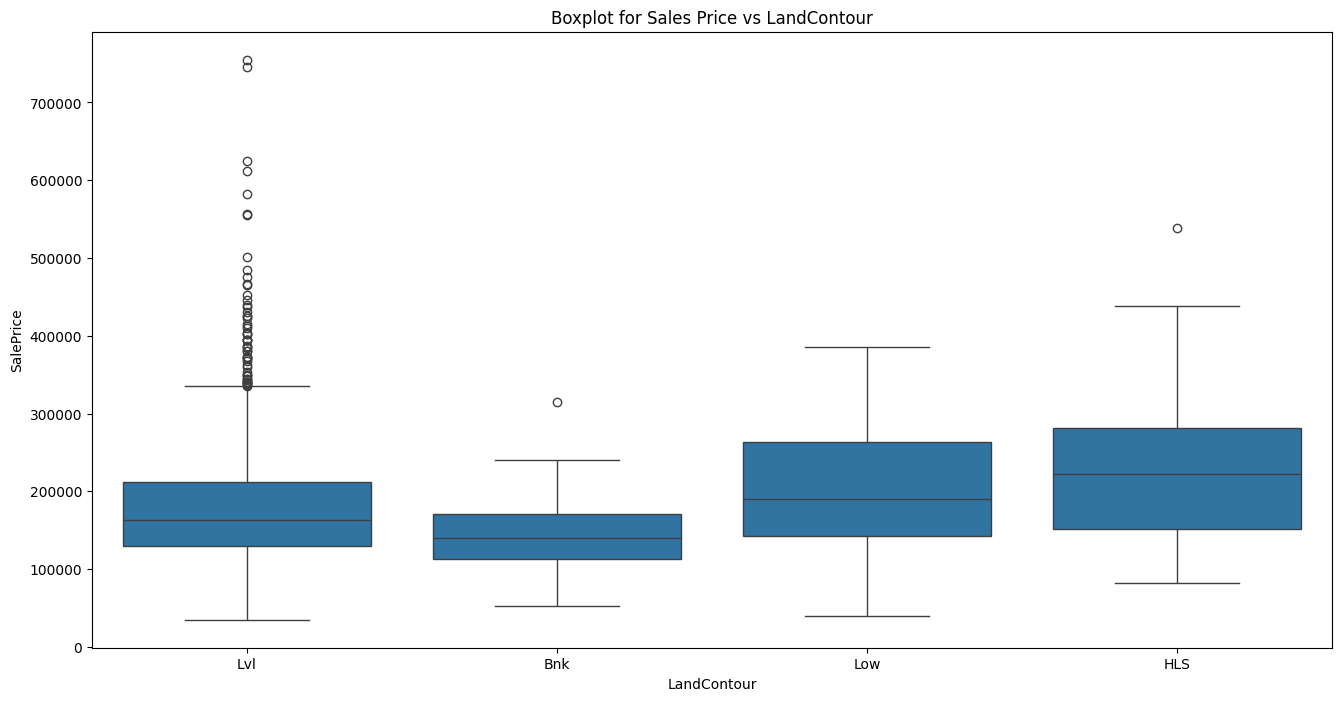

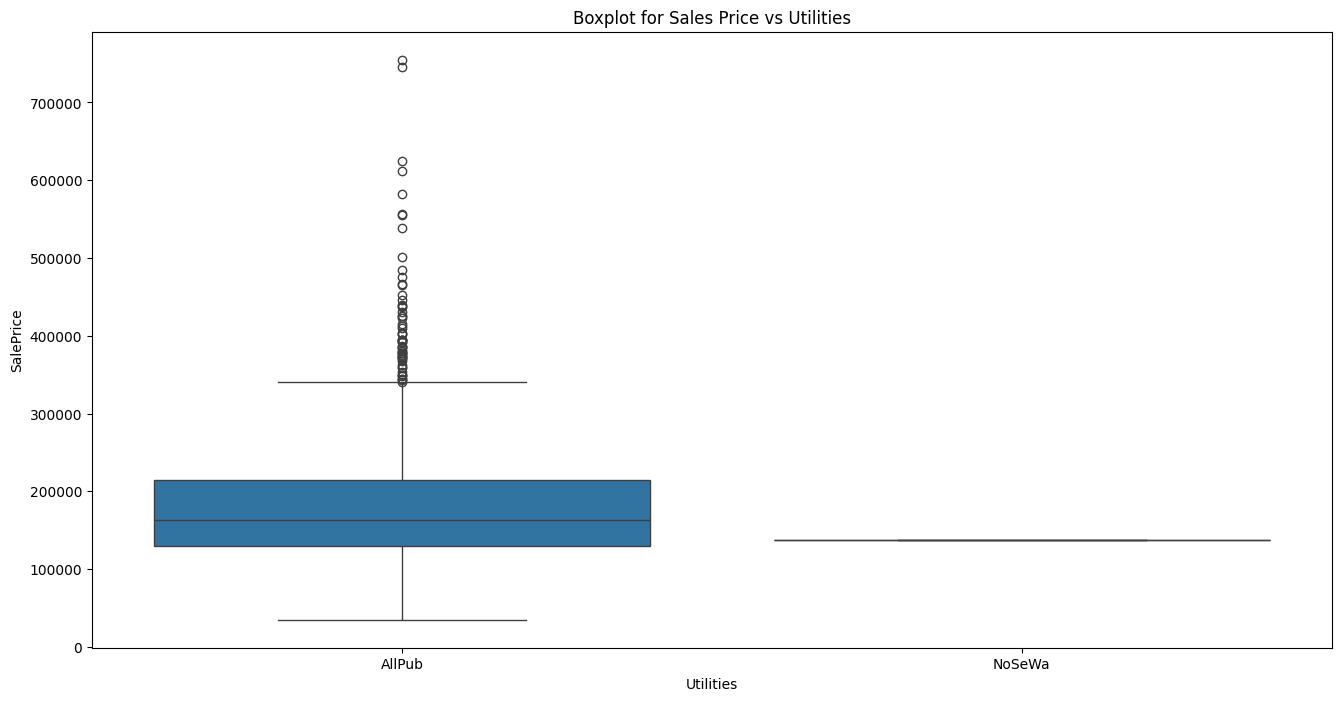

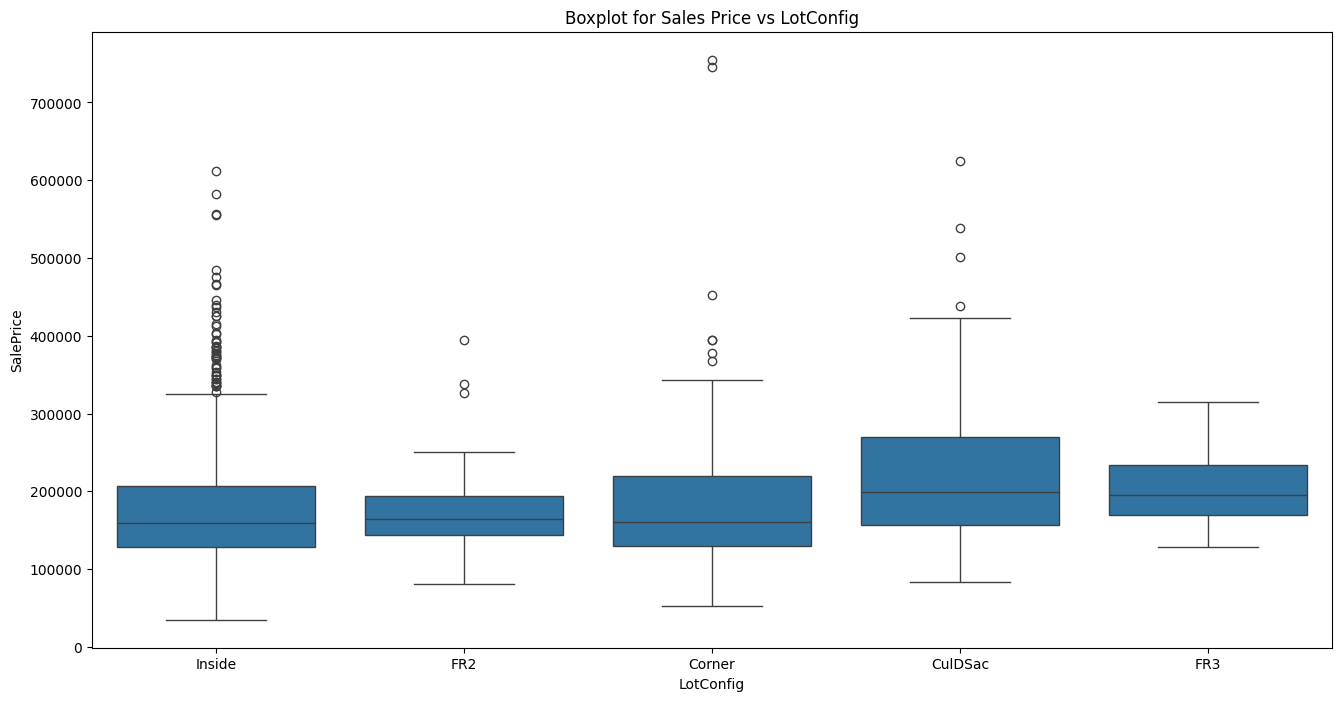

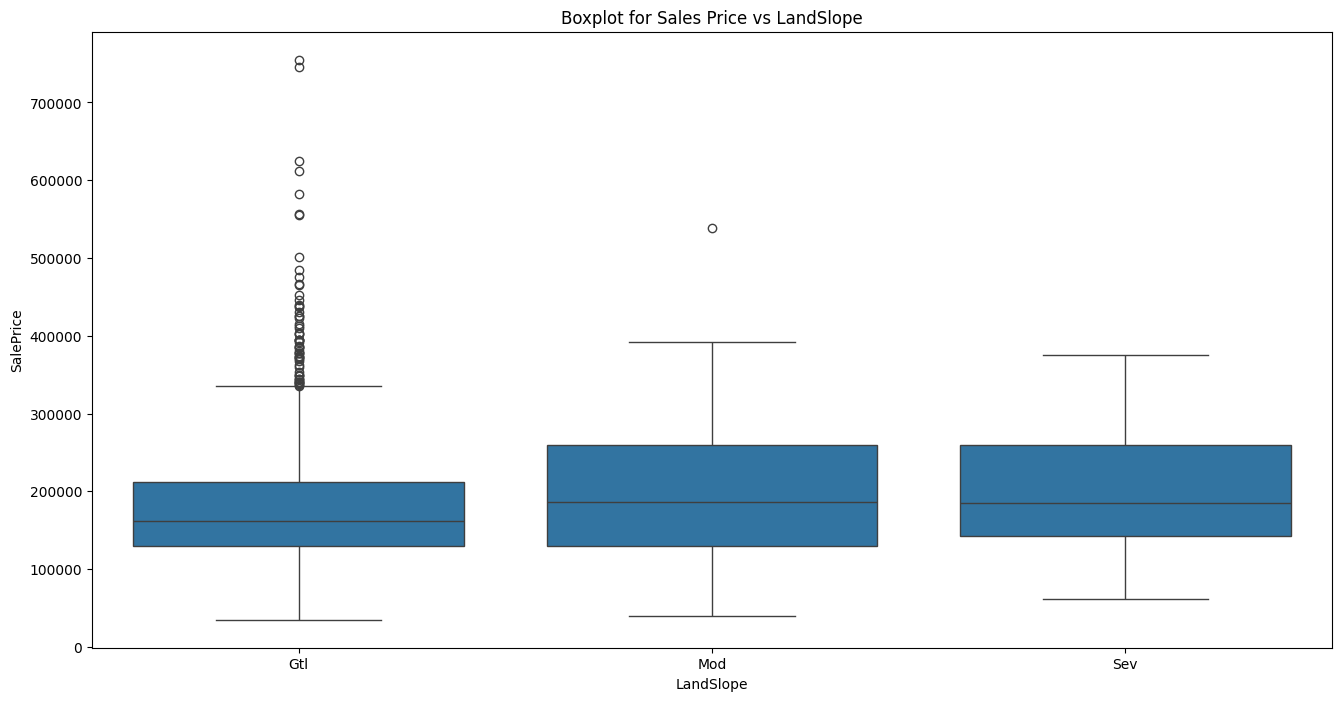

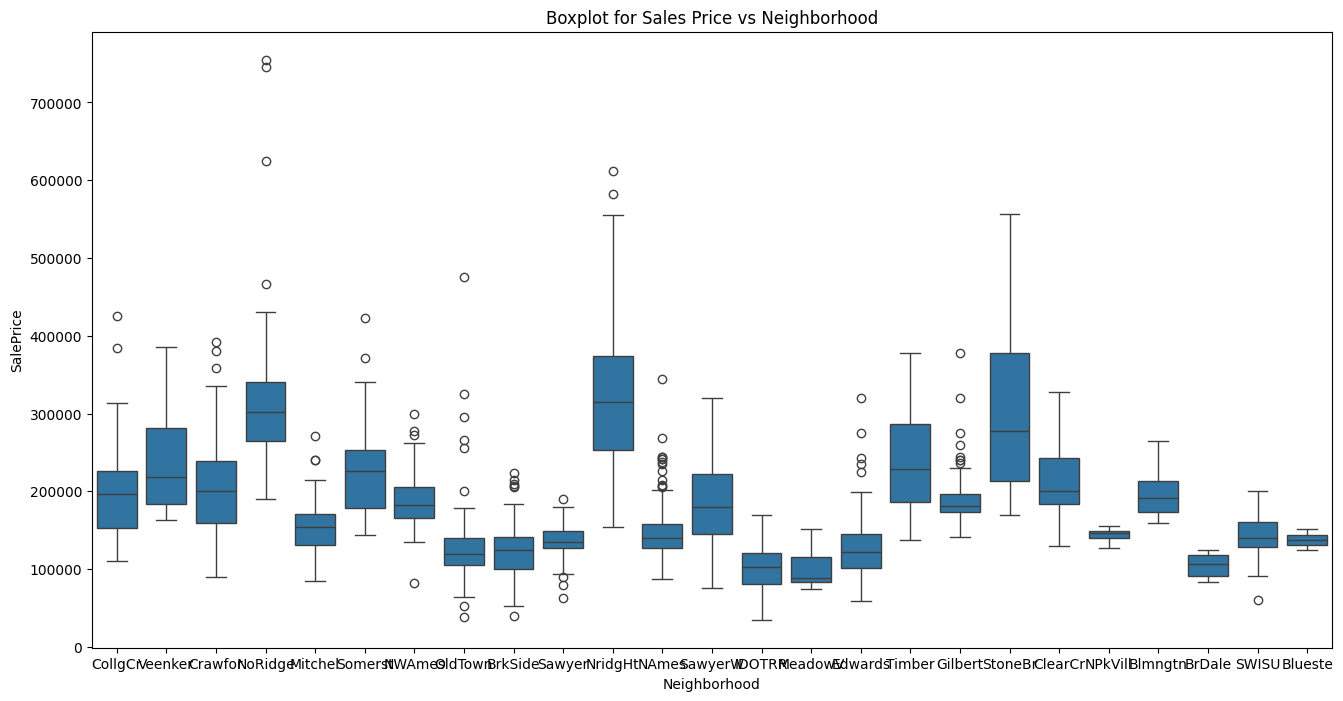

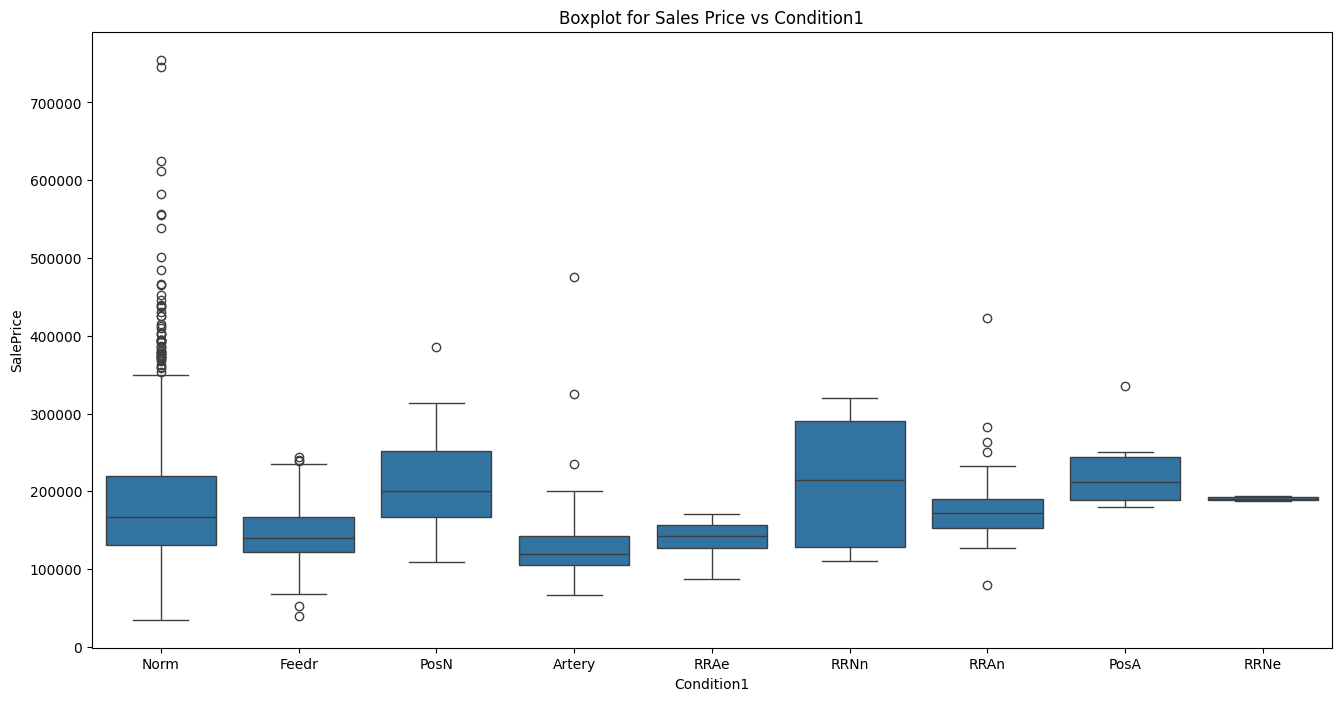

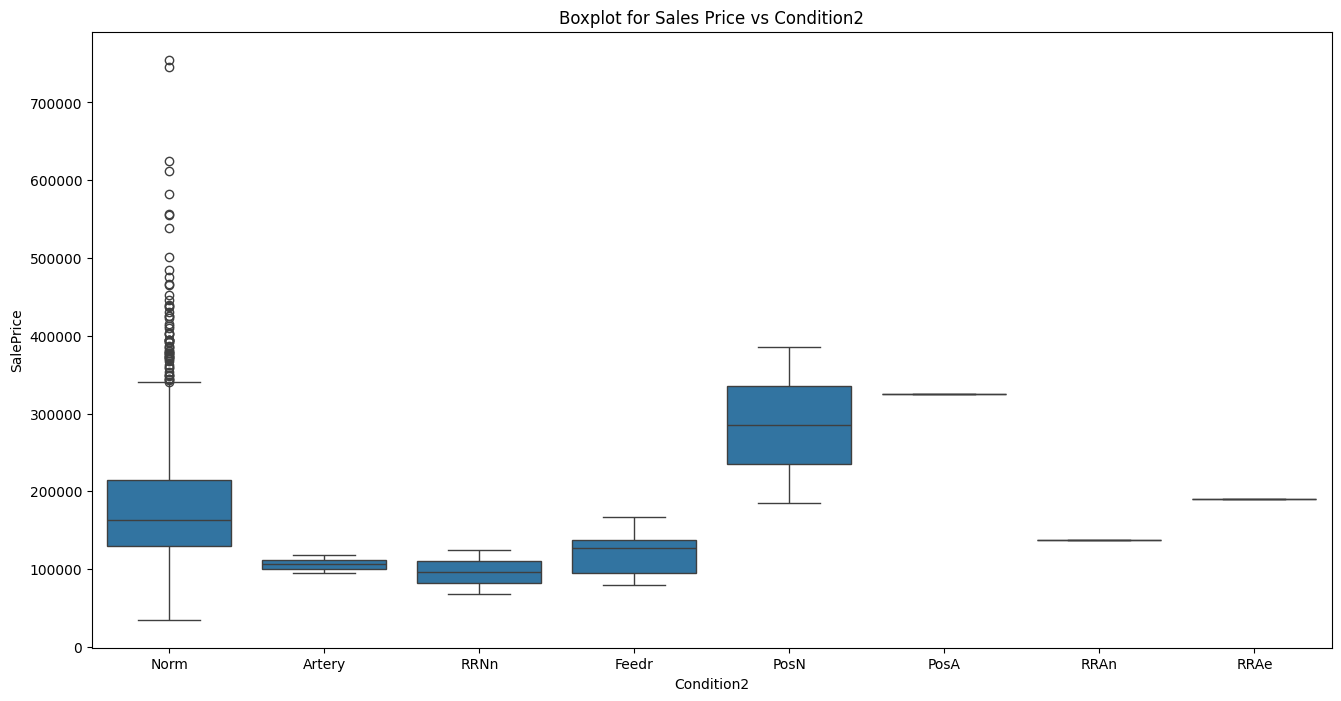

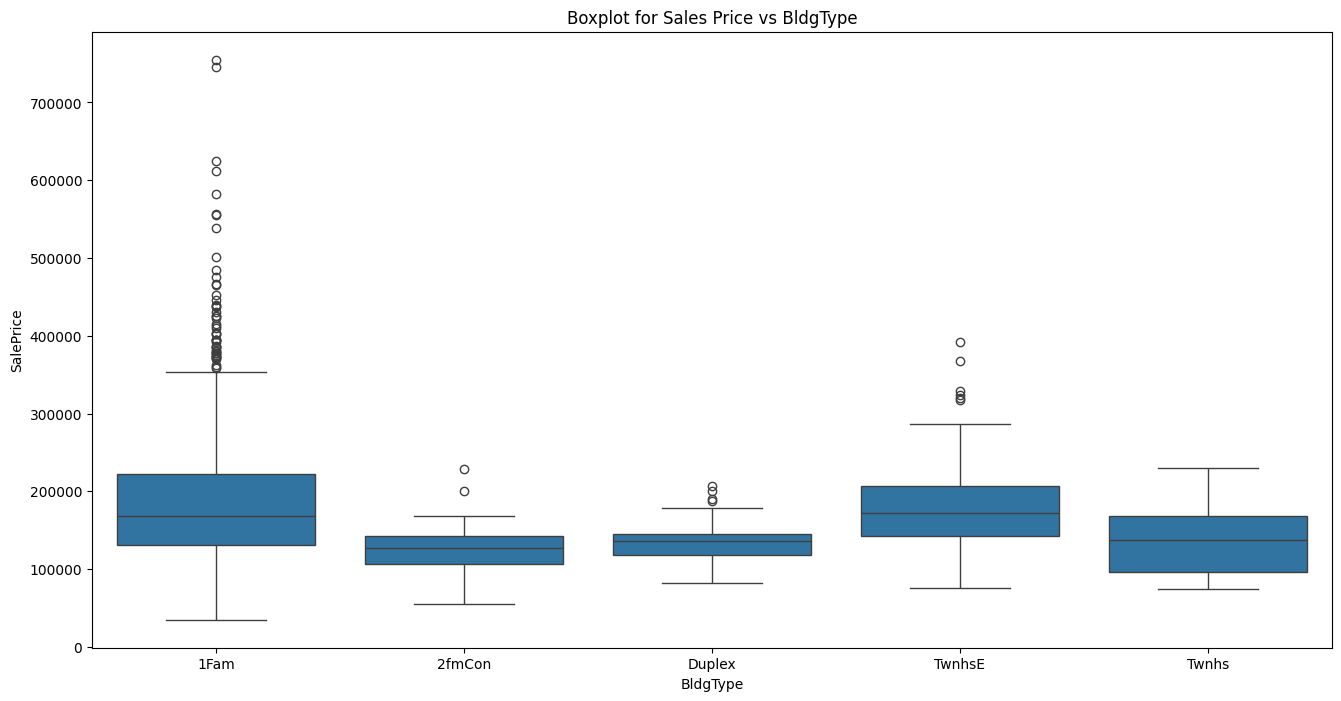

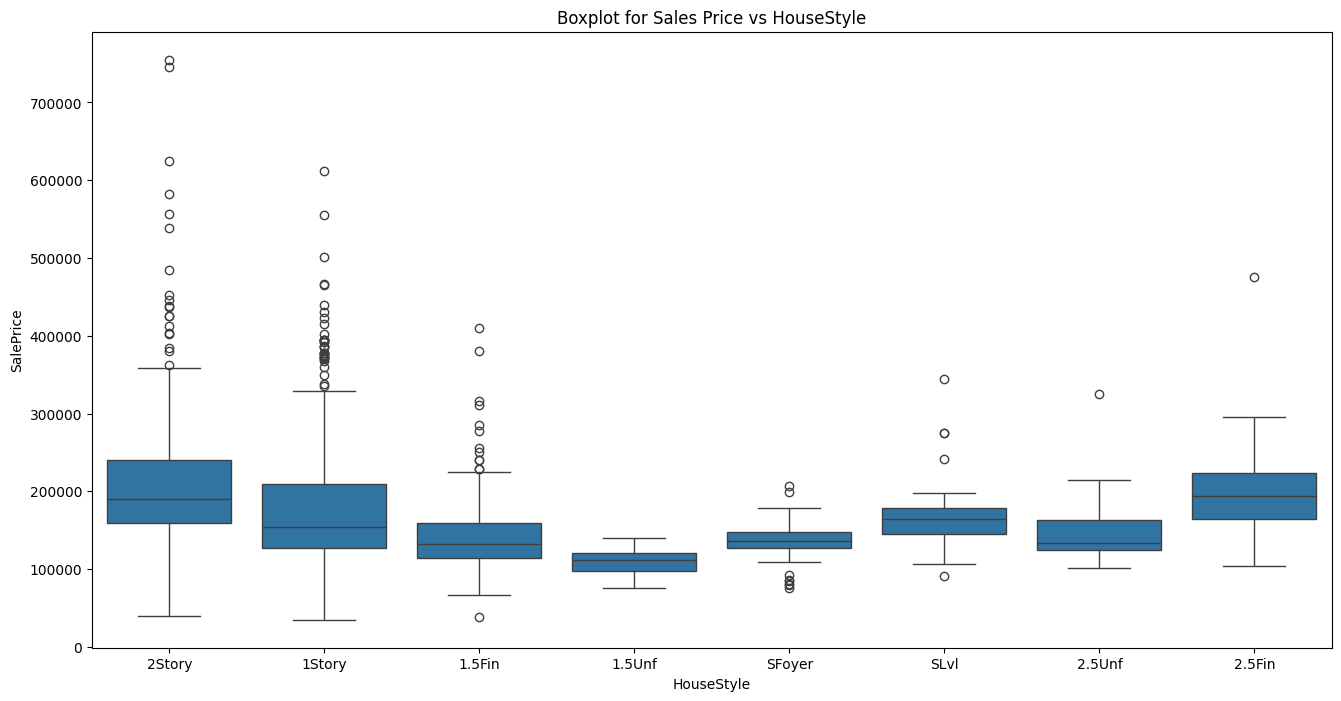

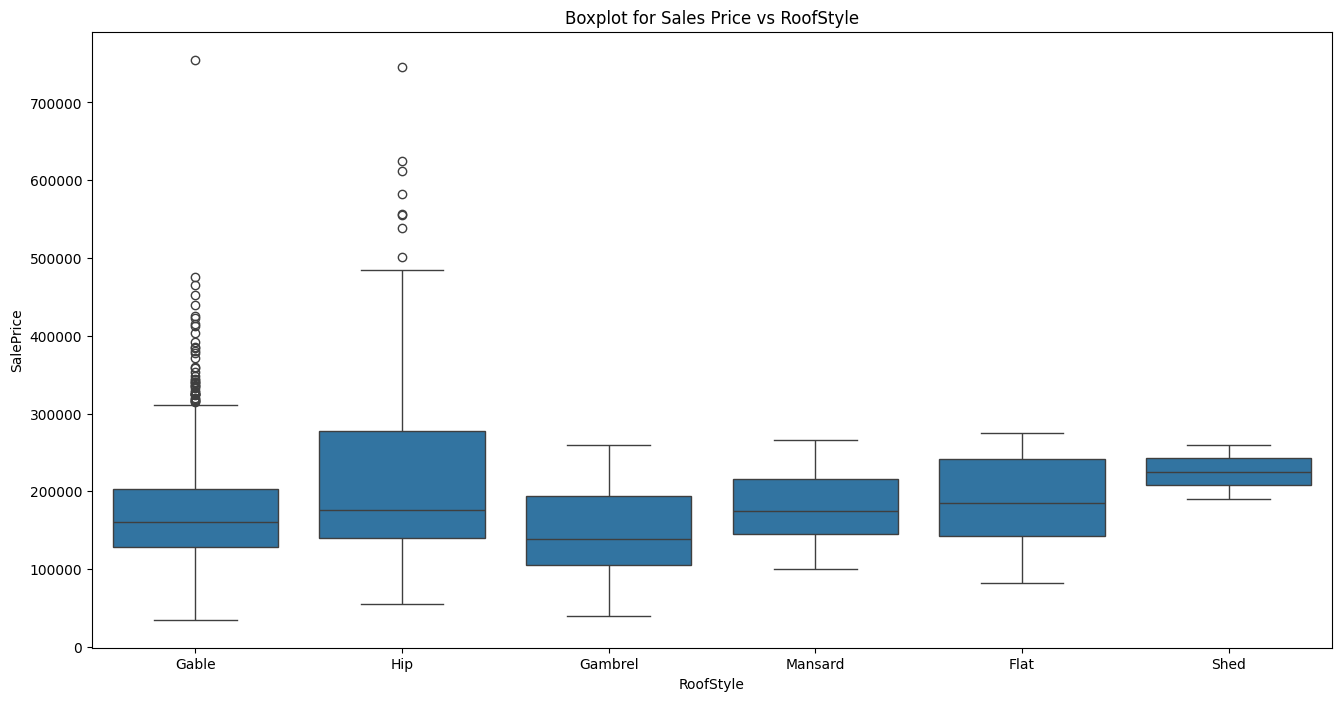

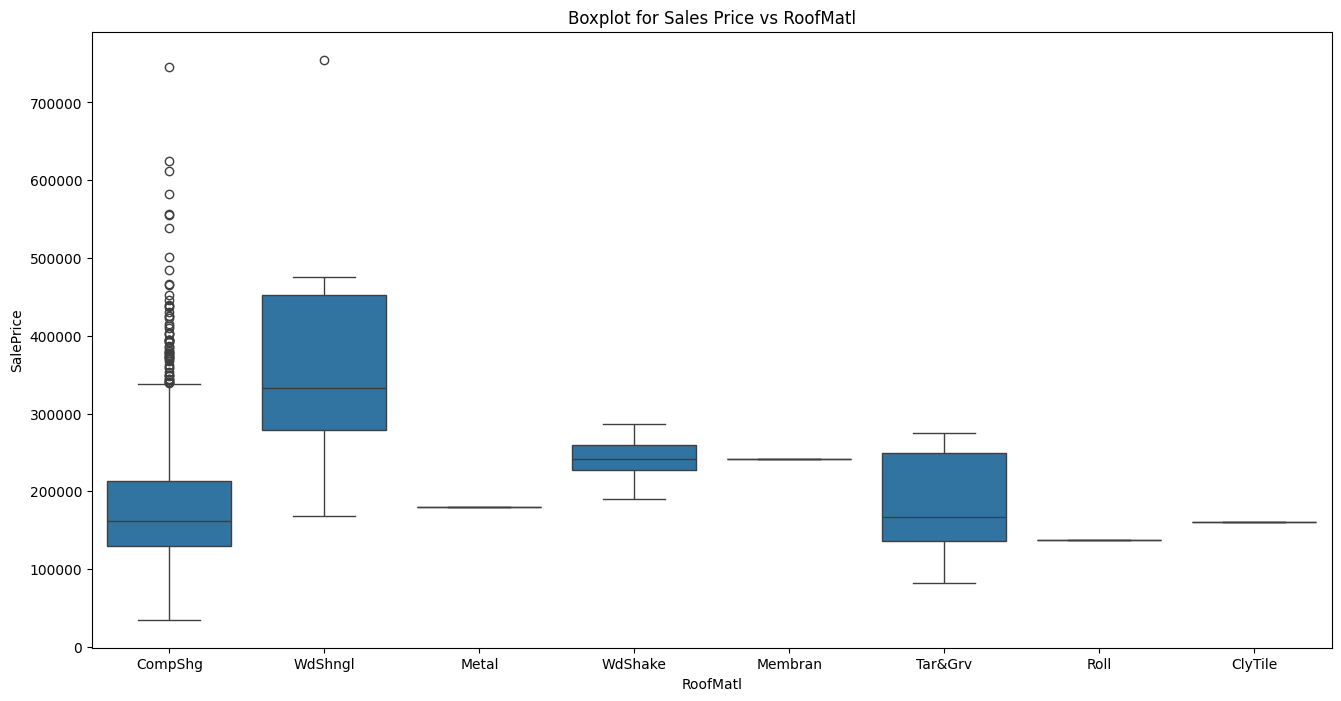

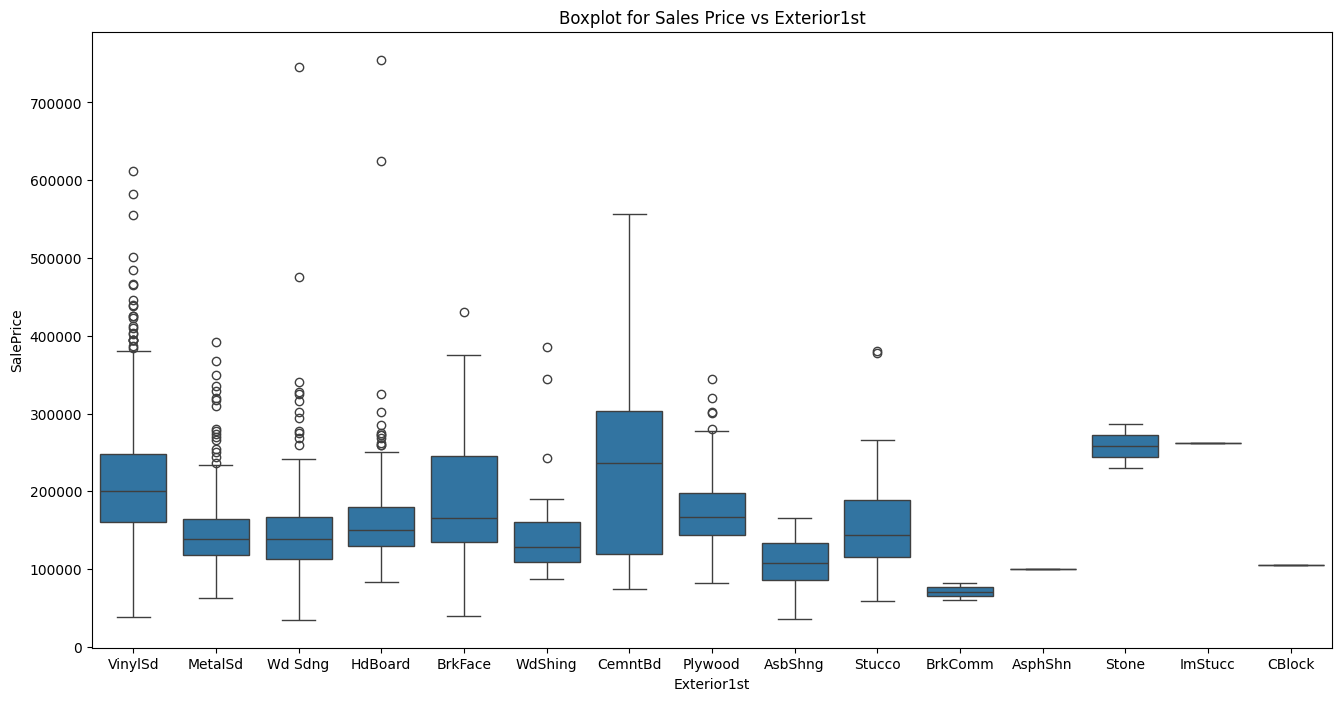

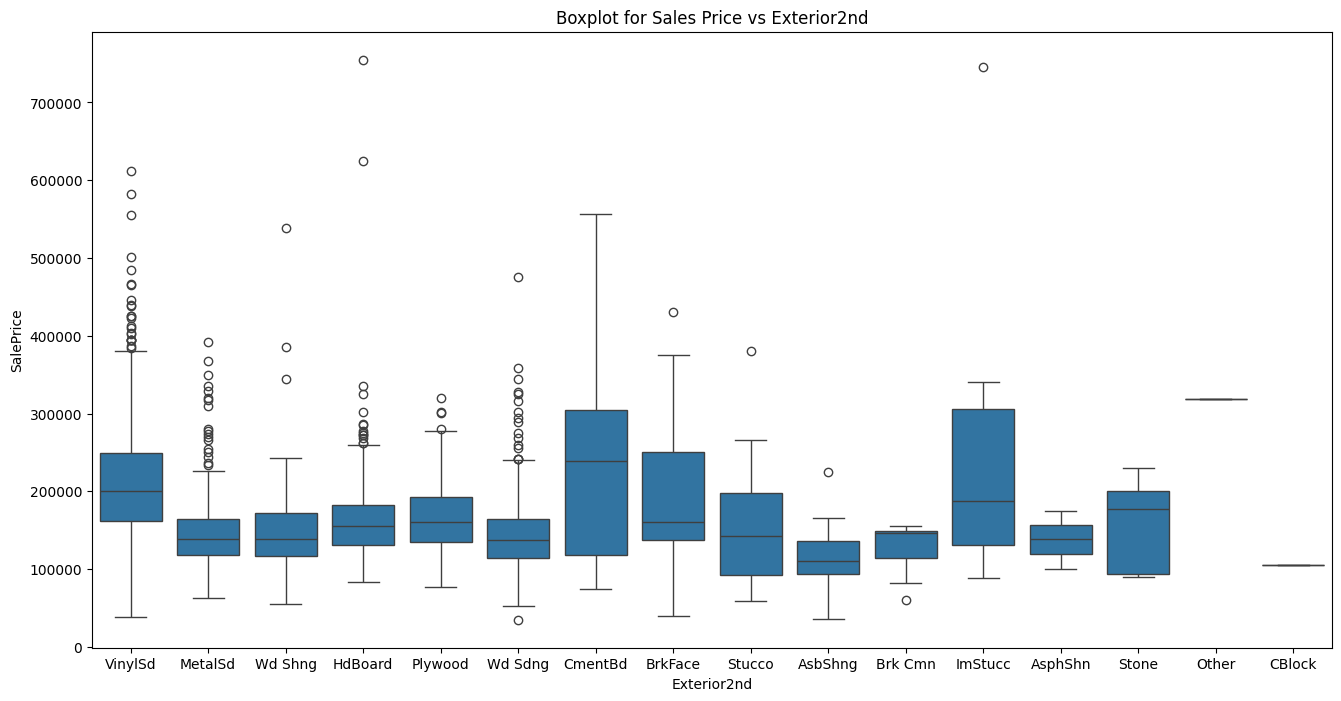

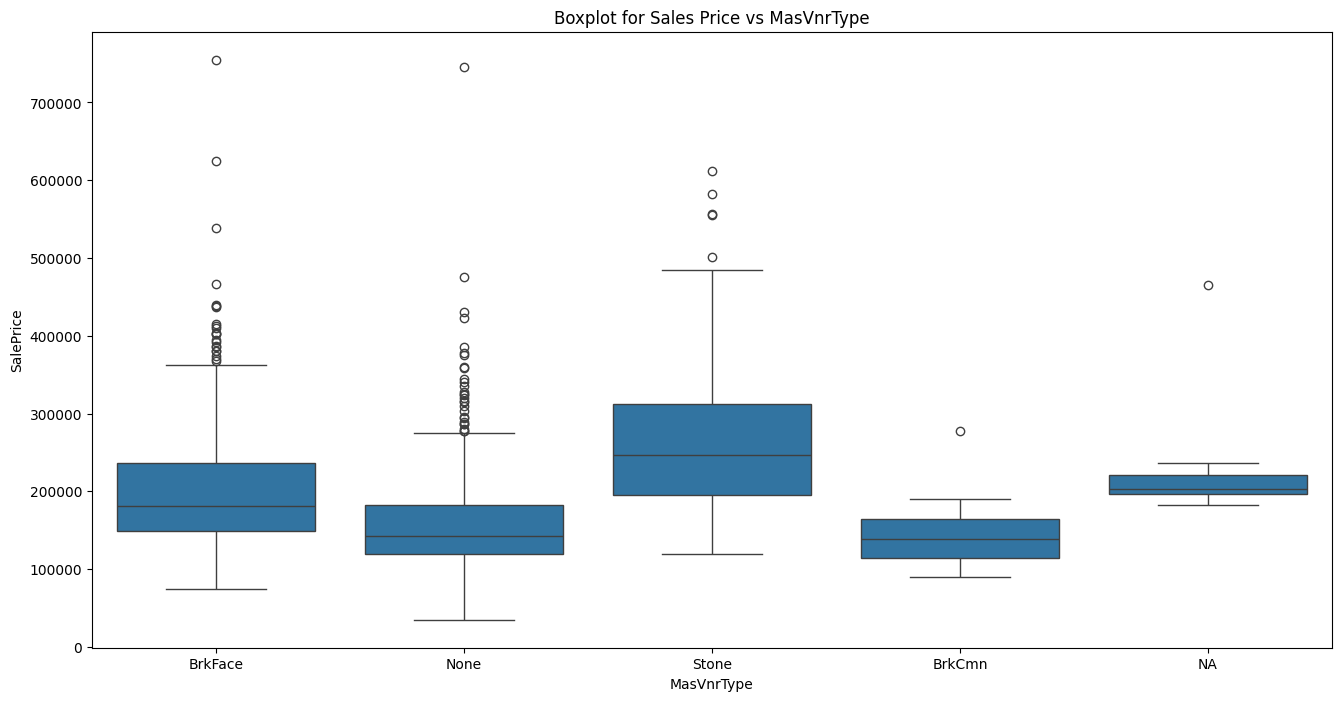

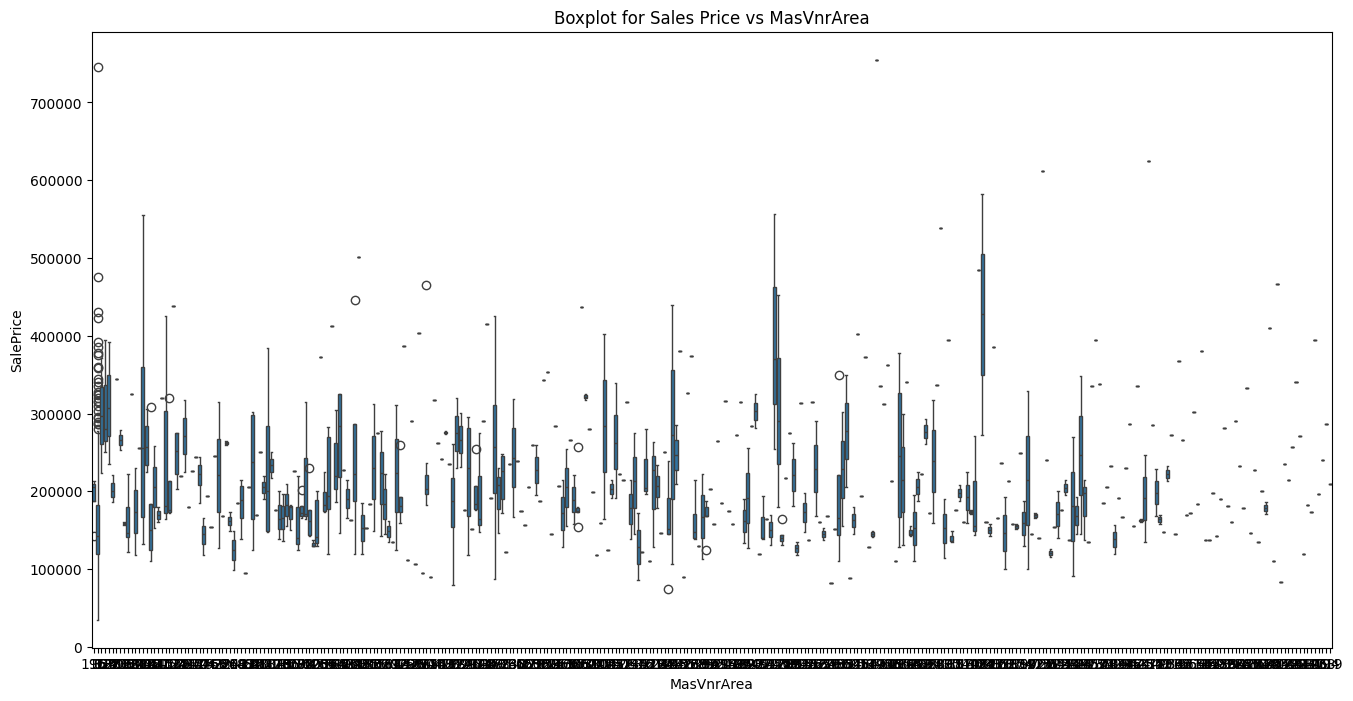

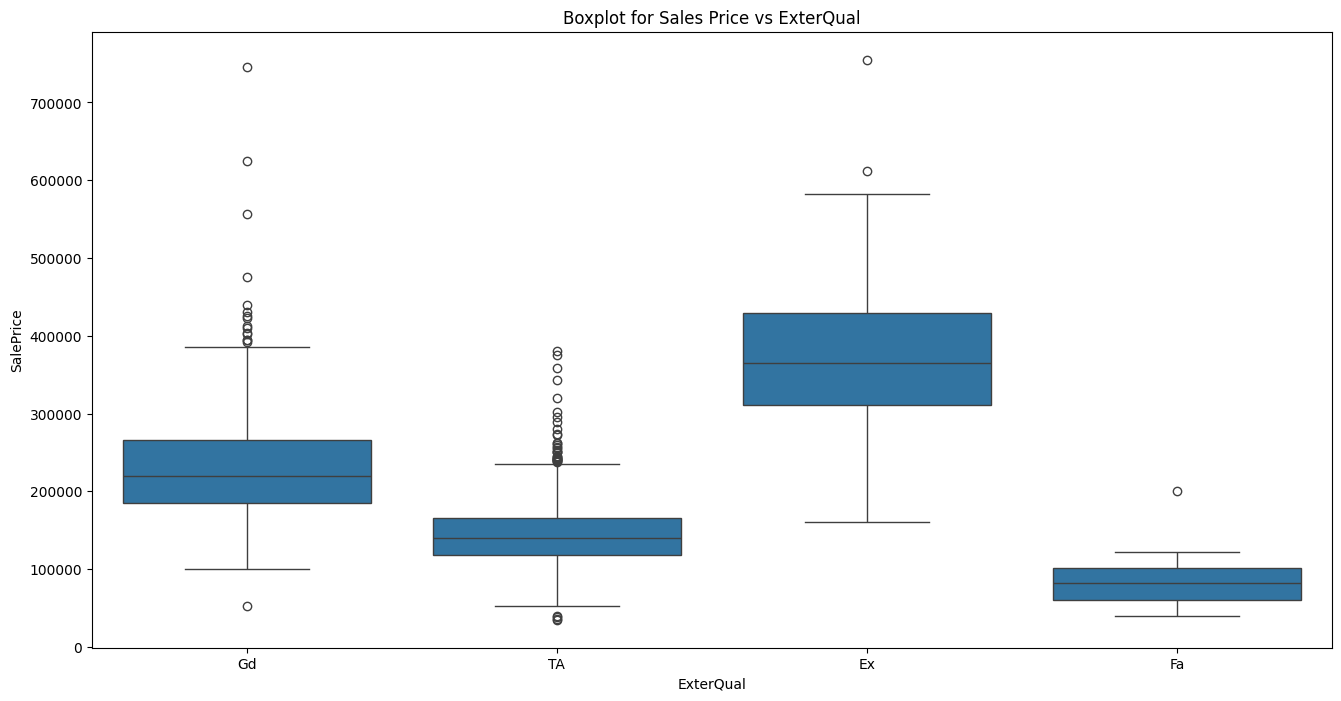

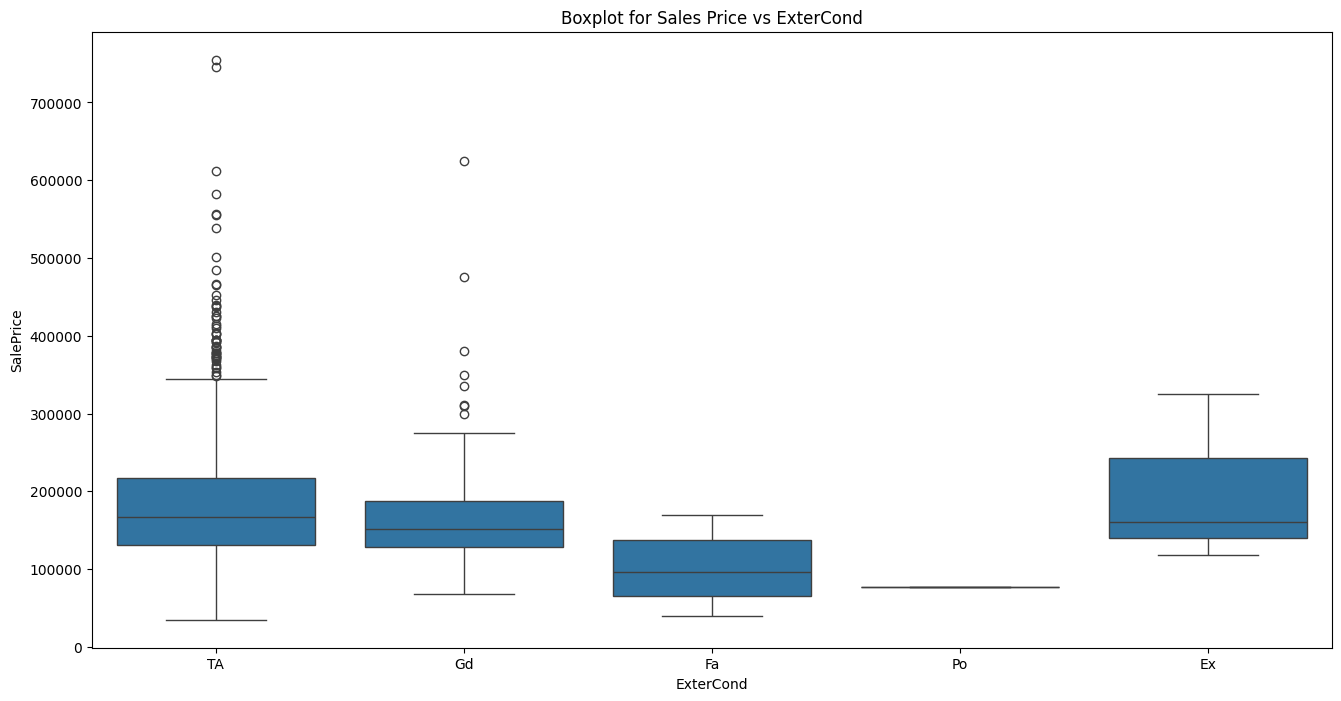

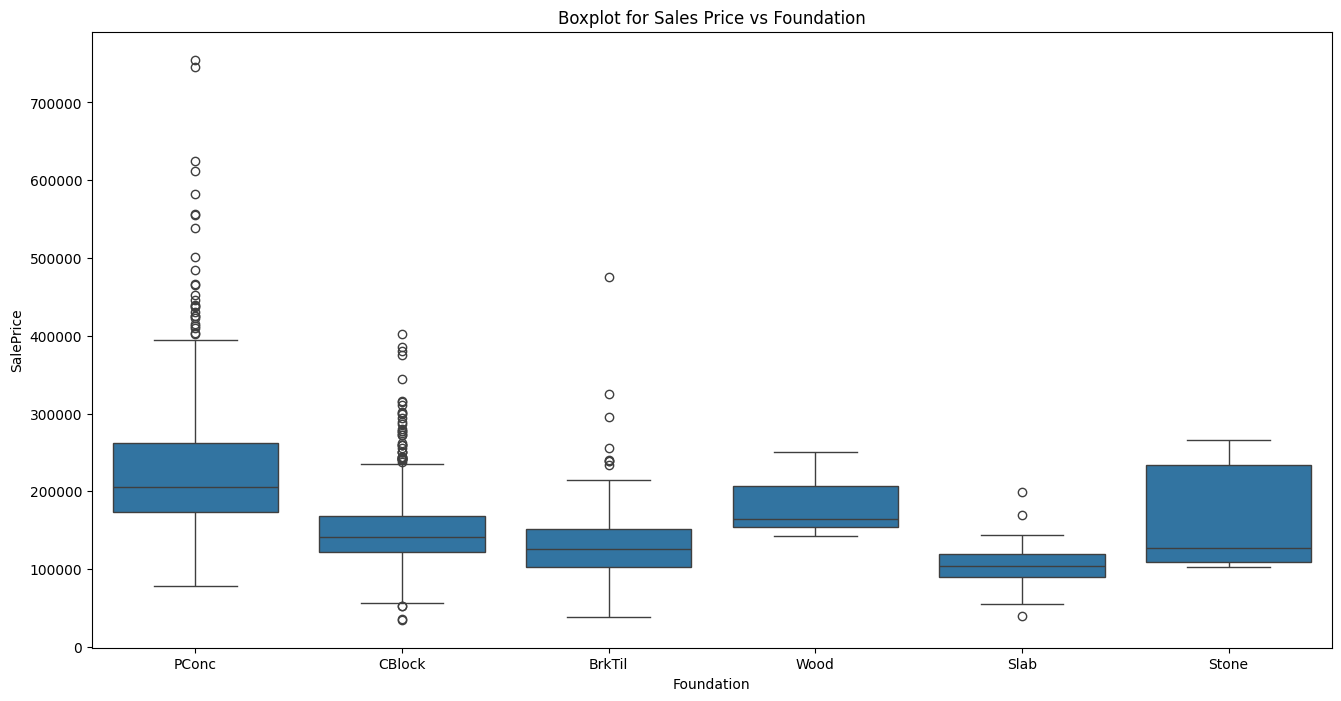

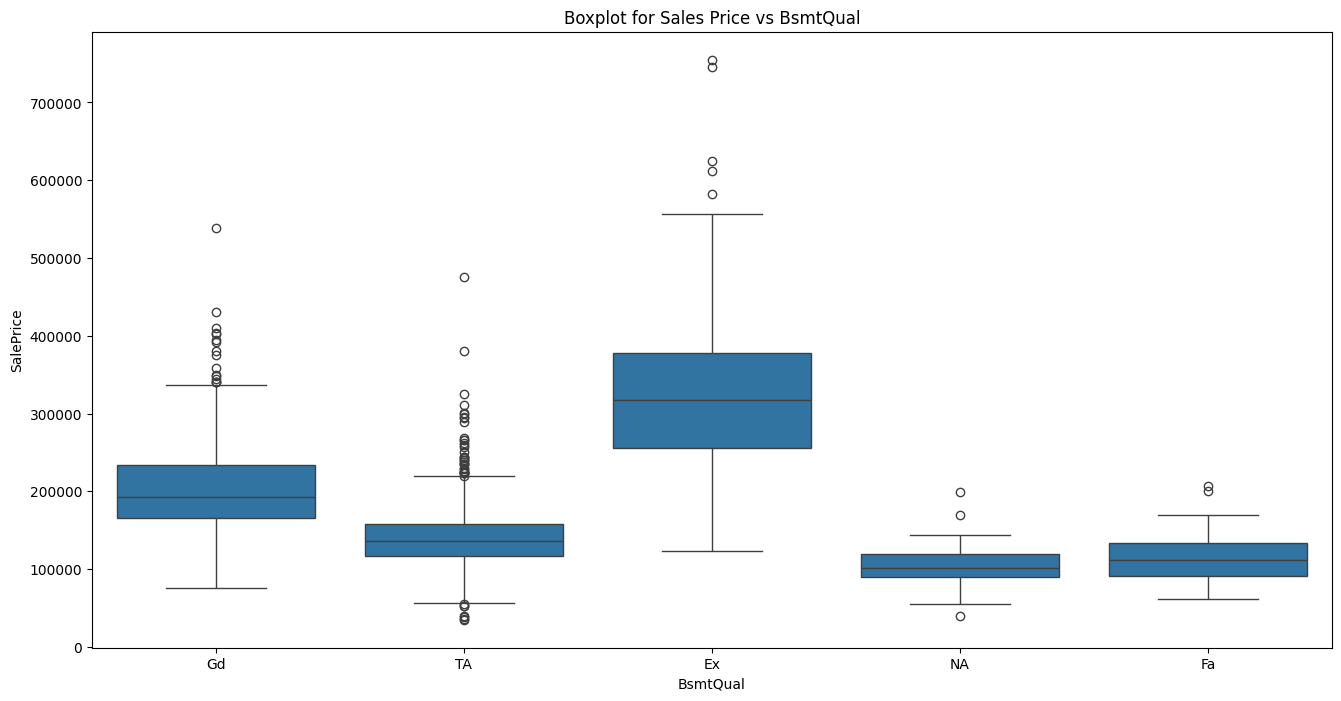

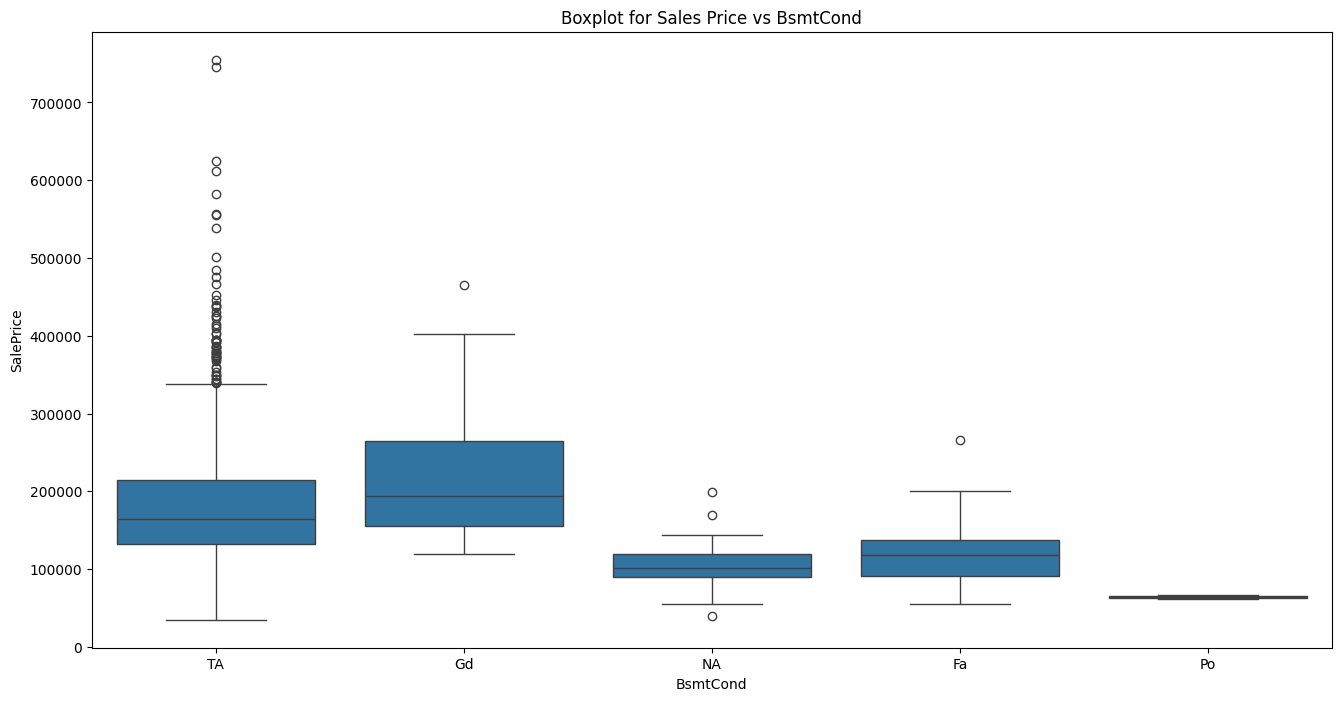

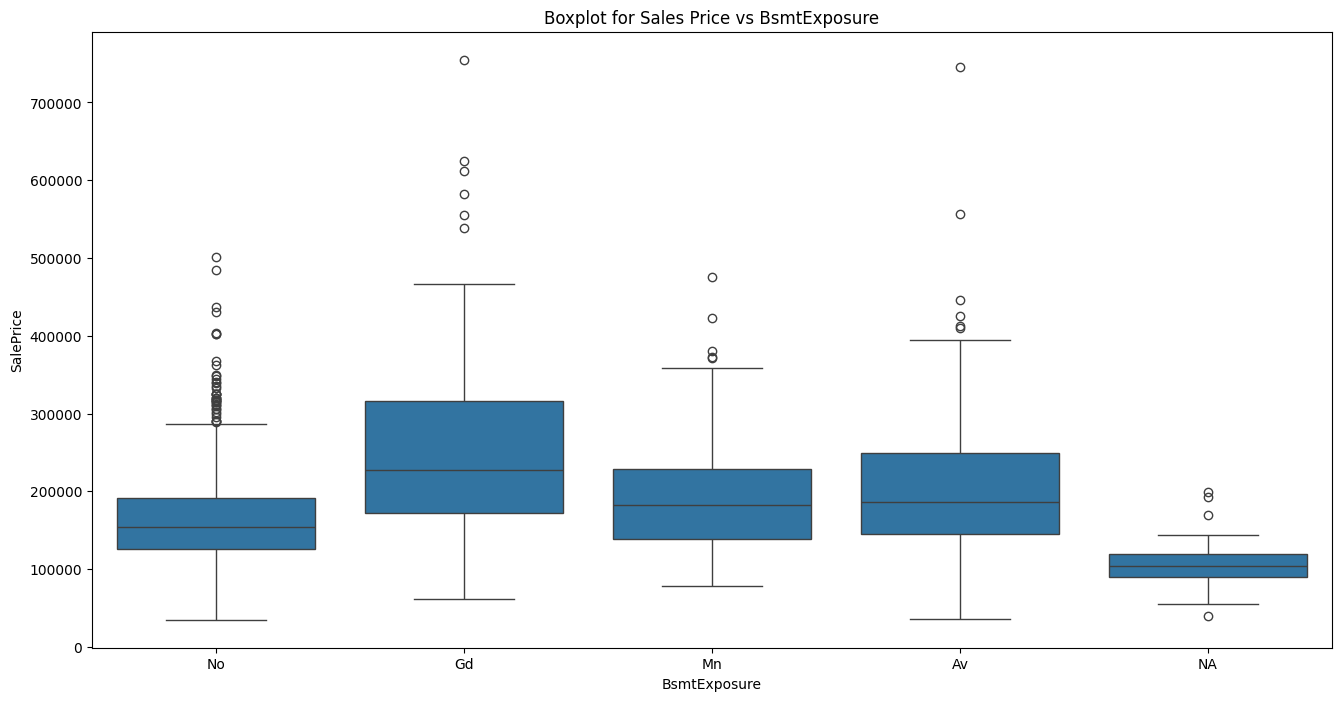

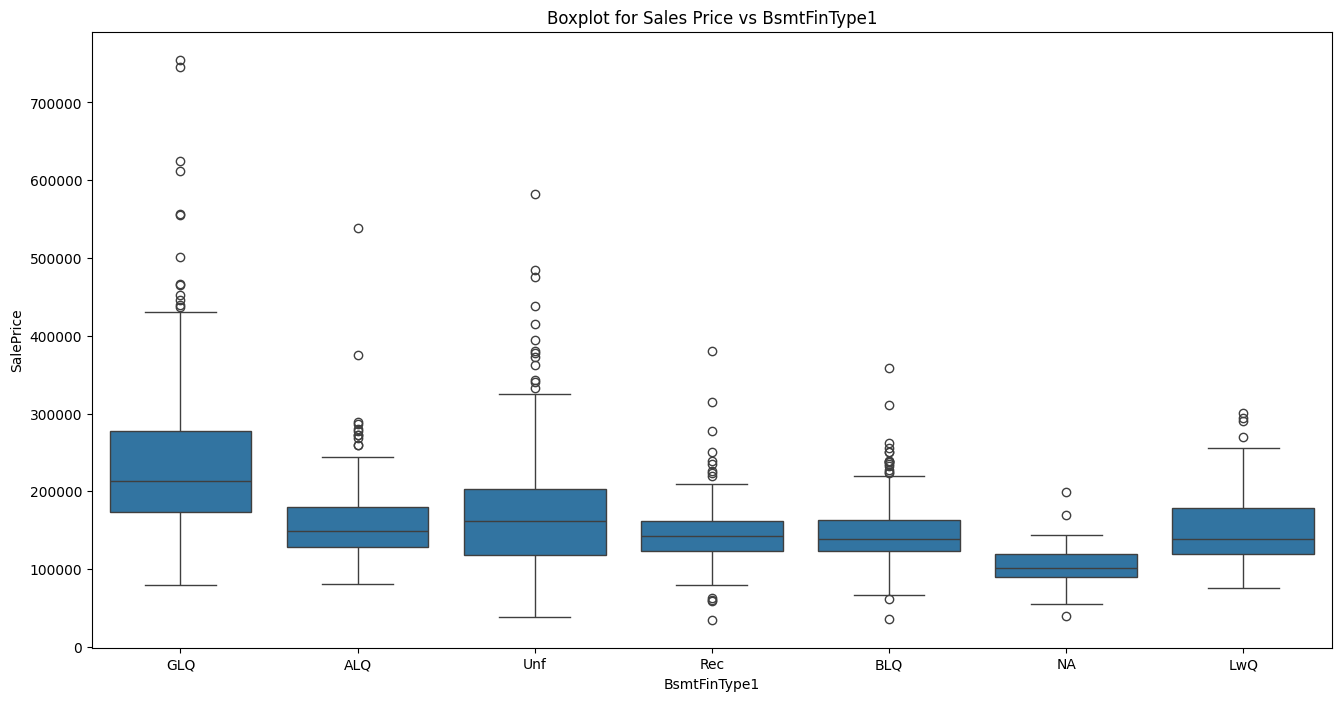

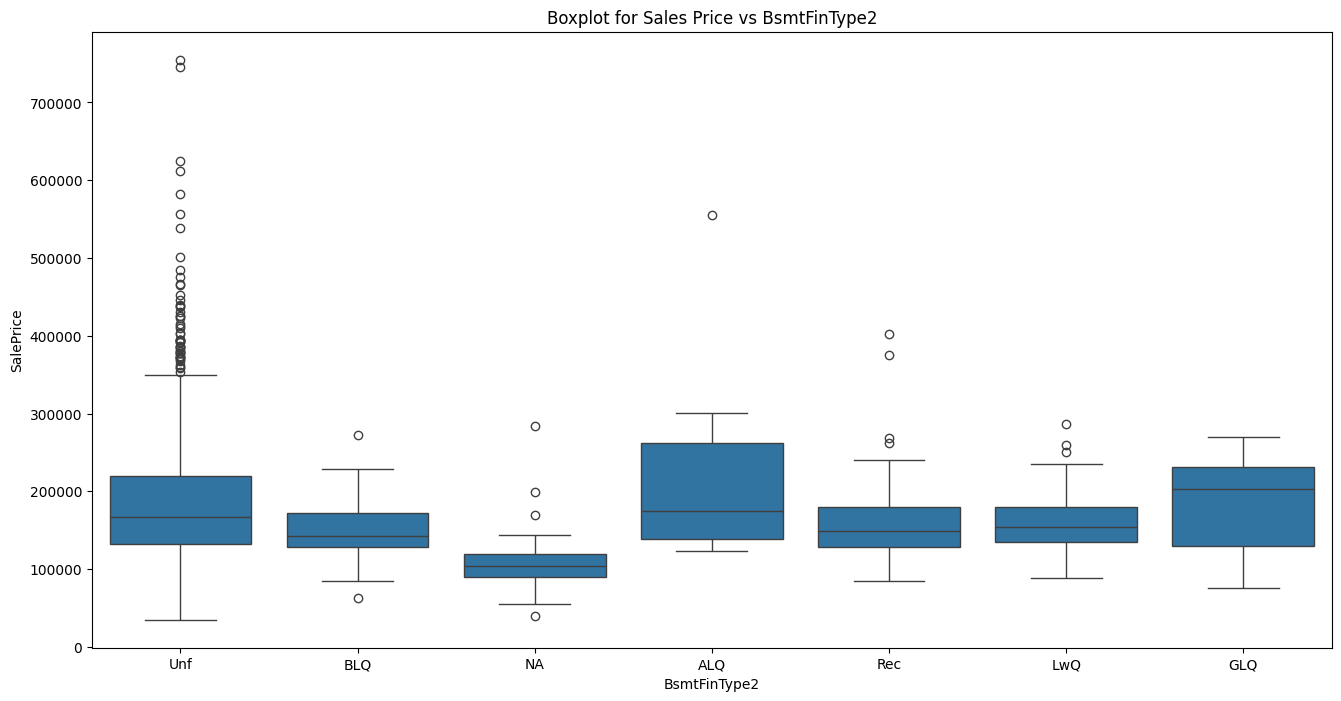

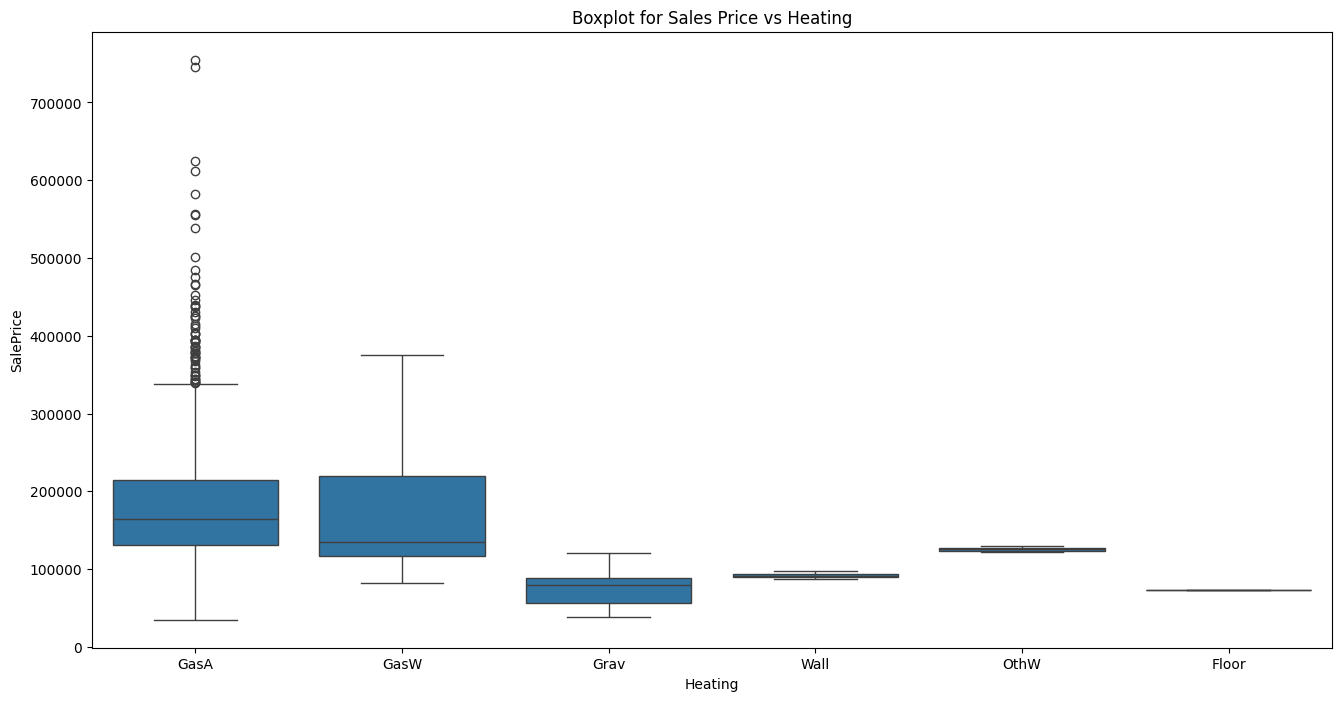

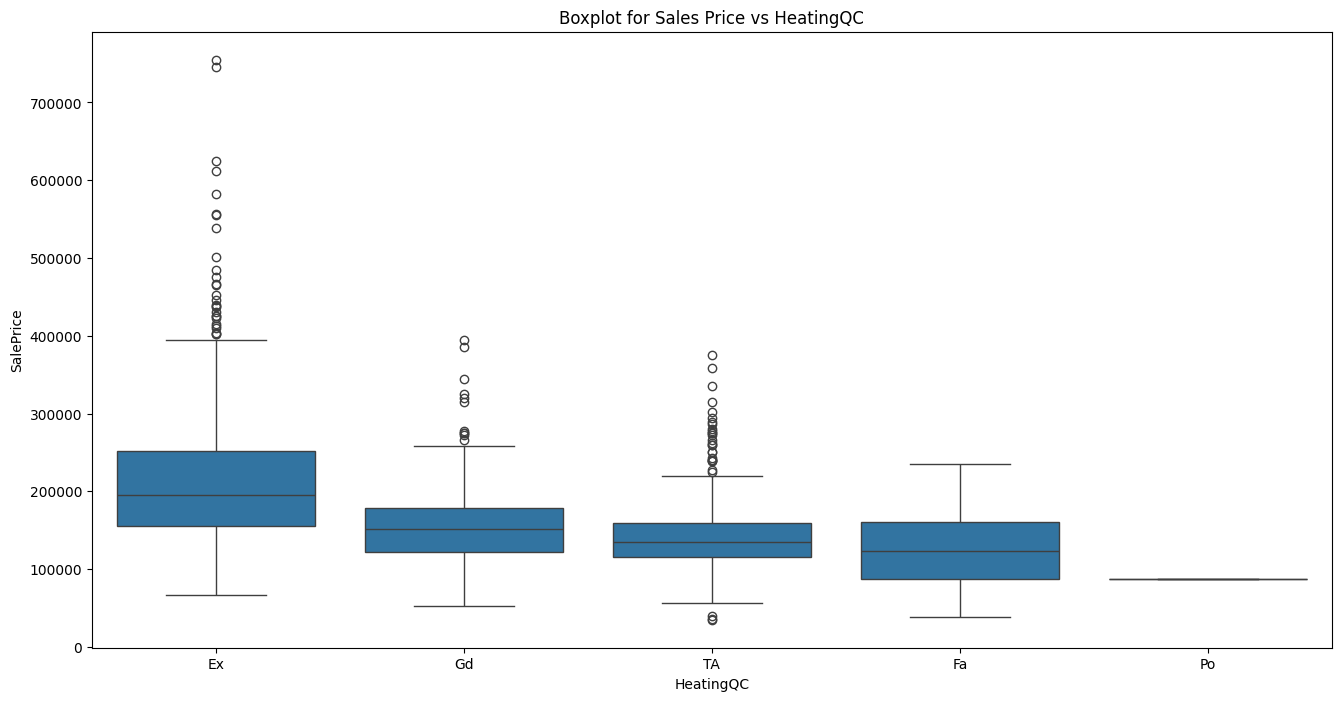

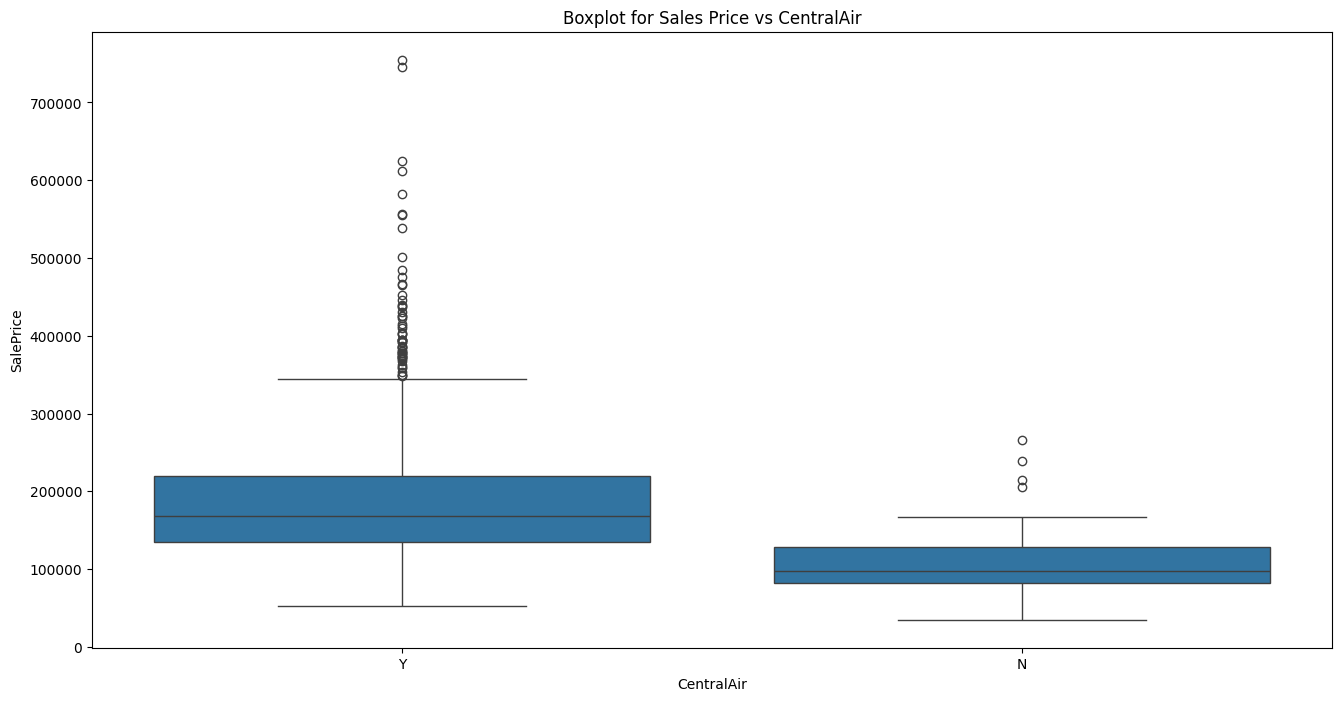

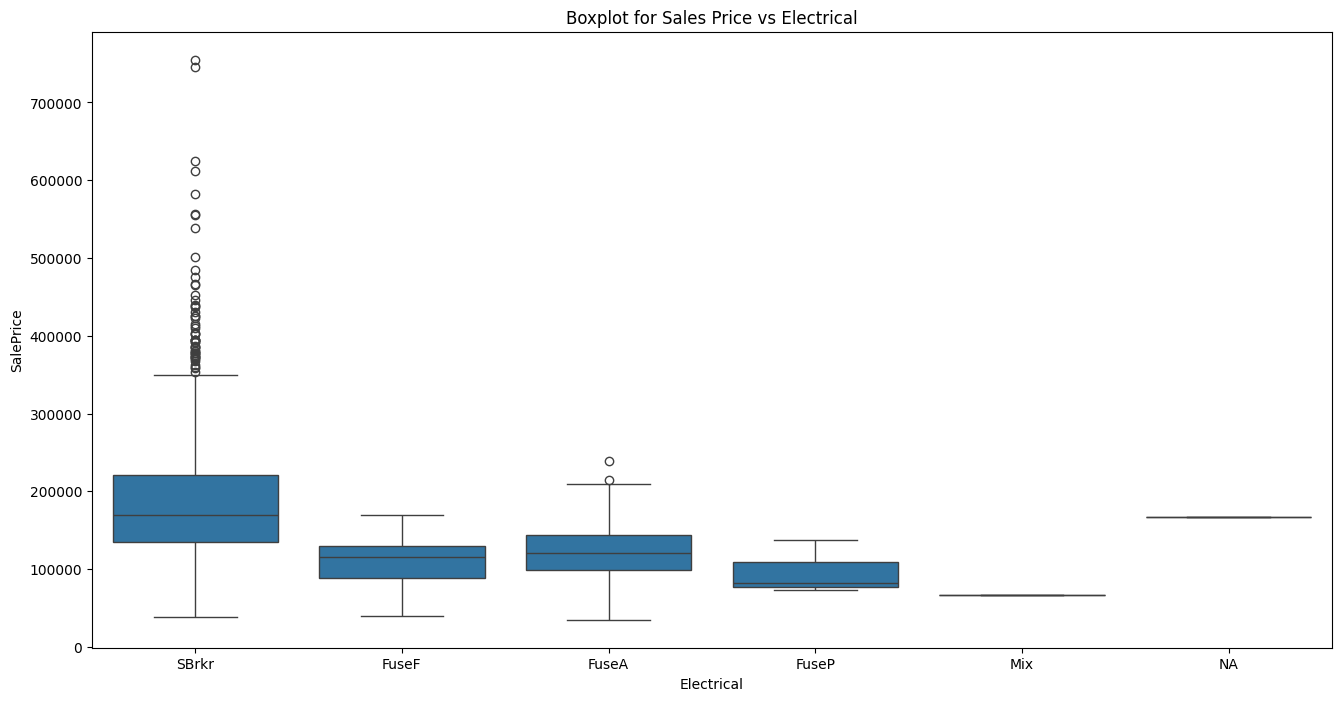

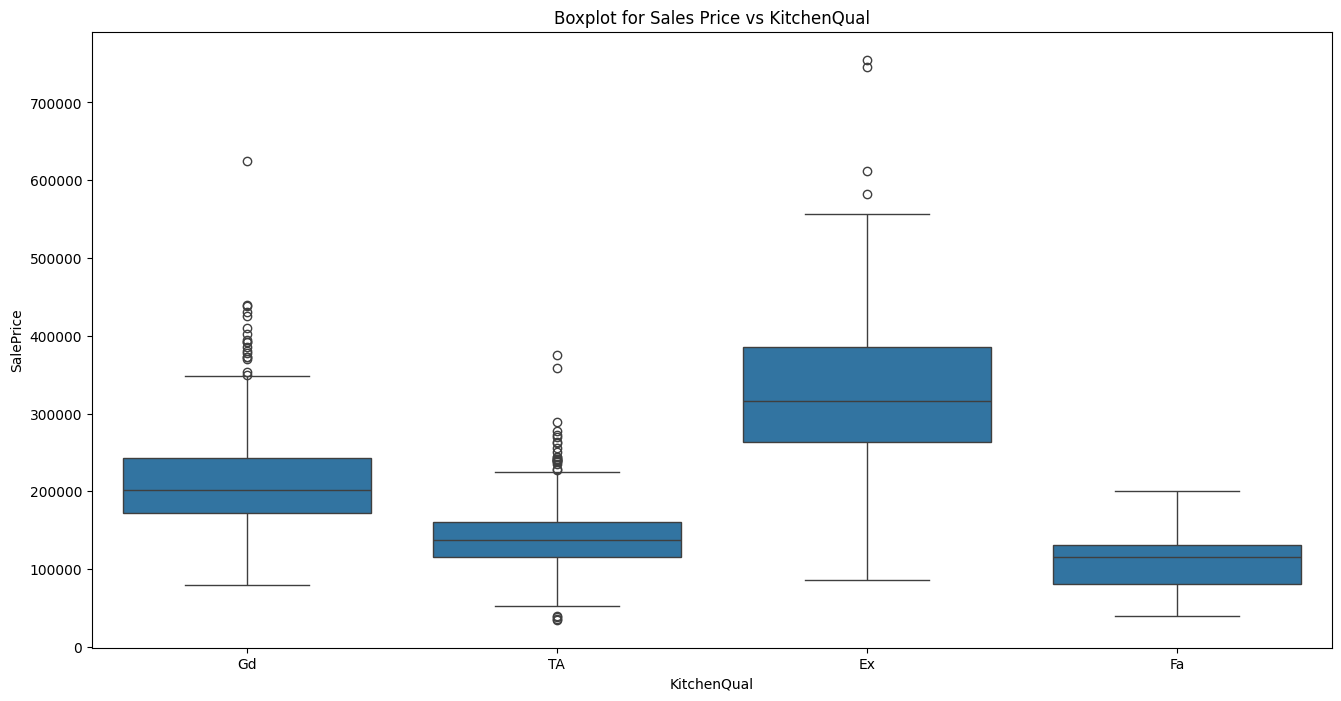

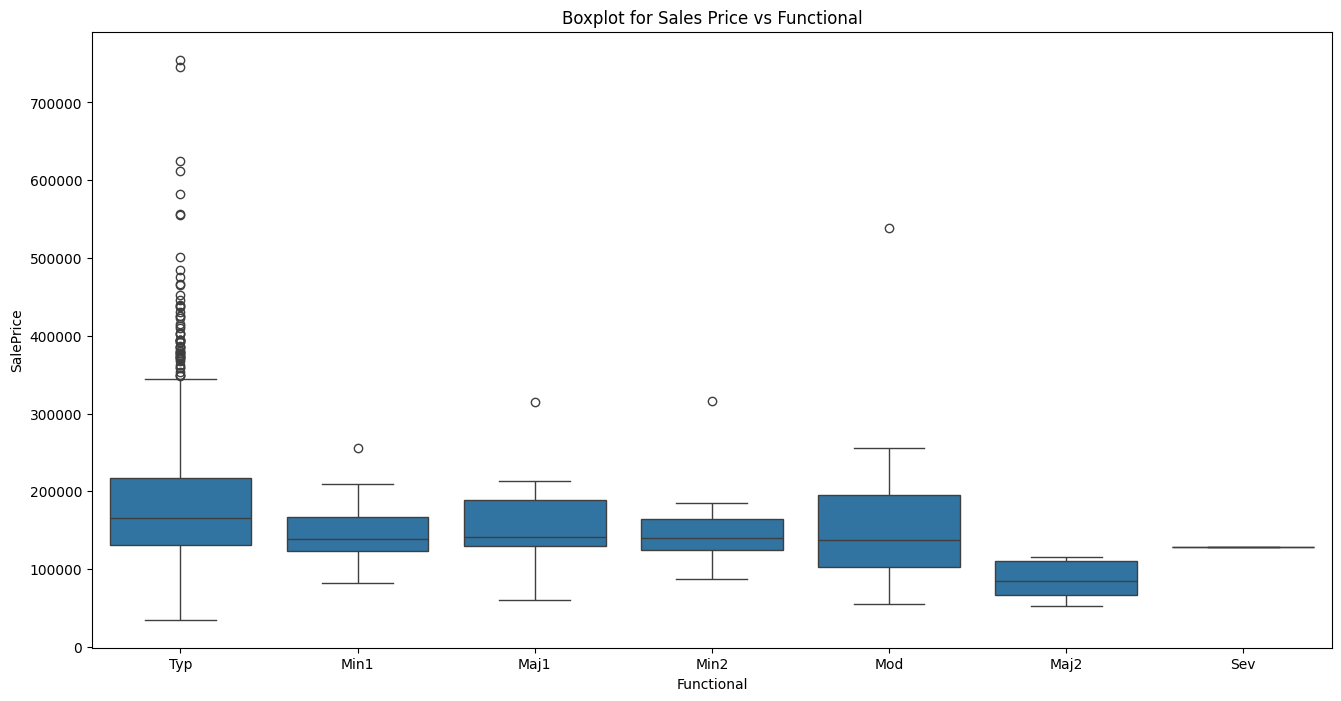

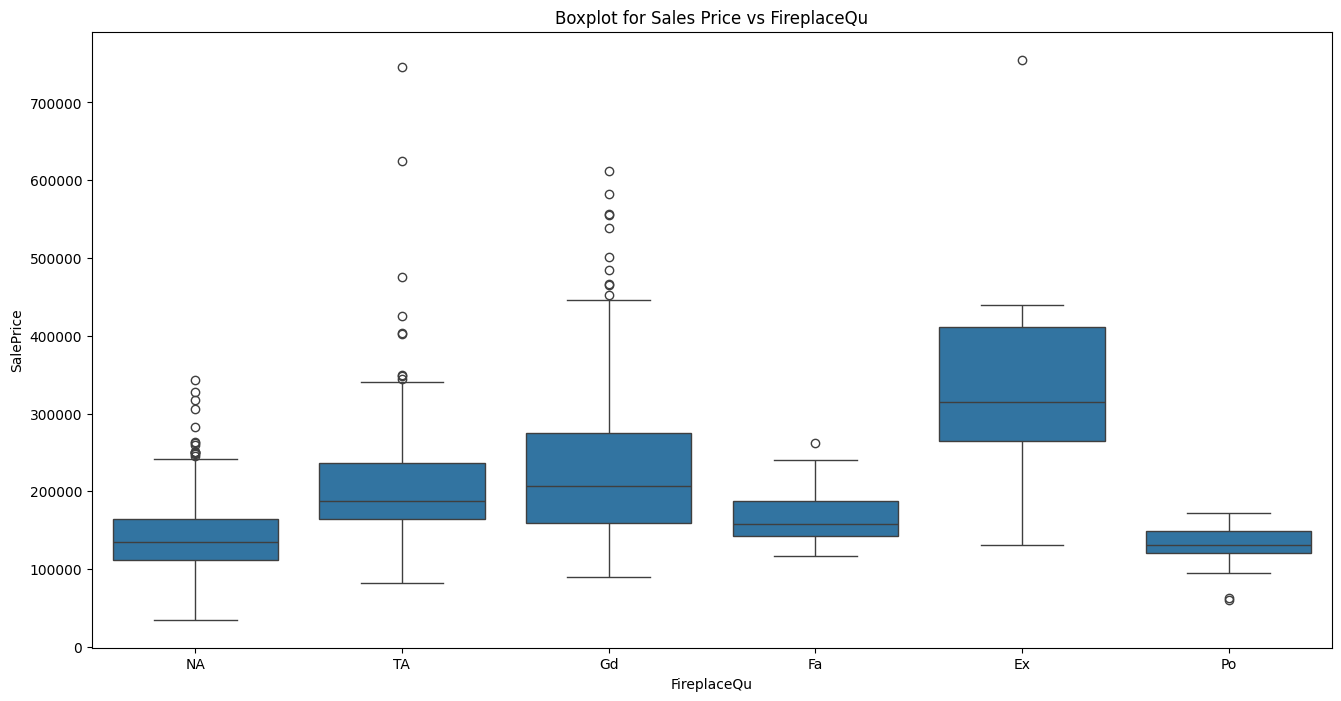

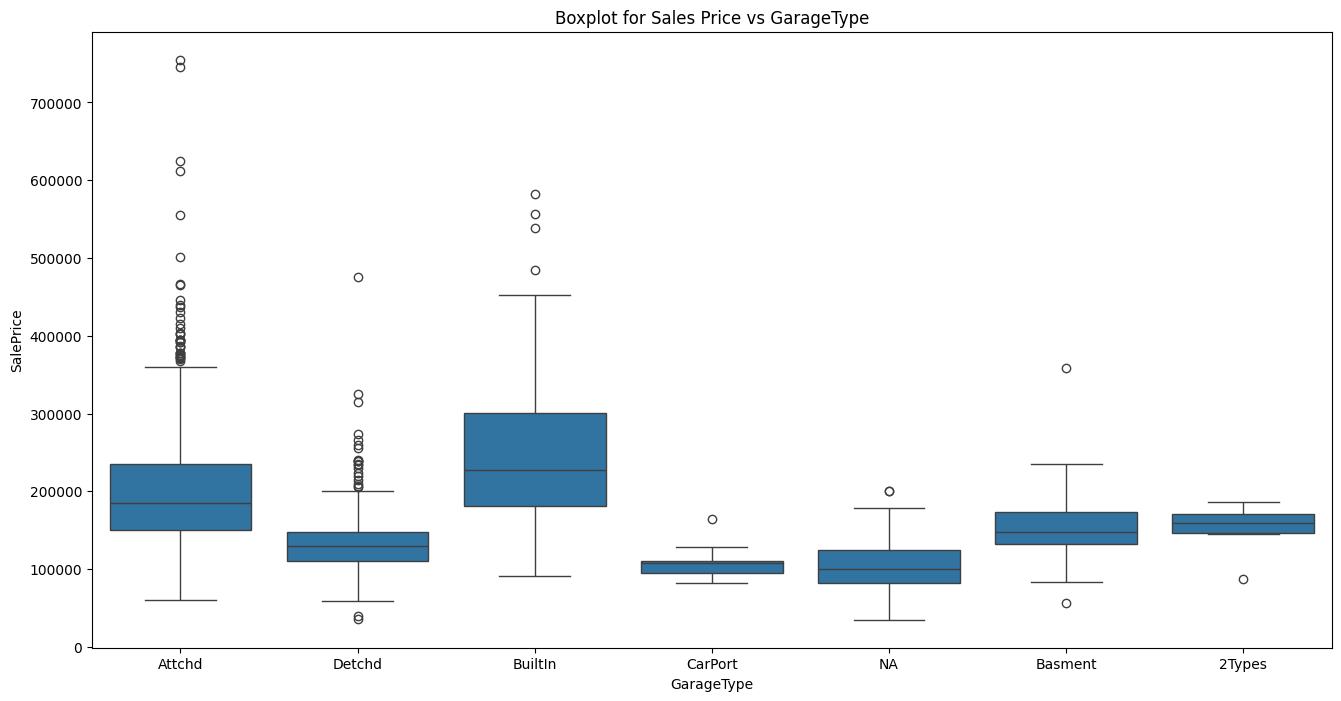

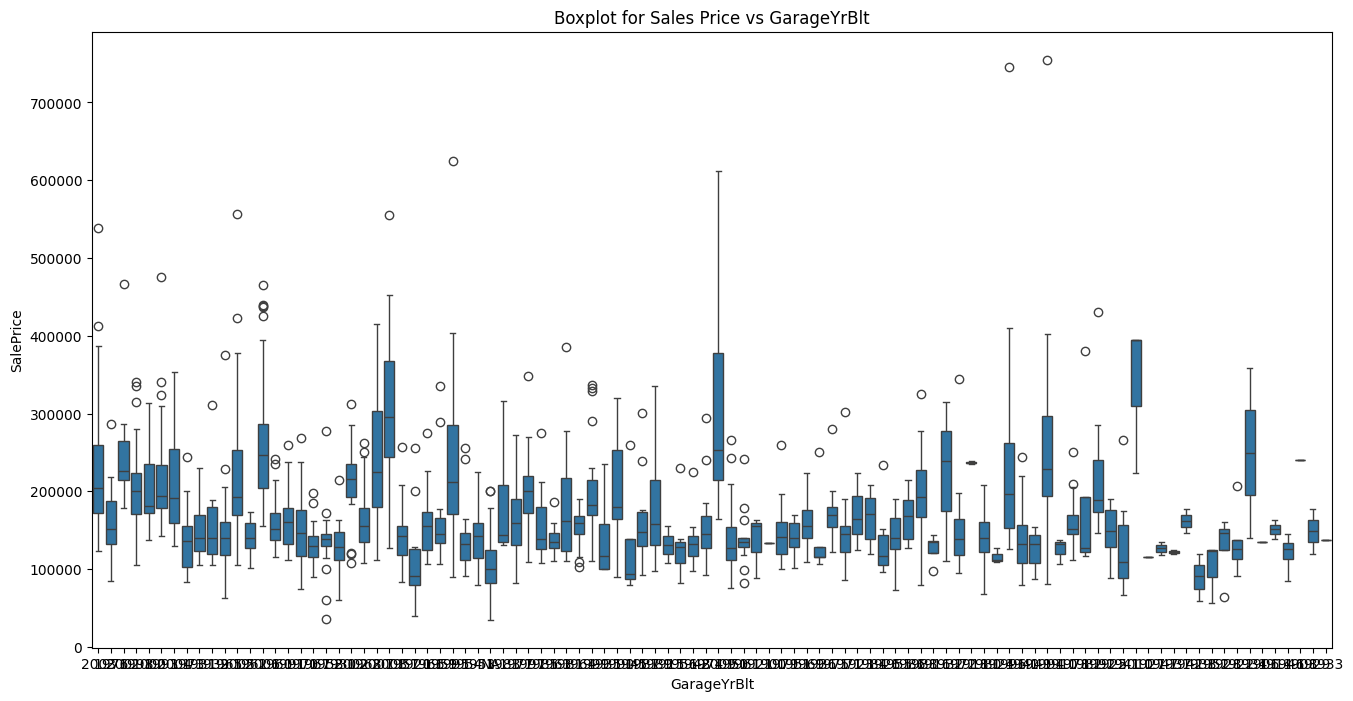

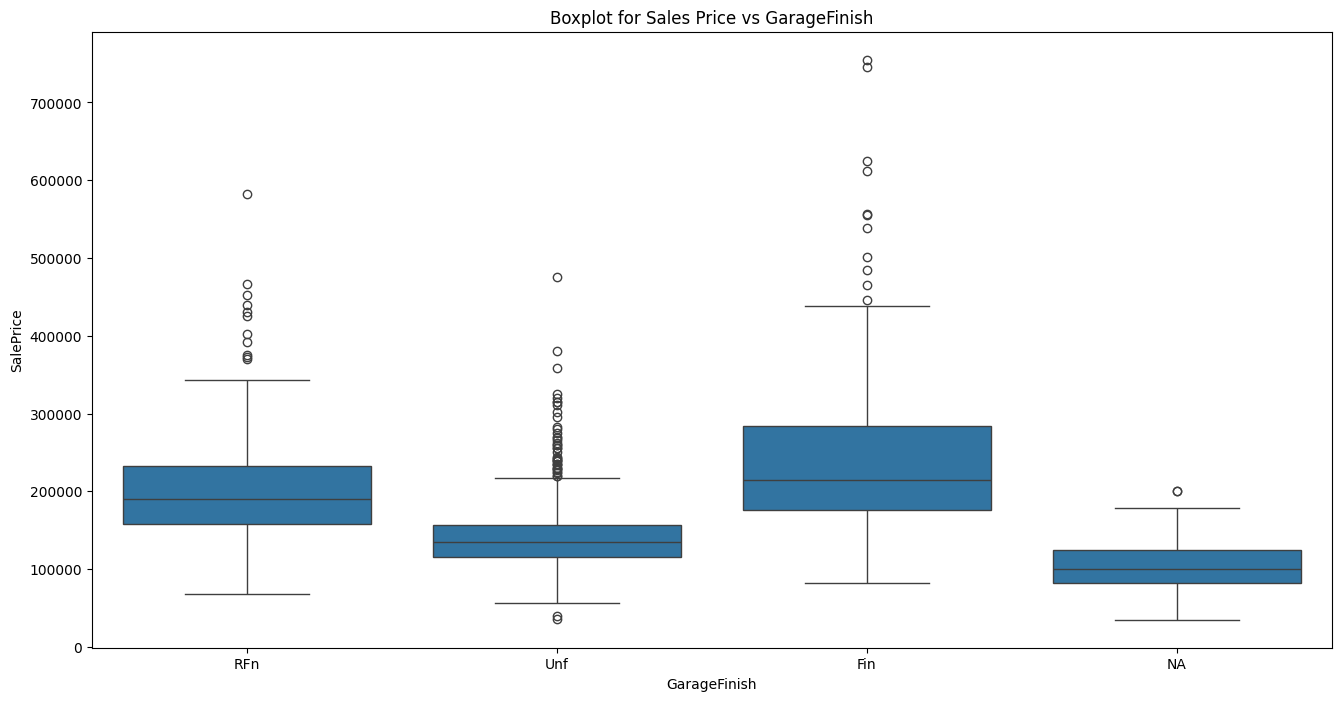

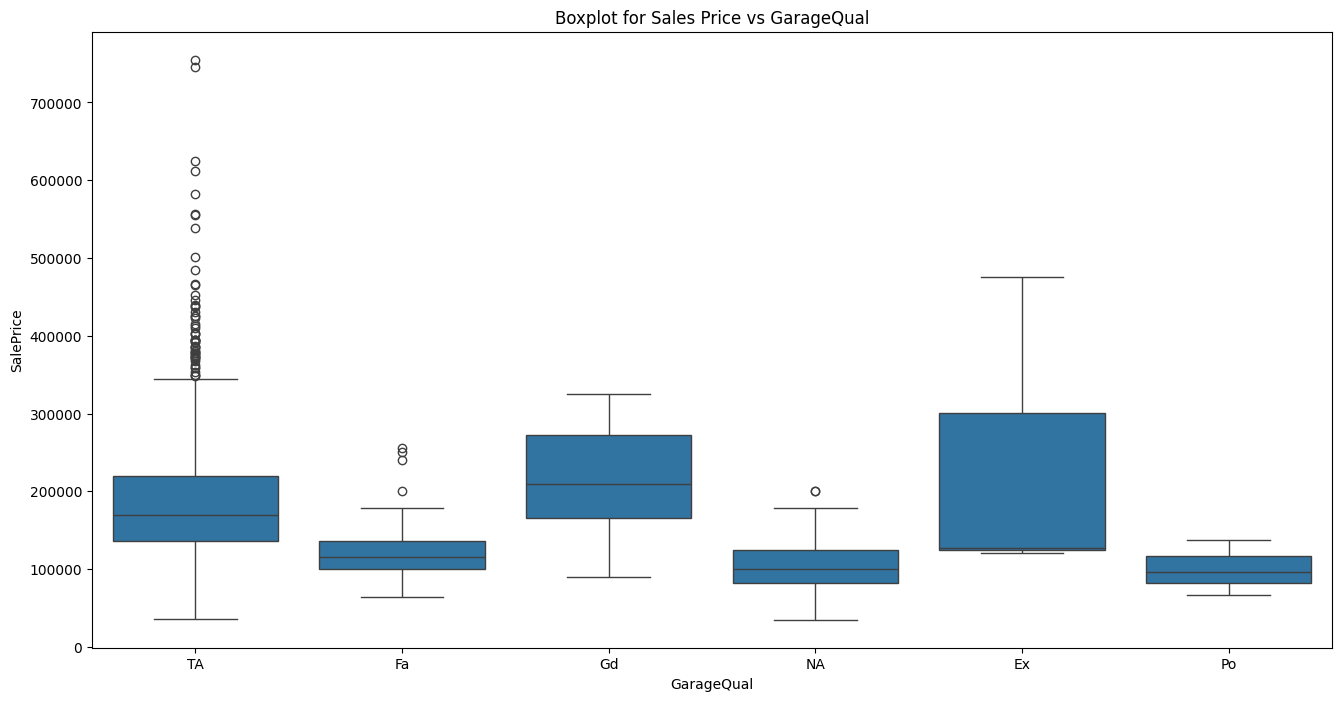

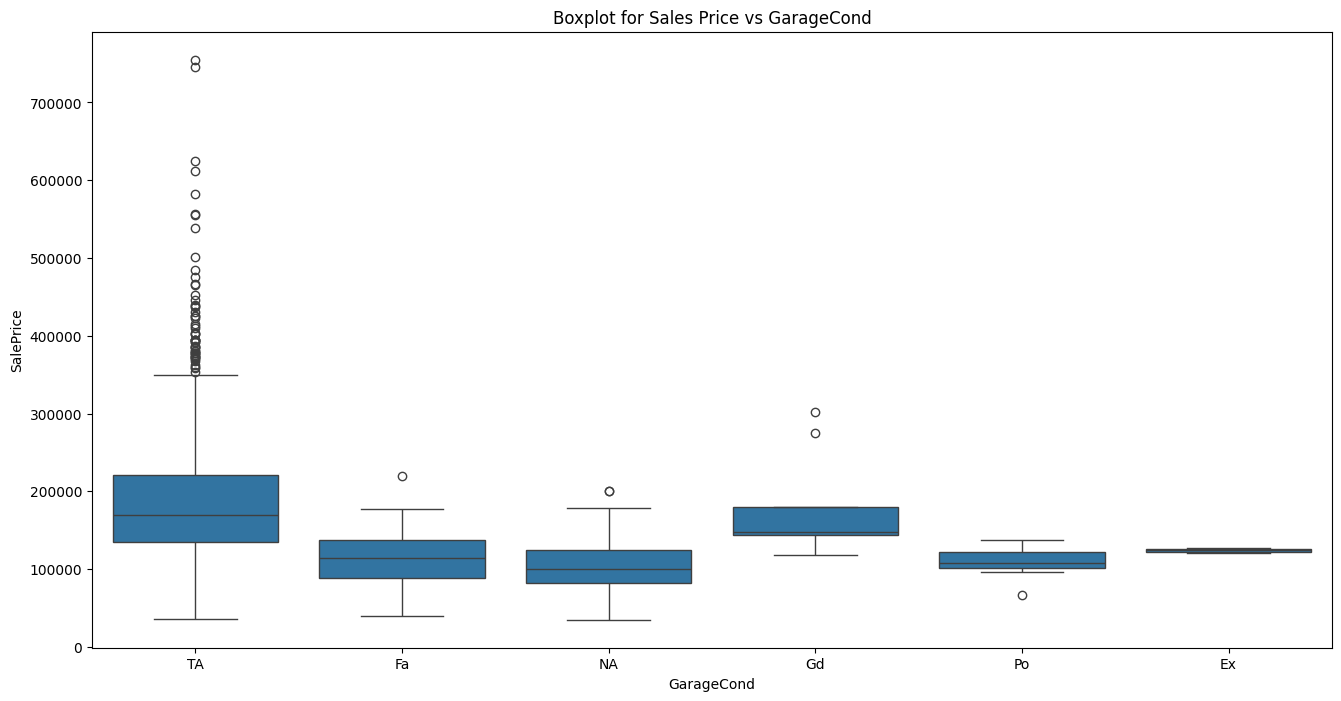

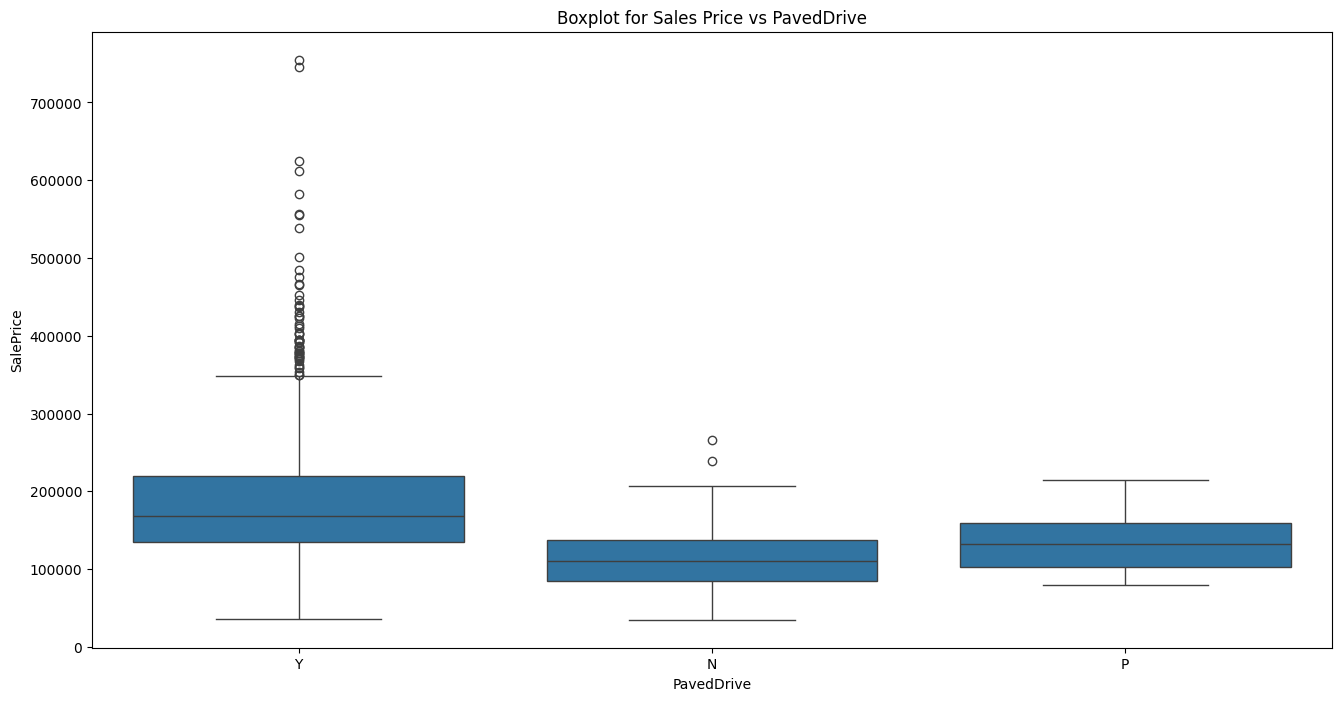

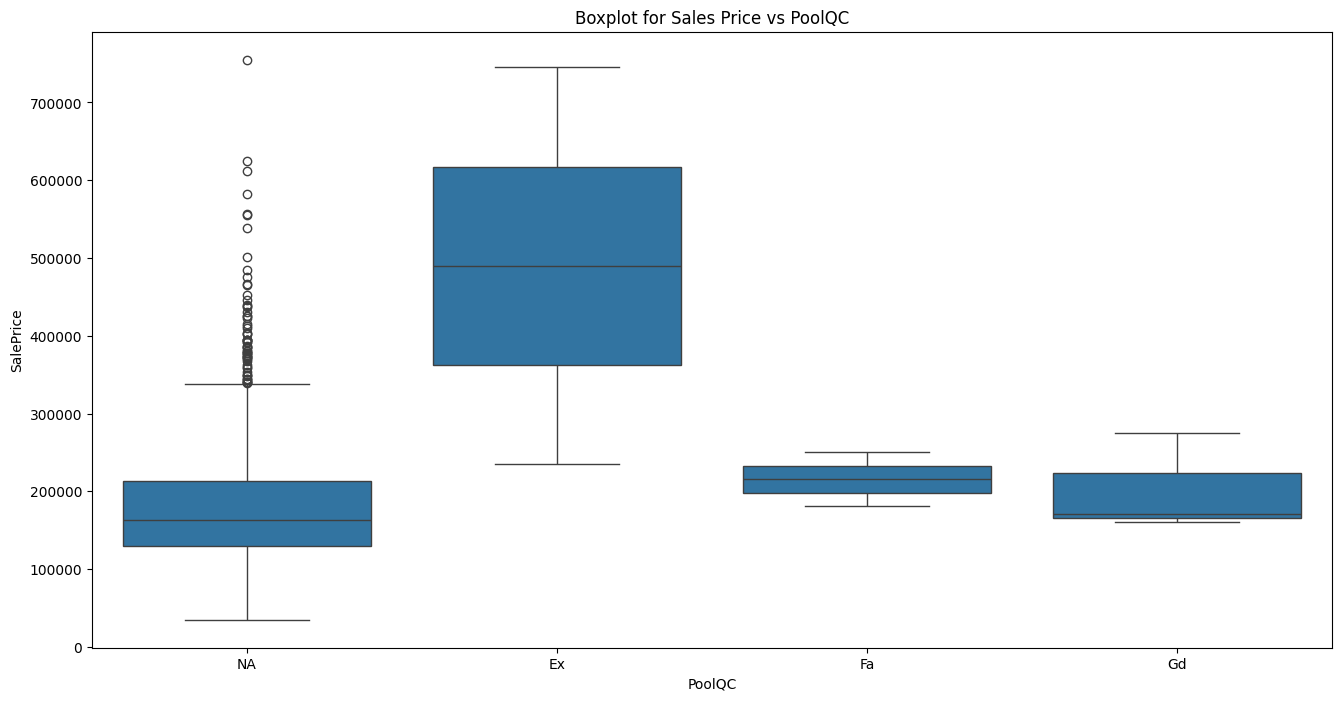

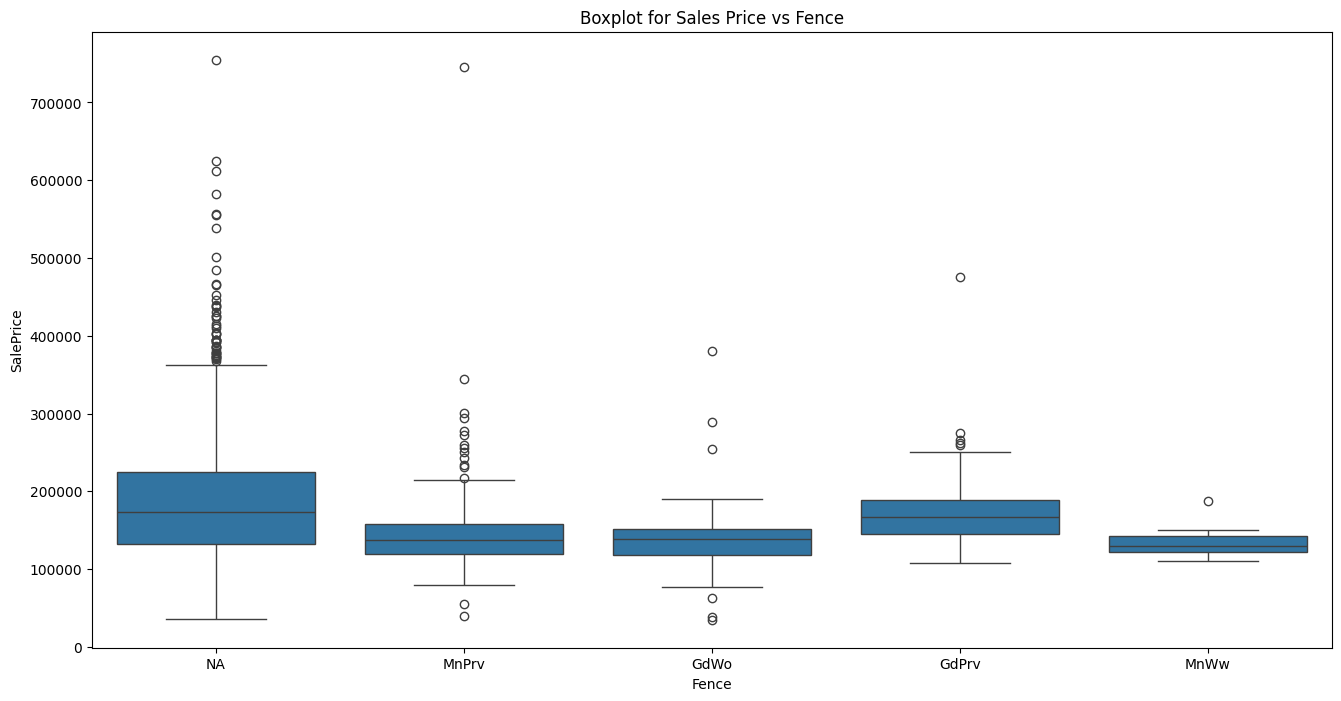

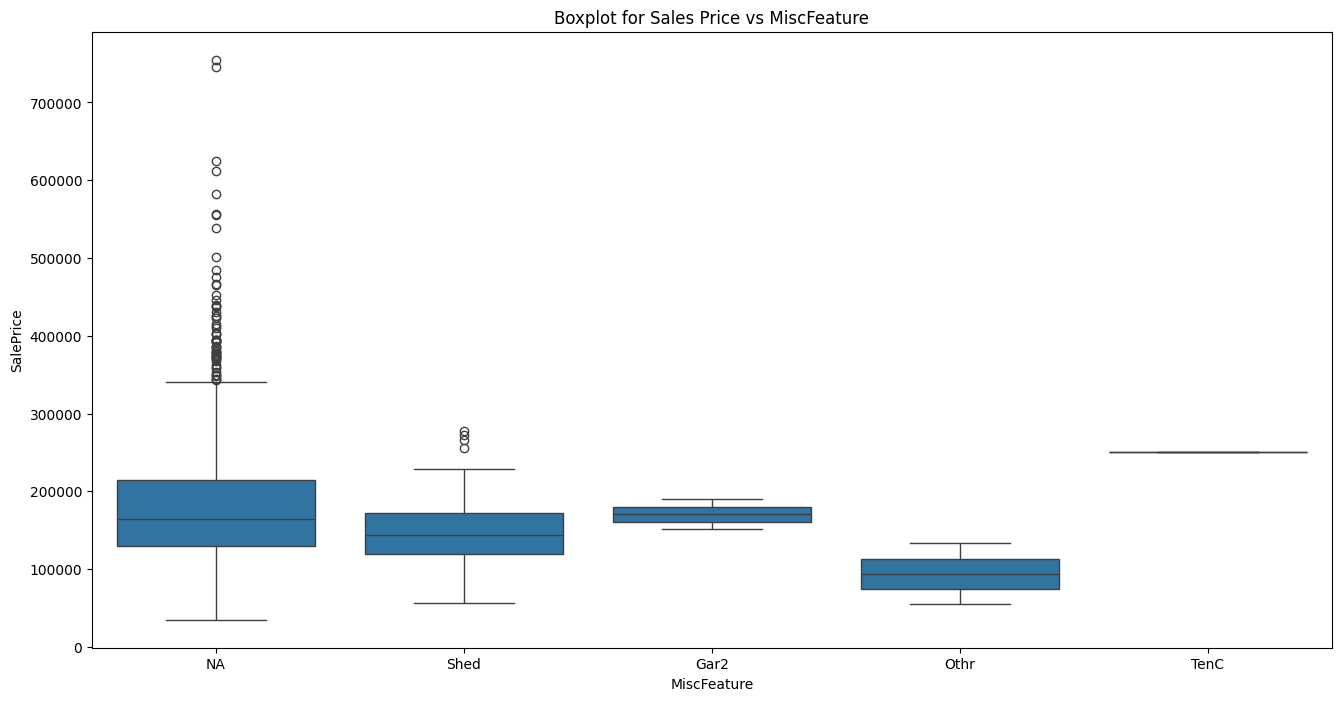

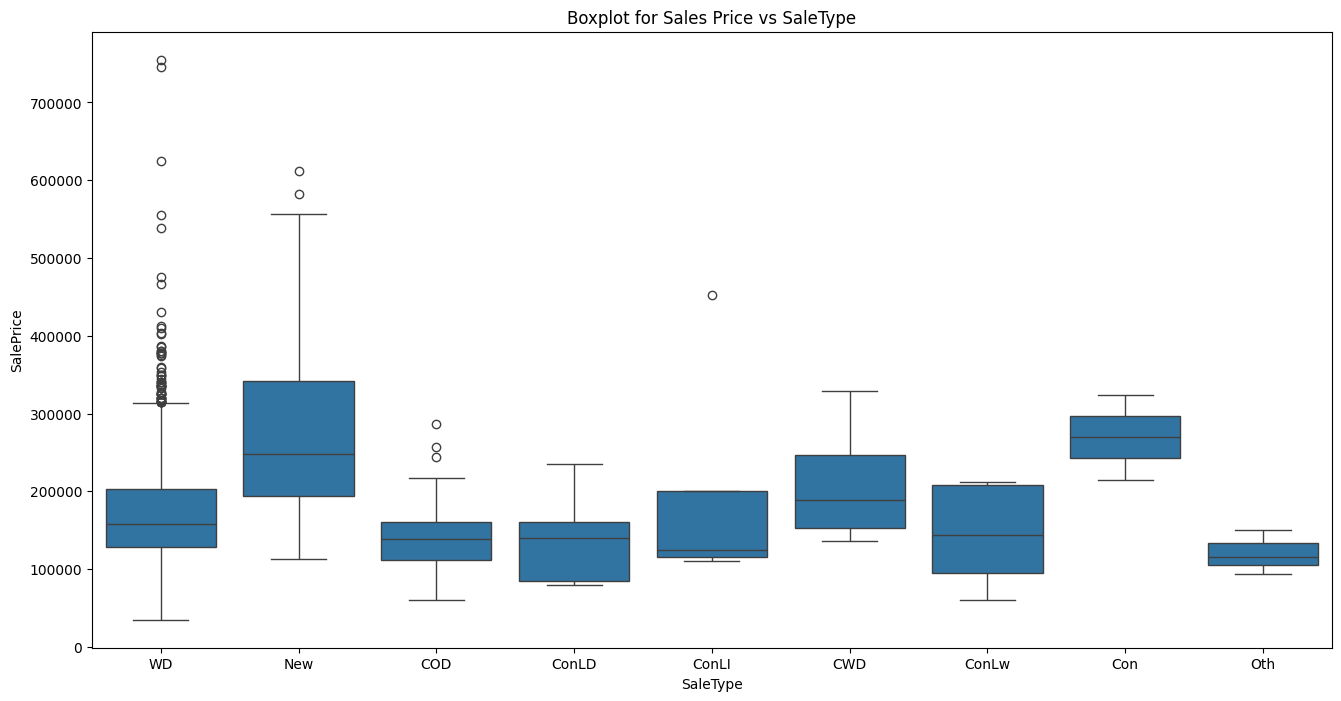

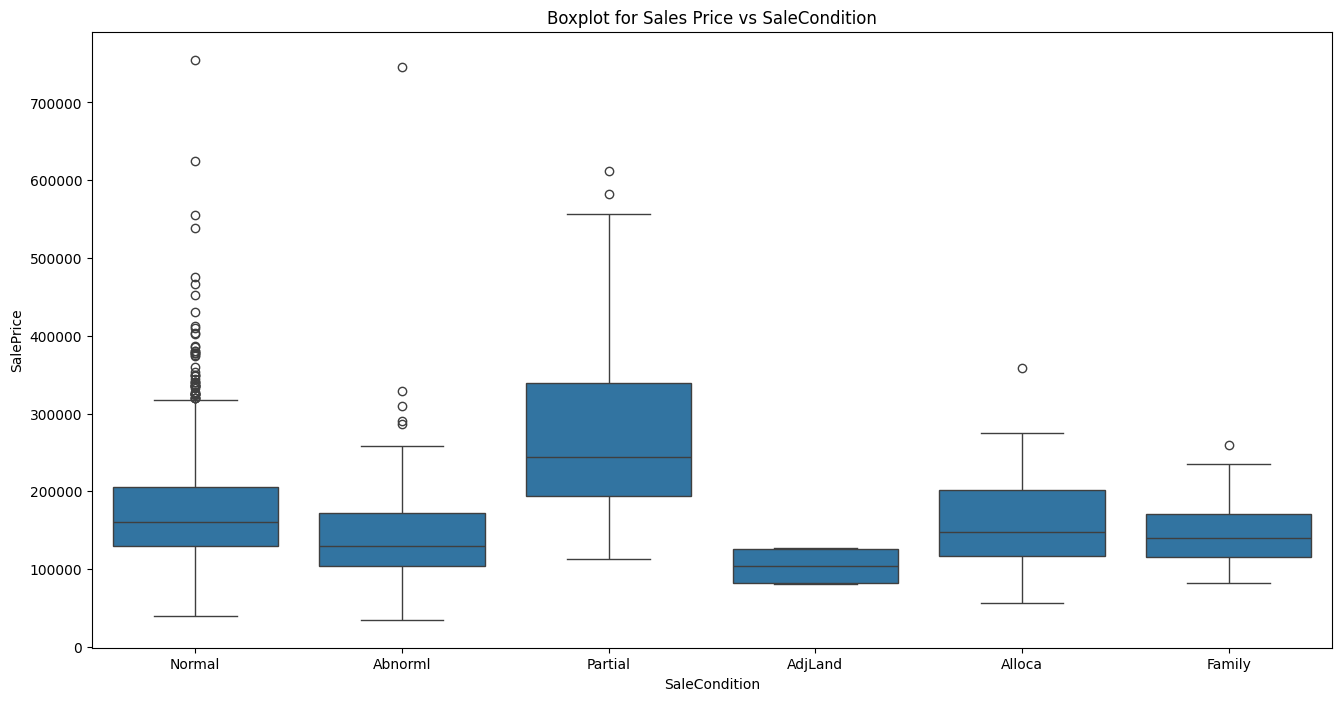

In [20]:
for i in catA:
    plt.figure(figsize=(16,8))
    sns.boxplot(data=df, x=i, y='SalePrice')
    plt.title(f'Boxplot for Sales Price vs {i}')
    plt.show()

### Bivariate Analysis - Categorical vs Categorical features